## Est. of growing stock, biomass and RN content use UAV survey

# Load all data from .xlsx file

In [1]:
# Import main libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import shap

In [2]:
# Load biomass dataset
site_data = '../05_input_data/Sites_with_Sentinel_bands_data.xlsx'
df = pd.read_excel(site_data, sheet_name='input_2019')
df.head()

Site # Origin Dominant_s  LN_GS_cub_m  LN_M_stem_kg_m2  \
0      1      n      Birch        4.771            1.792   
1      2      a       Pine        5.808            2.496   
2      3      a       Pine        5.796            2.546   
3      4      a       Pine        5.826            2.643   
4      5      a       Pine        6.059            2.643   

   LN_M_stem_bark_kg_m2  LN_M_crown_kg_m2  LN_M_foliage_kg_m2  LN_M_AG_kg_m2  \
0                -0.211            -0.261              -2.040          1.932   
1                -0.073             0.392              -0.139          2.674   
2                 0.030             0.501              -0.030          2.734   
3                 0.000             0.419              -0.431          2.785   
4                 0.122             0.647              -0.386          2.809   

        X_N36  ...  r2019B03  r2019B04  r2019B05  r2019B06  r2019B07  \
0  298987.203  ...  0.030628  0.266210  0.166299  0.081316  0.793351   
1  299016.572  ...  0.027934  0.183349  0.102656  0.052144  0.735493   
2  299072.773  ...  0.026123  0.184066  0.099625  0.050684  0.751436   
3  299152.693  ...  0.027390  0.177221  0.102540  0.052198  0.732404   
4  299249.689  ...  0.025702  0.183705  0.101394  0.050437  0.754481   

   r2019B08  r2019B09   r2019B10   r2019B11  r2019B12  
0 -0.733693  0.532051 -15.396488 -11.262037  0.731937  
1 -0.655456  0.557000 -16.012156  -9.364664  0.584920  
2 -0.650575  0.568148 -13.609903  -9.726108  0.715177  
3 -0.648310  0.544717 -14.321650 -10.457536  0.730390  
4 -0.660382  0.569112 -13.934375 -11.393335  0.817430  

[5 rows x 34 columns]

# List of all parameters for est. of bioproductivity and RN content
"""
All parameters:
'Site #', 'Origin', 'Dominant_s', 'LN_GS_cub_m', 'LN_M_stem_kg_m2', 'LN_M_stem_bark_kg_m2', 'LN_M_crown_kg_m2', 'LN_M_foliage_kg_m2', 'LN_M_AG_kg_m2', 'F_Soil', 'M_Soil', 'X_N36', 'Y_N36', 'Cs_wood_Bq/kg', 'Sr_wood_Bq/kg', 'LN_Cs_wood', 'LN_Sr_wood', 'Tag_Cs', 'Tag_Sr', 'LN_Tag_Cs', 'LN_Tag_Sr', 'Cs_2021_kB', 'Sr_2021_kB', 'AEDR_mean', 'r2019B01', 'r2019B02', 'r2019B03', 'r2019B04', 'r2019B05', 'r2019B06', 'r2019B07', 'r2019B08', 'r2019B09', 'r2019B10', 'r2019B11', 'r2019B12'
"""

In [3]:
# Selecting main working parameters
select = pd.DataFrame(df, columns=['LN_GS_cub_m', 'LN_M_stem_kg_m2', 'LN_M_stem_bark_kg_m2', 'LN_M_crown_kg_m2', 'LN_M_foliage_kg_m2', 'LN_M_AG_kg_m2', 'LN_Tag_Cs', 'LN_Tag_Sr',
                                  'r2019B01', 'r2019B02', 'r2019B03', 'r2019B04', 'r2019B05', 'r2019B06', 'r2019B07', 'r2019B08', 'r2019B09', 'r2019B10', 'r2019B11', 'r2019B12'])

# Show the first five columns
select.head()

LN_GS_cub_m  LN_M_stem_kg_m2  LN_M_stem_bark_kg_m2  LN_M_crown_kg_m2  \
0        4.771            1.792                -0.211            -0.261   
1        5.808            2.496                -0.073             0.392   
2        5.796            2.546                 0.030             0.501   
3        5.826            2.643                 0.000             0.419   
4        6.059            2.643                 0.122             0.647   

   LN_M_foliage_kg_m2  LN_M_AG_kg_m2  LN_Tag_Cs  LN_Tag_Sr  r2019B01  \
0              -2.040          1.932      -0.73       2.58  0.025483   
1              -0.139          2.674       0.59       2.92  0.024075   
2              -0.030          2.734       0.78       2.88  0.022492   
3              -0.431          2.785       0.52       2.72  0.023742   
4              -0.386          2.809       0.22       2.83  0.022916   

   r2019B02  r2019B03  r2019B04  r2019B05  r2019B06  r2019B07  r2019B08  \
0  0.040910  0.030628  0.266210  0.166299  0.081316  0.793351 -0.733693   
1  0.038164  0.027934  0.183349  0.102656  0.052144  0.735493 -0.655456   
2  0.038968  0.026123  0.184066  0.099625  0.050684  0.751436 -0.650575   
3  0.037811  0.027390  0.177221  0.102540  0.052198  0.732404 -0.648310   
4  0.037557  0.025702  0.183705  0.101394  0.050437  0.754481 -0.660382   

   r2019B09   r2019B10   r2019B11  r2019B12  
0  0.532051 -15.396488 -11.262037  0.731937  
1  0.557000 -16.012156  -9.364664  0.584920  
2  0.568148 -13.609903  -9.726108  0.715177  
3  0.544717 -14.321650 -10.457536  0.730390  
4  0.569112 -13.934375 -11.393335  0.817430

# Pre-analysis of parameters

In [4]:
# Information on all columns of data frame
select.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   LN_GS_cub_m           205 non-null    float64
 1   LN_M_stem_kg_m2       205 non-null    float64
 2   LN_M_stem_bark_kg_m2  205 non-null    float64
 3   LN_M_crown_kg_m2      205 non-null    float64
 4   LN_M_foliage_kg_m2    205 non-null    float64
 5   LN_M_AG_kg_m2         205 non-null    float64
 6   LN_Tag_Cs             205 non-null    float64
 7   LN_Tag_Sr             205 non-null    float64
 8   r2019B01              205 non-null    float64
 9   r2019B02              205 non-null    float64
 10  r2019B03              205 non-null    float64
 11  r2019B04              205 non-null    float64
 12  r2019B05              205 non-null    float64
 13  r2019B06              205 non-null    float64
 14  r2019B07              205 non-null    float64
 15  r2019B08              2

In [5]:
# Discribe statistic of forest sites by species and origin
df.groupby(["Dominant_s"])["LN_GS_cub_m", "LN_M_AG_kg_m2"].describe()

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.


LN_GS_cub_m                                                       \
                 count      mean       std    min      25%     50%      75%   
Dominant_s                                                                    
Alder             13.0  5.954615  0.321593  5.342  5.76200  6.0230  6.20500   
Aspen              7.0  5.382429  0.530860  4.844  4.99000  5.2310  5.71300   
Birch             45.0  4.897244  0.745395  2.398  4.64400  5.0040  5.36600   
Oak                9.0  5.213444  0.513140  4.344  4.77100  5.4600  5.64200   
Pine             130.0  5.251485  1.240715  1.609  4.91425  5.7215  6.09775   
Spruce             1.0  6.431000       NaN  6.431  6.43100  6.4310  6.43100   

                  LN_M_AG_kg_m2                                              \
              max         count      mean       std    min      25%     50%   
Dominant_s                                                                    
Alder       6.330          13.0  2.891692  0.293107  2.407  2.65300  2.9700   
Aspen       6.196           7.0  2.459000  0.532848  1.902  2.04200  2.3700   
Birch       5.858          45.0  2.051800  0.678888  0.000  1.75800  2.2190   
Oak         5.765           9.0  2.459333  0.507916  1.569  2.00100  2.7150   
Pine        6.457         130.0  2.291908  1.041308 -0.693  2.04425  2.6705   
Spruce      6.431           1.0  3.506000       NaN  3.506  3.50600  3.5060   

                           
               75%    max  
Dominant_s                 
Alder       3.1350  3.258  
Aspen       2.8375  3.182  
Birch       2.5260  2.923  
Oak         2.8150  3.025  
Pine        2.9860  3.515  
Spruce      3.5060  3.506

In [6]:
# Descriptive statistics of main parameters
select.describe()

LN_GS_cub_m  LN_M_stem_kg_m2  LN_M_stem_bark_kg_m2  LN_M_crown_kg_m2  \
count   205.000000       205.000000            205.000000        205.000000   
mean      5.226868         2.098585             -0.124595          0.077888   
std       1.088124         1.036242              0.780555          0.704301   
min       1.609000        -1.347000             -2.659000         -2.408000   
25%       4.875000         1.783000             -0.315000         -0.151000   
50%       5.501000         2.408000              0.039000          0.285000   
75%       5.971000         2.788000              0.315000          0.531000   
max       6.457000         3.428000              1.384000          1.756000   

       LN_M_foliage_kg_m2  LN_M_AG_kg_m2   LN_Tag_Cs   LN_Tag_Sr    r2019B01  \
count          205.000000     205.000000  205.000000  205.000000  205.000000   
mean            -0.960395       2.296215   -0.619073    2.308537    0.023623   
std              0.708678       0.923930    1.272242    0.950740    0.006540   
min             -3.507000      -0.693000   -4.680000   -0.250000    0.014194   
25%             -1.514000       2.001000   -1.390000    1.700000    0.019895   
50%             -0.777000       2.565000   -0.480000    2.420000    0.022415   
75%             -0.386000       2.896000    0.340000    2.970000    0.025339   
max              0.157000       3.515000    1.650000    4.660000    0.059051   

         r2019B02    r2019B03    r2019B04    r2019B05    r2019B06    r2019B07  \
count  205.000000  205.000000  205.000000  205.000000  205.000000  205.000000   
mean     0.038592    0.028895    0.219361    0.131344    0.068068    0.759654   
std      0.007341    0.010704    0.049137    0.036023    0.026479    0.091469   
min      0.026402    0.015301    0.140309    0.078918    0.035914    0.363395   
25%      0.034516    0.022685    0.183403    0.102471    0.051182    0.727961   
50%      0.036966    0.026123    0.199665    0.121704    0.060839    0.771691   
75%      0.040237    0.030628    0.250913    0.153232    0.078586    0.814177   
max      0.077038    0.081675    0.423326    0.252487    0.196544    0.914709   

         r2019B08    r2019B09    r2019B10    r2019B11    r2019B12  
count  205.000000  205.000000  205.000000  205.000000  205.000000  
mean    -0.692408    0.526662  -15.737088  -10.490763    0.668847  
std      0.070703    0.144729    1.547144    1.471517    0.081010  
min     -0.849155   -0.037478  -22.820204  -16.820473    0.386847  
25%     -0.735660    0.470852  -16.494671  -11.364958    0.615553  
50%     -0.693779    0.562326  -15.454248  -10.299303    0.666882  
75%     -0.660039    0.626609  -14.760403   -9.547850    0.728737  
max     -0.389420    0.740912  -12.365163   -5.703308    0.877743

# Selecting working columns for the XGBoost algorithms

In [7]:
# Choosing the predictor and independent variables
predictor = "LN_M_AG_kg_m2"
indep_variables = ['r2019B01', 'r2019B04', 'r2019B06', 'r2019B10', 'r2019B11']


In [8]:
# Delete empty rows from the working column in a dataframe
nan_value = float("NaN")
select.replace("", nan_value, inplace=True)
select.dropna(subset = [predictor], inplace=True) # IMPOTANT - input name of column
print(select)

     LN_GS_cub_m  LN_M_stem_kg_m2  LN_M_stem_bark_kg_m2  LN_M_crown_kg_m2  \
0          4.771            1.792                -0.211            -0.261   
1          5.808            2.496                -0.073             0.392   
2          5.796            2.546                 0.030             0.501   
3          5.826            2.643                 0.000             0.419   
4          6.059            2.643                 0.122             0.647   
..           ...              ...                   ...               ...   
200        6.238            3.125                 0.322             0.560   
201        5.861            2.702                 0.058             0.482   
202        5.935            2.775                -0.030             0.372   
203        5.784            2.546                -0.117             0.182   
204        6.277            2.949                 0.182             0.501   

     LN_M_foliage_kg_m2  LN_M_AG_kg_m2  LN_Tag_Cs  LN_Tag_Sr  r2019B01  \
0

In [9]:
# We select independent variables and predicting parameter 
X = pd.DataFrame(select, columns=indep_variables)
y = pd.DataFrame(select, columns=[predictor])

In [10]:
# Columns in "X" data collections
X.head()

r2019B01  r2019B04  r2019B06   r2019B10   r2019B11
0  0.025483  0.266210  0.081316 -15.396488 -11.262037
1  0.024075  0.183349  0.052144 -16.012156  -9.364664
2  0.022492  0.184066  0.050684 -13.609903  -9.726108
3  0.023742  0.177221  0.052198 -14.321650 -10.457536
4  0.022916  0.183705  0.050437 -13.934375 -11.393335

In [11]:
# Columns in "y" data collections
y.head()

LN_M_AG_kg_m2
0          1.932
1          2.674
2          2.734
3          2.785
4          2.809

# Create first XGBoost model for estimate varibiality of output stats

In [12]:
#  Importing the main library for building model and its analysis
import xgboost as xgb
from scipy.stats import uniform, randint
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import cross_val_score, KFold, RandomizedSearchCV, train_test_split
from sklearn.datasets import make_classification

In [13]:
# K-Folds cross-validation for estimation "quality" of input data for building model
X_kfold = pd.DataFrame(X).to_numpy()
y_kfold = pd.DataFrame(y).to_numpy()

In [14]:
# Function for comparing datasets on homogeneity 
def display_scores(scores):
    print("    Scores: {0}\n    Mean: {1:.3f}\n    Std: {2:.3f}".format(scores, np.mean(scores), np.std(scores)))

In [15]:
# Output results of K-Folds cross-validation for XGBoost model
kfold = KFold(n_splits=3, shuffle=True)
scores = []
for train_index, test_index in kfold.split(X_kfold):   
    X_train, X_test = X_kfold[train_index], X_kfold[test_index]
    y_train, y_test = y_kfold[train_index], y_kfold[test_index]

    xgb_model = xgb.XGBRegressor(objective="reg:squarederror")
    xgb_model.fit(X_train, y_train)
    
    y_pred = xgb_model.predict(X_test)
    
    scores.append(r2_score(y_test, y_pred))
    
print('R square (R2): \n')
display_scores((scores))
print('\n', 20*'-')


scores = []
for train_index, test_index in kfold.split(X_kfold):   
    X_train, X_test = X_kfold[train_index], X_kfold[test_index]
    y_train, y_test = y_kfold[train_index], y_kfold[test_index]

    xgb_model = xgb.XGBRegressor(objective="reg:squarederror")
    xgb_model.fit(X_train, y_train)
    
    y_pred = xgb_model.predict(X_test)
      
    scores.append(mean_squared_error(y_test, y_pred))
    
print('Root-mean-square error (RMSE): \n')
display_scores(np.sqrt(scores))
print('\n', 20*'-')

scores = []
for train_index, test_index in kfold.split(X_kfold):   
    X_train, X_test = X_kfold[train_index], X_kfold[test_index]
    y_train, y_test = y_kfold[train_index], y_kfold[test_index]

    xgb_model = xgb.XGBRegressor(objective="reg:squarederror")
    xgb_model.fit(X_train, y_train)
    
    y_pred = xgb_model.predict(X_test)
    
    scores.append(mean_absolute_error(y_test, y_pred))

print('Mean absolute error (MAE): \n')
display_scores((scores))
print('\n', 20*'-')

R square (R2): 

    Scores: [0.470560552807617, 0.6159674915271143, 0.5199334716885085]
    Mean: 0.535
    Std: 0.060

 --------------------
Root-mean-square error (RMSE): 

    Scores: [0.52294342 0.67344609 0.70915372]
    Mean: 0.635
    Std: 0.081

 --------------------
Mean absolute error (MAE): 

    Scores: [0.48258711217365413, 0.4477245360157069, 0.3976345712824121]
    Mean: 0.443
    Std: 0.035

 --------------------


# Add optimal hyperparameters for XGBoost model

In [16]:
# Hyperparameters data for the next step/stage
p1 = 0.8500574958177407                  # colsample_bytree
print('Colsample_bytree: ' + str(p1))

p2 = 0.48327621552731137                 # gamma
print('Gamma: ' + str(p2))

p3 = 0.06833268633761382                 # learning_rate
print('Learning_rate: ' + str(p3))

p4 = 2            # max_depth
print('Max_depth: ' + str(p4))

p5 = 125          # n_estimators
print('N_estimators: ' + str(p5))

p6 = 0.32729290551701495                  # subsample
print('Subsample: ' + str(p6))

Colsample_bytree: 0.8500574958177407
Gamma: 0.48327621552731137
Learning_rate: 0.06833268633761382
Max_depth: 2
N_estimators: 125
Subsample: 0.32729290551701495


# Estimation of predictive quality to basic XGBoost models using Loops

In [17]:
# Create DMatrix (is an internal data structure) 
data_dmatrix = xgb.DMatrix(data=X,label=y)

In [18]:
# Aggregate parameters
aggr_y=[]
aggr_y_pred=[]

aggr_optimal_n=[]
aggr_bias=[]
aggr_rel_bias=[]
aggr_rmse=[]
aggr_rel_rmse=[]
aggr_mse=[]
aggr_R_square=[]

exp_aggr_optimal_n=[]
exp_aggr_bias=[]
exp_aggr_rel_bias=[]
exp_aggr_rmse=[]
exp_aggr_rel_rmse=[]
exp_aggr_mse=[]
exp_aggr_R_square=[]

aggr_Shap_values=pd.DataFrame()

# Body loop
for i in range(200):
    
    # Generate test and training samples
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    
    #exp_y_train = np.exp(y_train)
    exp_y_test = np.exp(y_test)
    
    # Implementation of the scikit-learn API for XGBoost regression
    xgb_model = xgb.XGBRegressor(objective='reg:squarederror', colsample_bytree=p1, gamma=p2, learning_rate=p3, 
                          max_depth=p4, n_estimators=p5, subsample=p6, eval_metric=["rmse"])
    
    # Fitting the model 
    xgb_model.fit(X_train, y_train, early_stopping_rounds=20, eval_set=[(X_train, y_train), (X_test, y_test)])
    
    # learning dynamics
    y_pred = xgb_model.predict(X_test, ntree_limit=xgb_model.best_ntree_limit)
    
    exp_y_pred = np.exp(y_pred)
    
    # Iteration with the best result
    optimal_n= xgb_model.best_ntree_limit-1
    
    # Convert data to 'array' type
    conv_y_pred = pd.DataFrame(y_pred) # Double transformation
    y_pred2 = conv_y_pred.values
    y_test2 = y_test.values
    
    exp_y_pred2 = np.exp(y_pred2)
    exp_y_test2 = np.exp(y_test2)
    
    # Intermediate results
    n_sample = len(y_pred2)
    y_mean_sample = y_test.sum() / n_sample
    
    exp_y_mean_sample = exp_y_test.sum() / n_sample
    
    # Calculation of bias
    diff = y_pred2 - y_test2
    bias = diff.sum()/n_sample
    rel_bias = bias/y_mean_sample*100
    
    exp_diff = exp_y_pred2 - exp_y_test2
    exp_bias = exp_diff.sum()/n_sample
    exp_rel_bias = exp_bias/exp_y_mean_sample*100
    
    # Calculation of RMSE
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    rel_rmse = rmse/y_mean_sample*100 
    
    exp_rmse = np.sqrt(mean_squared_error(exp_y_test, exp_y_pred))
    exp_rel_rmse = exp_rmse/exp_y_mean_sample*100 
    
    # Calculation of MSE
    mse = mean_squared_error(y_test, y_pred)   
    
    exp_mse = mean_squared_error(exp_y_test, exp_y_pred)
    
    # Calculation of Square R
    diff_with_mean = []
    exp_diff_with_mean = []
    
    for i in range(n_sample):
        interm = y_test2[i][0] - y_mean_sample
        diff_with_mean.append(interm**2)

    RSS = np.sum((y_test2 - y_pred2)**2)
    TSS = (np.sum(diff_with_mean))
    R_square = 1 - (RSS / TSS)
    
    for i in range(n_sample):
        exp_interm = exp_y_test2[i][0] - exp_y_mean_sample
        exp_diff_with_mean.append(exp_interm**2)

    exp_RSS = np.sum((exp_y_test2 - exp_y_pred2)**2)
    exp_TSS = np.sum(exp_diff_with_mean)
    
    exp_R_square = 1 - (exp_RSS / exp_TSS)
    
    #Calculation of SHAP-values
    explainer = shap.TreeExplainer(xgb_model)
    shap_values = explainer.shap_values(X_train)
    vals= np.abs(shap_values).mean(0)
    feature_importance = pd.DataFrame(list(zip(X_train.columns,vals)),columns=['Feature','Importance'])
       
    
    #Add values to lists
    aggr_y.append(y_test)
    aggr_y_pred.append(conv_y_pred)    
    
    aggr_optimal_n.append(optimal_n)
    aggr_bias.append(bias)
    aggr_rel_bias.append(rel_bias)
    aggr_rmse.append(rmse)
    aggr_rel_rmse.append(rel_rmse)
    aggr_mse.append(mse)
    aggr_R_square.append(R_square)
    
    exp_aggr_bias.append(exp_bias)
    exp_aggr_rel_bias.append(exp_rel_bias)
    exp_aggr_rmse.append(exp_rmse)
    exp_aggr_rel_rmse.append(exp_rel_rmse)
    exp_aggr_mse.append(exp_mse)
    exp_aggr_R_square.append(exp_R_square)
    
    aggr_Shap_values = aggr_Shap_values.append(feature_importance, ignore_index=True)
    
# Intermedia data to calculate CI
n_train = len(y_train)
n_test = len(y_test)

[0]	validation_0-rmse:1.90882	validation_1-rmse:1.84991
[1]	validation_0-rmse:1.79433	validation_1-rmse:1.74017
[2]	validation_0-rmse:1.68624	validation_1-rmse:1.62795
[3]	validation_0-rmse:1.59137	validation_1-rmse:1.54419
[4]	validation_0-rmse:1.50258	validation_1-rmse:1.46027
[5]	validation_0-rmse:1.41486	validation_1-rmse:1.37760
[6]	validation_0-rmse:1.32828	validation_1-rmse:1.29709


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[7]	validation_0-rmse:1.25780	validation_1-rmse:1.23140
[8]	validation_0-rmse:1.18729	validation_1-rmse:1.16696
[9]	validation_0-rmse:1.12363	validation_1-rmse:1.11708
[10]	validation_0-rmse:1.06700	validation_1-rmse:1.06803
[11]	validation_0-rmse:1.01136	validation_1-rmse:1.02044
[12]	validation_0-rmse:0.96547	validation_1-rmse:0.97735
[13]	validation_0-rmse:0.92273	validation_1-rmse:0.93842
[14]	validation_0-rmse:0.88756	validation_1-rmse:0.90922
[15]	validation_0-rmse:0.84875	validation_1-rmse:0.87369
[16]	validation_0-rmse:0.80691	validation_1-rmse:0.83926
[17]	validation_0-rmse:0.77802	validation_1-rmse:0.80833
[18]	validation_0-rmse:0.74640	validation_1-rmse:0.78620
[19]	validation_0-rmse:0.71418	validation_1-rmse:0.75896
[20]	validation_0-rmse:0.68809	validation_1-rmse:0.73360
[21]	validation_0-rmse:0.66560	validation_1-rmse:0.71938
[22]	validation_0-rmse:0.64108	validation_1-rmse:0.70617
[23]	validation_0-rmse:0.62242	validation_1-rmse:0.69794
[24]	validation_0-rmse:0.60411	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.91866	validation_1-rmse:1.79655
[1]	validation_0-rmse:1.80264	validation_1-rmse:1.68778
[2]	validation_0-rmse:1.68805	validation_1-rmse:1.57871
[3]	validation_0-rmse:1.59718	validation_1-rmse:1.49990
[4]	validation_0-rmse:1.50618	validation_1-rmse:1.41825


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:1.41926	validation_1-rmse:1.32894
[6]	validation_0-rmse:1.33221	validation_1-rmse:1.24969
[7]	validation_0-rmse:1.25620	validation_1-rmse:1.18691
[8]	validation_0-rmse:1.18697	validation_1-rmse:1.13059
[9]	validation_0-rmse:1.12891	validation_1-rmse:1.07944
[10]	validation_0-rmse:1.07238	validation_1-rmse:1.03194
[11]	validation_0-rmse:1.01452	validation_1-rmse:0.98910
[12]	validation_0-rmse:0.96698	validation_1-rmse:0.95493
[13]	validation_0-rmse:0.92357	validation_1-rmse:0.91716
[14]	validation_0-rmse:0.87974	validation_1-rmse:0.88864
[15]	validation_0-rmse:0.83917	validation_1-rmse:0.86279
[16]	validation_0-rmse:0.80458	validation_1-rmse:0.83755
[17]	validation_0-rmse:0.76993	validation_1-rmse:0.81731
[18]	validation_0-rmse:0.74142	validation_1-rmse:0.79552
[19]	validation_0-rmse:0.71575	validation_1-rmse:0.77837
[20]	validation_0-rmse:0.68589	validation_1-rmse:0.75653
[21]	validation_0-rmse:0.65792	validation_1-rmse:0.73335
[22]	validation_0-rmse:0.64065	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.90065	validation_1-rmse:1.87690
[1]	validation_0-rmse:1.78525	validation_1-rmse:1.77660
[2]	validation_0-rmse:1.67658	validation_1-rmse:1.68102


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.57613	validation_1-rmse:1.57913
[4]	validation_0-rmse:1.48728	validation_1-rmse:1.50463
[5]	validation_0-rmse:1.40282	validation_1-rmse:1.42657
[6]	validation_0-rmse:1.32817	validation_1-rmse:1.35976
[7]	validation_0-rmse:1.25001	validation_1-rmse:1.28597
[8]	validation_0-rmse:1.18815	validation_1-rmse:1.23496
[9]	validation_0-rmse:1.12528	validation_1-rmse:1.18719
[10]	validation_0-rmse:1.06632	validation_1-rmse:1.13729
[11]	validation_0-rmse:1.01494	validation_1-rmse:1.08926
[12]	validation_0-rmse:0.97109	validation_1-rmse:1.05581
[13]	validation_0-rmse:0.93256	validation_1-rmse:1.01998
[14]	validation_0-rmse:0.88608	validation_1-rmse:0.97513
[15]	validation_0-rmse:0.84592	validation_1-rmse:0.93843
[16]	validation_0-rmse:0.81018	validation_1-rmse:0.91570
[17]	validation_0-rmse:0.77996	validation_1-rmse:0.89710
[18]	validation_0-rmse:0.74628	validation_1-rmse:0.87452
[19]	validation_0-rmse:0.72240	validation_1-rmse:0.85096
[20]	validation_0-rmse:0.69432	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.89652	validation_1-rmse:1.90369
[1]	validation_0-rmse:1.78034	validation_1-rmse:1.79029
[2]	validation_0-rmse:1.66942	validation_1-rmse:1.68275
[3]	validation_0-rmse:1.57071	validation_1-rmse:1.58871
[4]	validation_0-rmse:1.47908	validation_1-rmse:1.49733
[5]	validation_0-rmse:1.39029	validation_1-rmse:1.41206
[6]	validation_0-rmse:1.31614	validation_1-rmse:1.34587
[7]	validation_0-rmse:1.24971	validation_1-rmse:1.28360


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[8]	validation_0-rmse:1.17857	validation_1-rmse:1.21380
[9]	validation_0-rmse:1.11327	validation_1-rmse:1.15116
[10]	validation_0-rmse:1.05424	validation_1-rmse:1.09004
[11]	validation_0-rmse:1.00278	validation_1-rmse:1.03681
[12]	validation_0-rmse:0.95363	validation_1-rmse:0.98855
[13]	validation_0-rmse:0.90762	validation_1-rmse:0.94646
[14]	validation_0-rmse:0.86594	validation_1-rmse:0.90693
[15]	validation_0-rmse:0.82696	validation_1-rmse:0.87441
[16]	validation_0-rmse:0.79082	validation_1-rmse:0.84217
[17]	validation_0-rmse:0.75943	validation_1-rmse:0.81830
[18]	validation_0-rmse:0.73168	validation_1-rmse:0.80288
[19]	validation_0-rmse:0.70888	validation_1-rmse:0.77933
[20]	validation_0-rmse:0.68375	validation_1-rmse:0.76027
[21]	validation_0-rmse:0.65974	validation_1-rmse:0.73891
[22]	validation_0-rmse:0.63857	validation_1-rmse:0.71820
[23]	validation_0-rmse:0.62124	validation_1-rmse:0.70145
[24]	validation_0-rmse:0.60184	validation_1-rmse:0.68598
[25]	validation_0-rmse:0.58395	va

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.88878	validation_1-rmse:1.93808
[1]	validation_0-rmse:1.77468	validation_1-rmse:1.82628
[2]	validation_0-rmse:1.66143	validation_1-rmse:1.71597
[3]	validation_0-rmse:1.56229	validation_1-rmse:1.61686
[4]	validation_0-rmse:1.47235	validation_1-rmse:1.53627
[5]	validation_0-rmse:1.39013	validation_1-rmse:1.45382
[6]	validation_0-rmse:1.31228	validation_1-rmse:1.37975
[7]	validation_0-rmse:1.23751	validation_1-rmse:1.30782
[8]	validation_0-rmse:1.17582	validation_1-rmse:1.25269
[9]	validation_0-rmse:1.11232	validation_1-rmse:1.19730
[10]	validation_0-rmse:1.05416	validation_1-rmse:1.13714
[11]	validation_0-rmse:1.00101	validation_1-rmse:1.08743
[12]	validation_0-rmse:0.95269	validation_1-rmse:1.03871
[13]	validation_0-rmse:0.90954	validation_1-rmse:0.99768
[14]	validation_0-rmse:0.86911	validation_1-rmse:0.96151
[15]	validation_0-rmse:0.83576	validation_1-rmse:0.93473
[16]	validation_0-rmse:0.79627	validation_1-rmse:0.90203
[17]	validation_0-rmse:0.76218	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.88731	validation_1-rmse:1.90579
[1]	validation_0-rmse:1.77314	validation_1-rmse:1.79517
[2]	validation_0-rmse:1.67198	validation_1-rmse:1.69670
[3]	validation_0-rmse:1.57236	validation_1-rmse:1.60305
[4]	validation_0-rmse:1.47565	validation_1-rmse:1.51567
[5]	validation_0-rmse:1.39494	validation_1-rmse:1.44828
[6]	validation_0-rmse:1.31318	validation_1-rmse:1.37210
[7]	validation_0-rmse:1.24148	validation_1-rmse:1.30432
[8]	validation_0-rmse:1.17354	validation_1-rmse:1.24041
[9]	validation_0-rmse:1.11410	validation_1-rmse:1.18761
[10]	validation_0-rmse:1.05704	validation_1-rmse:1.14319
[11]	validation_0-rmse:1.00260	validation_1-rmse:1.09814
[12]	validation_0-rmse:0.95236	validation_1-rmse:1.05179
[13]	validation_0-rmse:0.90553	validation_1-rmse:1.02016
[14]	validation_0-rmse:0.86469	validation_1-rmse:0.99645
[15]	validation_0-rmse:0.82768	validation_1-rmse:0.96951
[16]	validation_0-rmse:0.78985	validation_1-rmse:0.94186
[17]	validation_0-rmse:0.75792	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.85671	validation_1-rmse:2.05059
[1]	validation_0-rmse:1.74402	validation_1-rmse:1.93719
[2]	validation_0-rmse:1.64715	validation_1-rmse:1.83651
[3]	validation_0-rmse:1.54991	validation_1-rmse:1.73505
[4]	validation_0-rmse:1.46138	validation_1-rmse:1.64314
[5]	validation_0-rmse:1.37748	validation_1-rmse:1.55502
[6]	validation_0-rmse:1.29713	validation_1-rmse:1.47703
[7]	validation_0-rmse:1.22681	validation_1-rmse:1.40102
[8]	validation_0-rmse:1.16516	validation_1-rmse:1.34101
[9]	validation_0-rmse:1.10473	validation_1-rmse:1.28340
[10]	validation_0-rmse:1.05746	validation_1-rmse:1.23073
[11]	validation_0-rmse:1.00839	validation_1-rmse:1.18073
[12]	validation_0-rmse:0.96509	validation_1-rmse:1.12867
[13]	validation_0-rmse:0.92326	validation_1-rmse:1.08574
[14]	validation_0-rmse:0.88330	validation_1-rmse:1.03964
[15]	validation_0-rmse:0.84780	validation_1-rmse:1.00203
[16]	validation_0-rmse:0.81448	validation_1-rmse:0.97229
[17]	validation_0-rmse:0.78096	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:1.86759	validation_1-rmse:2.02606
[1]	validation_0-rmse:1.75896	validation_1-rmse:1.92799
[2]	validation_0-rmse:1.65753	validation_1-rmse:1.83105
[3]	validation_0-rmse:1.56221	validation_1-rmse:1.73911
[4]	validation_0-rmse:1.47053	validation_1-rmse:1.65676
[5]	validation_0-rmse:1.38554	validation_1-rmse:1.57440
[6]	validation_0-rmse:1.30817	validation_1-rmse:1.50028
[7]	validation_0-rmse:1.23670	validation_1-rmse:1.43006
[8]	validation_0-rmse:1.16842	validation_1-rmse:1.36020
[9]	validation_0-rmse:1.10987	validation_1-rmse:1.30066
[10]	validation_0-rmse:1.05440	validation_1-rmse:1.23684
[11]	validation_0-rmse:0.99774	validation_1-rmse:1.17716
[12]	validation_0-rmse:0.95118	validation_1-rmse:1.13681


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[13]	validation_0-rmse:0.90460	validation_1-rmse:1.08758
[14]	validation_0-rmse:0.86011	validation_1-rmse:1.04420
[15]	validation_0-rmse:0.82650	validation_1-rmse:1.00619
[16]	validation_0-rmse:0.79174	validation_1-rmse:0.97210
[17]	validation_0-rmse:0.76103	validation_1-rmse:0.94492
[18]	validation_0-rmse:0.73139	validation_1-rmse:0.91952
[19]	validation_0-rmse:0.70408	validation_1-rmse:0.89022
[20]	validation_0-rmse:0.67829	validation_1-rmse:0.86405
[21]	validation_0-rmse:0.65508	validation_1-rmse:0.84097
[22]	validation_0-rmse:0.63698	validation_1-rmse:0.81966
[23]	validation_0-rmse:0.61736	validation_1-rmse:0.80528
[24]	validation_0-rmse:0.60020	validation_1-rmse:0.78276
[25]	validation_0-rmse:0.58169	validation_1-rmse:0.76487
[26]	validation_0-rmse:0.57222	validation_1-rmse:0.75777
[27]	validation_0-rmse:0.55867	validation_1-rmse:0.74538
[28]	validation_0-rmse:0.54849	validation_1-rmse:0.73679
[29]	validation_0-rmse:0.53914	validation_1-rmse:0.72985
[30]	validation_0-rmse:0.52954	

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.90219	validation_1-rmse:1.88049
[1]	validation_0-rmse:1.78696	validation_1-rmse:1.77413
[2]	validation_0-rmse:1.67722	validation_1-rmse:1.67201
[3]	validation_0-rmse:1.57584	validation_1-rmse:1.58599
[4]	validation_0-rmse:1.48435	validation_1-rmse:1.50160
[5]	validation_0-rmse:1.39638	validation_1-rmse:1.41913
[6]	validation_0-rmse:1.31487	validation_1-rmse:1.34455
[7]	validation_0-rmse:1.24389	validation_1-rmse:1.28152
[8]	validation_0-rmse:1.17452	validation_1-rmse:1.21931
[9]	validation_0-rmse:1.11796	validation_1-rmse:1.17413
[10]	validation_0-rmse:1.06248	validation_1-rmse:1.12969
[11]	validation_0-rmse:1.00253	validation_1-rmse:1.08176
[12]	validation_0-rmse:0.95326	validation_1-rmse:1.03914
[13]	validation_0-rmse:0.91093	validation_1-rmse:1.00771
[14]	validation_0-rmse:0.87059	validation_1-rmse:0.97328
[15]	validation_0-rmse:0.83199	validation_1-rmse:0.94124
[16]	validation_0-rmse:0.79890	validation_1-rmse:0.90758
[17]	validation_0-rmse:0.76528	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.90125	validation_1-rmse:1.85569
[1]	validation_0-rmse:1.79500	validation_1-rmse:1.74680
[2]	validation_0-rmse:1.69334	validation_1-rmse:1.64654
[3]	validation_0-rmse:1.59384	validation_1-rmse:1.54166
[4]	validation_0-rmse:1.50000	validation_1-rmse:1.44508
[5]	validation_0-rmse:1.42086	validation_1-rmse:1.36664
[6]	validation_0-rmse:1.34212	validation_1-rmse:1.28509
[7]	validation_0-rmse:1.27434	validation_1-rmse:1.21365
[8]	validation_0-rmse:1.20441	validation_1-rmse:1.13890
[9]	validation_0-rmse:1.14438	validation_1-rmse:1.07388
[10]	validation_0-rmse:1.08310	validation_1-rmse:1.01202
[11]	validation_0-rmse:1.03210	validation_1-rmse:0.95924
[12]	validation_0-rmse:0.98780	validation_1-rmse:0.91932
[13]	validation_0-rmse:0.94226	validation_1-rmse:0.87346
[14]	validation_0-rmse:0.90958	validation_1-rmse:0.84409
[15]	validation_0-rmse:0.87449	validation_1-rmse:0.80933
[16]	validation_0-rmse:0.84075	validation_1-rmse:0.77298
[17]	validation_0-rmse:0.80948	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:1.89541	validation_1-rmse:1.89098
[1]	validation_0-rmse:1.77643	validation_1-rmse:1.76616
[2]	validation_0-rmse:1.67092	validation_1-rmse:1.65374
[3]	validation_0-rmse:1.57823	validation_1-rmse:1.55429
[4]	validation_0-rmse:1.48544	validation_1-rmse:1.45996


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:1.40497	validation_1-rmse:1.37195
[6]	validation_0-rmse:1.32277	validation_1-rmse:1.28910
[7]	validation_0-rmse:1.25048	validation_1-rmse:1.21068
[8]	validation_0-rmse:1.17645	validation_1-rmse:1.13661
[9]	validation_0-rmse:1.10900	validation_1-rmse:1.06737
[10]	validation_0-rmse:1.05508	validation_1-rmse:1.01228
[11]	validation_0-rmse:1.00181	validation_1-rmse:0.96096
[12]	validation_0-rmse:0.95090	validation_1-rmse:0.90966
[13]	validation_0-rmse:0.90553	validation_1-rmse:0.86415
[14]	validation_0-rmse:0.86596	validation_1-rmse:0.82150
[15]	validation_0-rmse:0.82858	validation_1-rmse:0.78612
[16]	validation_0-rmse:0.79956	validation_1-rmse:0.75653
[17]	validation_0-rmse:0.76468	validation_1-rmse:0.72523
[18]	validation_0-rmse:0.74172	validation_1-rmse:0.69887
[19]	validation_0-rmse:0.71533	validation_1-rmse:0.66767
[20]	validation_0-rmse:0.69363	validation_1-rmse:0.64552
[21]	validation_0-rmse:0.67955	validation_1-rmse:0.62427
[22]	validation_0-rmse:0.65965	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.93572	validation_1-rmse:1.71369
[1]	validation_0-rmse:1.81852	validation_1-rmse:1.61657
[2]	validation_0-rmse:1.71468	validation_1-rmse:1.53055
[3]	validation_0-rmse:1.61210	validation_1-rmse:1.44366


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.51401	validation_1-rmse:1.36016
[5]	validation_0-rmse:1.42777	validation_1-rmse:1.28660
[6]	validation_0-rmse:1.34794	validation_1-rmse:1.21926
[7]	validation_0-rmse:1.26965	validation_1-rmse:1.15471
[8]	validation_0-rmse:1.20237	validation_1-rmse:1.10332
[9]	validation_0-rmse:1.14094	validation_1-rmse:1.05158
[10]	validation_0-rmse:1.08123	validation_1-rmse:1.00071
[11]	validation_0-rmse:1.02271	validation_1-rmse:0.95630
[12]	validation_0-rmse:0.97214	validation_1-rmse:0.91806
[13]	validation_0-rmse:0.91910	validation_1-rmse:0.88104
[14]	validation_0-rmse:0.87709	validation_1-rmse:0.85808
[15]	validation_0-rmse:0.83803	validation_1-rmse:0.83565
[16]	validation_0-rmse:0.80389	validation_1-rmse:0.81810
[17]	validation_0-rmse:0.76638	validation_1-rmse:0.79506
[18]	validation_0-rmse:0.73869	validation_1-rmse:0.78127
[19]	validation_0-rmse:0.70712	validation_1-rmse:0.76566
[20]	validation_0-rmse:0.68023	validation_1-rmse:0.75020
[21]	validation_0-rmse:0.65489	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.90716	validation_1-rmse:1.87303


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.79306	validation_1-rmse:1.77240
[2]	validation_0-rmse:1.68909	validation_1-rmse:1.66892
[3]	validation_0-rmse:1.59079	validation_1-rmse:1.56757
[4]	validation_0-rmse:1.49809	validation_1-rmse:1.47444
[5]	validation_0-rmse:1.41715	validation_1-rmse:1.39716
[6]	validation_0-rmse:1.34321	validation_1-rmse:1.32489
[7]	validation_0-rmse:1.26700	validation_1-rmse:1.25232
[8]	validation_0-rmse:1.20110	validation_1-rmse:1.18906
[9]	validation_0-rmse:1.14145	validation_1-rmse:1.13743
[10]	validation_0-rmse:1.08331	validation_1-rmse:1.08194
[11]	validation_0-rmse:1.03065	validation_1-rmse:1.03584
[12]	validation_0-rmse:0.97991	validation_1-rmse:0.98972
[13]	validation_0-rmse:0.92926	validation_1-rmse:0.94508
[14]	validation_0-rmse:0.88288	validation_1-rmse:0.90020
[15]	validation_0-rmse:0.84629	validation_1-rmse:0.86793
[16]	validation_0-rmse:0.80512	validation_1-rmse:0.83183
[17]	validation_0-rmse:0.77221	validation_1-rmse:0.80206
[18]	validation_0-rmse:0.74442	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.87831	validation_1-rmse:1.94544


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.76538	validation_1-rmse:1.82941
[2]	validation_0-rmse:1.66319	validation_1-rmse:1.72372
[3]	validation_0-rmse:1.57490	validation_1-rmse:1.63204
[4]	validation_0-rmse:1.47872	validation_1-rmse:1.53251
[5]	validation_0-rmse:1.39368	validation_1-rmse:1.44217
[6]	validation_0-rmse:1.31641	validation_1-rmse:1.36133
[7]	validation_0-rmse:1.24497	validation_1-rmse:1.28824
[8]	validation_0-rmse:1.18149	validation_1-rmse:1.22286
[9]	validation_0-rmse:1.11639	validation_1-rmse:1.15416
[10]	validation_0-rmse:1.05807	validation_1-rmse:1.09518
[11]	validation_0-rmse:1.00699	validation_1-rmse:1.04435
[12]	validation_0-rmse:0.96056	validation_1-rmse:0.99253
[13]	validation_0-rmse:0.91461	validation_1-rmse:0.95262
[14]	validation_0-rmse:0.87398	validation_1-rmse:0.90999
[15]	validation_0-rmse:0.83744	validation_1-rmse:0.87711
[16]	validation_0-rmse:0.80326	validation_1-rmse:0.84127
[17]	validation_0-rmse:0.77181	validation_1-rmse:0.81541
[18]	validation_0-rmse:0.74872	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.87345	validation_1-rmse:2.00745
[1]	validation_0-rmse:1.76156	validation_1-rmse:1.88990


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.65434	validation_1-rmse:1.77594
[3]	validation_0-rmse:1.56044	validation_1-rmse:1.68147
[4]	validation_0-rmse:1.46912	validation_1-rmse:1.58881
[5]	validation_0-rmse:1.38425	validation_1-rmse:1.49491
[6]	validation_0-rmse:1.30901	validation_1-rmse:1.41184
[7]	validation_0-rmse:1.23682	validation_1-rmse:1.33550
[8]	validation_0-rmse:1.17350	validation_1-rmse:1.26715
[9]	validation_0-rmse:1.11641	validation_1-rmse:1.20432
[10]	validation_0-rmse:1.06210	validation_1-rmse:1.14551
[11]	validation_0-rmse:1.00487	validation_1-rmse:1.08640
[12]	validation_0-rmse:0.95533	validation_1-rmse:1.03614
[13]	validation_0-rmse:0.91501	validation_1-rmse:0.99303
[14]	validation_0-rmse:0.87512	validation_1-rmse:0.95035
[15]	validation_0-rmse:0.83449	validation_1-rmse:0.90672
[16]	validation_0-rmse:0.80249	validation_1-rmse:0.86702
[17]	validation_0-rmse:0.76977	validation_1-rmse:0.82965
[18]	validation_0-rmse:0.74452	validation_1-rmse:0.80039
[19]	validation_0-rmse:0.71528	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.92389	validation_1-rmse:1.77865
[1]	validation_0-rmse:1.81630	validation_1-rmse:1.68087


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.71014	validation_1-rmse:1.58192
[3]	validation_0-rmse:1.61407	validation_1-rmse:1.49663
[4]	validation_0-rmse:1.52593	validation_1-rmse:1.41178
[5]	validation_0-rmse:1.43827	validation_1-rmse:1.33803
[6]	validation_0-rmse:1.35627	validation_1-rmse:1.26871
[7]	validation_0-rmse:1.27779	validation_1-rmse:1.19951
[8]	validation_0-rmse:1.21014	validation_1-rmse:1.14397
[9]	validation_0-rmse:1.14660	validation_1-rmse:1.09508
[10]	validation_0-rmse:1.08585	validation_1-rmse:1.05148
[11]	validation_0-rmse:1.03153	validation_1-rmse:1.00527
[12]	validation_0-rmse:0.97554	validation_1-rmse:0.96262
[13]	validation_0-rmse:0.92677	validation_1-rmse:0.92652
[14]	validation_0-rmse:0.88626	validation_1-rmse:0.89648
[15]	validation_0-rmse:0.84796	validation_1-rmse:0.86808
[16]	validation_0-rmse:0.81048	validation_1-rmse:0.84248
[17]	validation_0-rmse:0.77849	validation_1-rmse:0.81498
[18]	validation_0-rmse:0.75061	validation_1-rmse:0.79433
[19]	validation_0-rmse:0.72325	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.90049	validation_1-rmse:1.93158


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.78459	validation_1-rmse:1.81209
[2]	validation_0-rmse:1.68342	validation_1-rmse:1.70412
[3]	validation_0-rmse:1.58816	validation_1-rmse:1.60988
[4]	validation_0-rmse:1.50171	validation_1-rmse:1.51837
[5]	validation_0-rmse:1.41718	validation_1-rmse:1.43363
[6]	validation_0-rmse:1.34084	validation_1-rmse:1.35635
[7]	validation_0-rmse:1.26338	validation_1-rmse:1.27818
[8]	validation_0-rmse:1.19424	validation_1-rmse:1.20847
[9]	validation_0-rmse:1.13117	validation_1-rmse:1.14699
[10]	validation_0-rmse:1.07284	validation_1-rmse:1.08779
[11]	validation_0-rmse:1.01828	validation_1-rmse:1.04000
[12]	validation_0-rmse:0.97374	validation_1-rmse:0.99731
[13]	validation_0-rmse:0.93218	validation_1-rmse:0.95790
[14]	validation_0-rmse:0.88704	validation_1-rmse:0.91362
[15]	validation_0-rmse:0.84663	validation_1-rmse:0.87797
[16]	validation_0-rmse:0.80915	validation_1-rmse:0.84557
[17]	validation_0-rmse:0.77912	validation_1-rmse:0.81520
[18]	validation_0-rmse:0.74798	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.89109	validation_1-rmse:1.92906
[1]	validation_0-rmse:1.76454	validation_1-rmse:1.82027
[2]	validation_0-rmse:1.65688	validation_1-rmse:1.72978
[3]	validation_0-rmse:1.56319	validation_1-rmse:1.64056


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.47079	validation_1-rmse:1.56059
[5]	validation_0-rmse:1.38652	validation_1-rmse:1.49231
[6]	validation_0-rmse:1.30102	validation_1-rmse:1.42417
[7]	validation_0-rmse:1.23141	validation_1-rmse:1.35855
[8]	validation_0-rmse:1.15649	validation_1-rmse:1.30068
[9]	validation_0-rmse:1.09026	validation_1-rmse:1.24331
[10]	validation_0-rmse:1.03104	validation_1-rmse:1.19502
[11]	validation_0-rmse:0.97676	validation_1-rmse:1.14933
[12]	validation_0-rmse:0.92765	validation_1-rmse:1.10732
[13]	validation_0-rmse:0.88371	validation_1-rmse:1.06697
[14]	validation_0-rmse:0.84294	validation_1-rmse:1.03593
[15]	validation_0-rmse:0.80375	validation_1-rmse:1.00428
[16]	validation_0-rmse:0.76528	validation_1-rmse:0.97727
[17]	validation_0-rmse:0.73372	validation_1-rmse:0.95331
[18]	validation_0-rmse:0.70118	validation_1-rmse:0.93361
[19]	validation_0-rmse:0.67132	validation_1-rmse:0.91997
[20]	validation_0-rmse:0.64687	validation_1-rmse:0.90441
[21]	validation_0-rmse:0.62637	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.87053	validation_1-rmse:2.01438
[1]	validation_0-rmse:1.75678	validation_1-rmse:1.88767
[2]	validation_0-rmse:1.65442	validation_1-rmse:1.77756
[3]	validation_0-rmse:1.55439	validation_1-rmse:1.67390
[4]	validation_0-rmse:1.46750	validation_1-rmse:1.57563
[5]	validation_0-rmse:1.38405	validation_1-rmse:1.48476
[6]	validation_0-rmse:1.31038	validation_1-rmse:1.40440
[7]	validation_0-rmse:1.24069	validation_1-rmse:1.33217
[8]	validation_0-rmse:1.17956	validation_1-rmse:1.26453
[9]	validation_0-rmse:1.12809	validation_1-rmse:1.21048
[10]	validation_0-rmse:1.07559	validation_1-rmse:1.15345
[11]	validation_0-rmse:1.02923	validation_1-rmse:1.10327
[12]	validation_0-rmse:0.98708	validation_1-rmse:1.05605
[13]	validation_0-rmse:0.94079	validation_1-rmse:1.00761
[14]	validation_0-rmse:0.89996	validation_1-rmse:0.96439
[15]	validation_0-rmse:0.86153	validation_1-rmse:0.92057
[16]	validation_0-rmse:0.82728	validation_1-rmse:0.88823
[17]	validation_0-rmse:0.79672	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.87044	validation_1-rmse:1.97162


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.75401	validation_1-rmse:1.85014
[2]	validation_0-rmse:1.65065	validation_1-rmse:1.74357
[3]	validation_0-rmse:1.54972	validation_1-rmse:1.64208
[4]	validation_0-rmse:1.45824	validation_1-rmse:1.54623
[5]	validation_0-rmse:1.38062	validation_1-rmse:1.46778
[6]	validation_0-rmse:1.29693	validation_1-rmse:1.38235
[7]	validation_0-rmse:1.22368	validation_1-rmse:1.31034
[8]	validation_0-rmse:1.15860	validation_1-rmse:1.24216
[9]	validation_0-rmse:1.09901	validation_1-rmse:1.18326
[10]	validation_0-rmse:1.04290	validation_1-rmse:1.12620
[11]	validation_0-rmse:0.98979	validation_1-rmse:1.07086
[12]	validation_0-rmse:0.94134	validation_1-rmse:1.02316
[13]	validation_0-rmse:0.89589	validation_1-rmse:0.97719
[14]	validation_0-rmse:0.85755	validation_1-rmse:0.93748
[15]	validation_0-rmse:0.82612	validation_1-rmse:0.90605
[16]	validation_0-rmse:0.78722	validation_1-rmse:0.86658
[17]	validation_0-rmse:0.75506	validation_1-rmse:0.83258
[18]	validation_0-rmse:0.72797	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:1.90719	validation_1-rmse:1.84056
[1]	validation_0-rmse:1.79108	validation_1-rmse:1.74372


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.69021	validation_1-rmse:1.65957
[3]	validation_0-rmse:1.58829	validation_1-rmse:1.57357
[4]	validation_0-rmse:1.49870	validation_1-rmse:1.49441
[5]	validation_0-rmse:1.40603	validation_1-rmse:1.41581
[6]	validation_0-rmse:1.33211	validation_1-rmse:1.34969
[7]	validation_0-rmse:1.25851	validation_1-rmse:1.28952
[8]	validation_0-rmse:1.18816	validation_1-rmse:1.22673
[9]	validation_0-rmse:1.12198	validation_1-rmse:1.17326
[10]	validation_0-rmse:1.06051	validation_1-rmse:1.12756
[11]	validation_0-rmse:1.00381	validation_1-rmse:1.08662
[12]	validation_0-rmse:0.94993	validation_1-rmse:1.05542
[13]	validation_0-rmse:0.90651	validation_1-rmse:1.02869
[14]	validation_0-rmse:0.85947	validation_1-rmse:0.99429
[15]	validation_0-rmse:0.82127	validation_1-rmse:0.96404
[16]	validation_0-rmse:0.78812	validation_1-rmse:0.94117
[17]	validation_0-rmse:0.75535	validation_1-rmse:0.91439
[18]	validation_0-rmse:0.72697	validation_1-rmse:0.89432
[19]	validation_0-rmse:0.69820	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.92059	validation_1-rmse:1.79426


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.79963	validation_1-rmse:1.67509
[2]	validation_0-rmse:1.69188	validation_1-rmse:1.56739
[3]	validation_0-rmse:1.58976	validation_1-rmse:1.46703
[4]	validation_0-rmse:1.49712	validation_1-rmse:1.38292
[5]	validation_0-rmse:1.41090	validation_1-rmse:1.30395
[6]	validation_0-rmse:1.31950	validation_1-rmse:1.21847
[7]	validation_0-rmse:1.24991	validation_1-rmse:1.15319
[8]	validation_0-rmse:1.18243	validation_1-rmse:1.10052
[9]	validation_0-rmse:1.11794	validation_1-rmse:1.05105
[10]	validation_0-rmse:1.06243	validation_1-rmse:1.00363
[11]	validation_0-rmse:1.00906	validation_1-rmse:0.96343
[12]	validation_0-rmse:0.95529	validation_1-rmse:0.92392
[13]	validation_0-rmse:0.90963	validation_1-rmse:0.88584
[14]	validation_0-rmse:0.86759	validation_1-rmse:0.85165
[15]	validation_0-rmse:0.83100	validation_1-rmse:0.82768
[16]	validation_0-rmse:0.79078	validation_1-rmse:0.80057
[17]	validation_0-rmse:0.75816	validation_1-rmse:0.77819
[18]	validation_0-rmse:0.72604	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.89521	validation_1-rmse:1.93017
[1]	validation_0-rmse:1.78330	validation_1-rmse:1.82302


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.67824	validation_1-rmse:1.72332
[3]	validation_0-rmse:1.57714	validation_1-rmse:1.63072
[4]	validation_0-rmse:1.48432	validation_1-rmse:1.53891
[5]	validation_0-rmse:1.39622	validation_1-rmse:1.45616
[6]	validation_0-rmse:1.31867	validation_1-rmse:1.38798
[7]	validation_0-rmse:1.25291	validation_1-rmse:1.32481
[8]	validation_0-rmse:1.17752	validation_1-rmse:1.24886
[9]	validation_0-rmse:1.11139	validation_1-rmse:1.18415
[10]	validation_0-rmse:1.05566	validation_1-rmse:1.13738
[11]	validation_0-rmse:1.00948	validation_1-rmse:1.09695
[12]	validation_0-rmse:0.95725	validation_1-rmse:1.04497
[13]	validation_0-rmse:0.91721	validation_1-rmse:1.00313
[14]	validation_0-rmse:0.87623	validation_1-rmse:0.96817
[15]	validation_0-rmse:0.83601	validation_1-rmse:0.93735
[16]	validation_0-rmse:0.80348	validation_1-rmse:0.90471
[17]	validation_0-rmse:0.77340	validation_1-rmse:0.87817
[18]	validation_0-rmse:0.74104	validation_1-rmse:0.85103
[19]	validation_0-rmse:0.71579	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.89617	validation_1-rmse:1.88043


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.78198	validation_1-rmse:1.76780
[2]	validation_0-rmse:1.67783	validation_1-rmse:1.67317
[3]	validation_0-rmse:1.57807	validation_1-rmse:1.57635
[4]	validation_0-rmse:1.48589	validation_1-rmse:1.48545
[5]	validation_0-rmse:1.40220	validation_1-rmse:1.40601
[6]	validation_0-rmse:1.32098	validation_1-rmse:1.32797
[7]	validation_0-rmse:1.24132	validation_1-rmse:1.25007
[8]	validation_0-rmse:1.17139	validation_1-rmse:1.18652
[9]	validation_0-rmse:1.11049	validation_1-rmse:1.12941
[10]	validation_0-rmse:1.05154	validation_1-rmse:1.07614
[11]	validation_0-rmse:0.99521	validation_1-rmse:1.01985
[12]	validation_0-rmse:0.94538	validation_1-rmse:0.97610
[13]	validation_0-rmse:0.90558	validation_1-rmse:0.93746
[14]	validation_0-rmse:0.86785	validation_1-rmse:0.90237
[15]	validation_0-rmse:0.83020	validation_1-rmse:0.86355
[16]	validation_0-rmse:0.78957	validation_1-rmse:0.82935
[17]	validation_0-rmse:0.75821	validation_1-rmse:0.80161
[18]	validation_0-rmse:0.72991	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.91625	validation_1-rmse:1.79516


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.80762	validation_1-rmse:1.69669
[2]	validation_0-rmse:1.69445	validation_1-rmse:1.59530
[3]	validation_0-rmse:1.59749	validation_1-rmse:1.50824
[4]	validation_0-rmse:1.49788	validation_1-rmse:1.41805
[5]	validation_0-rmse:1.41792	validation_1-rmse:1.34670
[6]	validation_0-rmse:1.34130	validation_1-rmse:1.28242
[7]	validation_0-rmse:1.26539	validation_1-rmse:1.22115
[8]	validation_0-rmse:1.19674	validation_1-rmse:1.16378
[9]	validation_0-rmse:1.13325	validation_1-rmse:1.11328
[10]	validation_0-rmse:1.07438	validation_1-rmse:1.06447
[11]	validation_0-rmse:1.01147	validation_1-rmse:1.01459
[12]	validation_0-rmse:0.96105	validation_1-rmse:0.97490
[13]	validation_0-rmse:0.91543	validation_1-rmse:0.94185
[14]	validation_0-rmse:0.87040	validation_1-rmse:0.91169
[15]	validation_0-rmse:0.83172	validation_1-rmse:0.88286
[16]	validation_0-rmse:0.79178	validation_1-rmse:0.85693
[17]	validation_0-rmse:0.75454	validation_1-rmse:0.83202
[18]	validation_0-rmse:0.72481	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.89043	validation_1-rmse:1.88081


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.77344	validation_1-rmse:1.75833
[2]	validation_0-rmse:1.66919	validation_1-rmse:1.65267
[3]	validation_0-rmse:1.57583	validation_1-rmse:1.56424
[4]	validation_0-rmse:1.48432	validation_1-rmse:1.47111
[5]	validation_0-rmse:1.40368	validation_1-rmse:1.39836
[6]	validation_0-rmse:1.32396	validation_1-rmse:1.31501
[7]	validation_0-rmse:1.24759	validation_1-rmse:1.24451
[8]	validation_0-rmse:1.17924	validation_1-rmse:1.18207
[9]	validation_0-rmse:1.11424	validation_1-rmse:1.11911
[10]	validation_0-rmse:1.05609	validation_1-rmse:1.06357
[11]	validation_0-rmse:1.00131	validation_1-rmse:1.02119
[12]	validation_0-rmse:0.95282	validation_1-rmse:0.97554
[13]	validation_0-rmse:0.90406	validation_1-rmse:0.93078
[14]	validation_0-rmse:0.86103	validation_1-rmse:0.89277
[15]	validation_0-rmse:0.82629	validation_1-rmse:0.85891
[16]	validation_0-rmse:0.78679	validation_1-rmse:0.82676
[17]	validation_0-rmse:0.75282	validation_1-rmse:0.80038
[18]	validation_0-rmse:0.72327	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.87906	validation_1-rmse:1.96218
[1]	validation_0-rmse:1.77510	validation_1-rmse:1.85832


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.66546	validation_1-rmse:1.74923
[3]	validation_0-rmse:1.56523	validation_1-rmse:1.64835
[4]	validation_0-rmse:1.47989	validation_1-rmse:1.57267
[5]	validation_0-rmse:1.39514	validation_1-rmse:1.49453
[6]	validation_0-rmse:1.31760	validation_1-rmse:1.42092
[7]	validation_0-rmse:1.24839	validation_1-rmse:1.34838
[8]	validation_0-rmse:1.18199	validation_1-rmse:1.28576
[9]	validation_0-rmse:1.12549	validation_1-rmse:1.22741
[10]	validation_0-rmse:1.06695	validation_1-rmse:1.16688
[11]	validation_0-rmse:1.01259	validation_1-rmse:1.10911
[12]	validation_0-rmse:0.96864	validation_1-rmse:1.06322
[13]	validation_0-rmse:0.93022	validation_1-rmse:1.02011
[14]	validation_0-rmse:0.89183	validation_1-rmse:0.97922
[15]	validation_0-rmse:0.85547	validation_1-rmse:0.94254
[16]	validation_0-rmse:0.82624	validation_1-rmse:0.92128
[17]	validation_0-rmse:0.79389	validation_1-rmse:0.88751
[18]	validation_0-rmse:0.77192	validation_1-rmse:0.86456
[19]	validation_0-rmse:0.74782	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.90173	validation_1-rmse:1.85674


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.79201	validation_1-rmse:1.74535
[2]	validation_0-rmse:1.68420	validation_1-rmse:1.63809
[3]	validation_0-rmse:1.58446	validation_1-rmse:1.53860
[4]	validation_0-rmse:1.49288	validation_1-rmse:1.45265
[5]	validation_0-rmse:1.40866	validation_1-rmse:1.36400
[6]	validation_0-rmse:1.33081	validation_1-rmse:1.28241
[7]	validation_0-rmse:1.25728	validation_1-rmse:1.20700
[8]	validation_0-rmse:1.18653	validation_1-rmse:1.13536
[9]	validation_0-rmse:1.12253	validation_1-rmse:1.07002
[10]	validation_0-rmse:1.06342	validation_1-rmse:1.01022
[11]	validation_0-rmse:1.01272	validation_1-rmse:0.95924
[12]	validation_0-rmse:0.96296	validation_1-rmse:0.90939
[13]	validation_0-rmse:0.92771	validation_1-rmse:0.87395
[14]	validation_0-rmse:0.88496	validation_1-rmse:0.83218
[15]	validation_0-rmse:0.84632	validation_1-rmse:0.79466
[16]	validation_0-rmse:0.80650	validation_1-rmse:0.75073
[17]	validation_0-rmse:0.77268	validation_1-rmse:0.71778
[18]	validation_0-rmse:0.74603	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.87487	validation_1-rmse:1.99682


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.76395	validation_1-rmse:1.88001
[2]	validation_0-rmse:1.65919	validation_1-rmse:1.76708
[3]	validation_0-rmse:1.56552	validation_1-rmse:1.67033
[4]	validation_0-rmse:1.48441	validation_1-rmse:1.58424
[5]	validation_0-rmse:1.40125	validation_1-rmse:1.49428
[6]	validation_0-rmse:1.31952	validation_1-rmse:1.40390
[7]	validation_0-rmse:1.24791	validation_1-rmse:1.32646
[8]	validation_0-rmse:1.18127	validation_1-rmse:1.25499
[9]	validation_0-rmse:1.12907	validation_1-rmse:1.19132
[10]	validation_0-rmse:1.07411	validation_1-rmse:1.13138
[11]	validation_0-rmse:1.02095	validation_1-rmse:1.07035
[12]	validation_0-rmse:0.97808	validation_1-rmse:1.02176
[13]	validation_0-rmse:0.94045	validation_1-rmse:0.97498
[14]	validation_0-rmse:0.90627	validation_1-rmse:0.93515
[15]	validation_0-rmse:0.86860	validation_1-rmse:0.89129
[16]	validation_0-rmse:0.83644	validation_1-rmse:0.85395
[17]	validation_0-rmse:0.80386	validation_1-rmse:0.81597
[18]	validation_0-rmse:0.77950	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.91032	validation_1-rmse:1.87748


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.79484	validation_1-rmse:1.75864
[2]	validation_0-rmse:1.68594	validation_1-rmse:1.65016
[3]	validation_0-rmse:1.58236	validation_1-rmse:1.54399
[4]	validation_0-rmse:1.49501	validation_1-rmse:1.45290
[5]	validation_0-rmse:1.41634	validation_1-rmse:1.36905
[6]	validation_0-rmse:1.34224	validation_1-rmse:1.29523
[7]	validation_0-rmse:1.27316	validation_1-rmse:1.22121
[8]	validation_0-rmse:1.20610	validation_1-rmse:1.15210
[9]	validation_0-rmse:1.14136	validation_1-rmse:1.08798
[10]	validation_0-rmse:1.08433	validation_1-rmse:1.02664
[11]	validation_0-rmse:1.02637	validation_1-rmse:0.97146
[12]	validation_0-rmse:0.97667	validation_1-rmse:0.92057
[13]	validation_0-rmse:0.92853	validation_1-rmse:0.87462
[14]	validation_0-rmse:0.89256	validation_1-rmse:0.83381
[15]	validation_0-rmse:0.85604	validation_1-rmse:0.79670
[16]	validation_0-rmse:0.82273	validation_1-rmse:0.76517
[17]	validation_0-rmse:0.79139	validation_1-rmse:0.73499
[18]	validation_0-rmse:0.76550	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.92603	validation_1-rmse:1.76080


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.81297	validation_1-rmse:1.64536
[2]	validation_0-rmse:1.70539	validation_1-rmse:1.53722
[3]	validation_0-rmse:1.61480	validation_1-rmse:1.44745
[4]	validation_0-rmse:1.51838	validation_1-rmse:1.35313
[5]	validation_0-rmse:1.43315	validation_1-rmse:1.27155
[6]	validation_0-rmse:1.35139	validation_1-rmse:1.19233
[7]	validation_0-rmse:1.28216	validation_1-rmse:1.12518
[8]	validation_0-rmse:1.20475	validation_1-rmse:1.05119
[9]	validation_0-rmse:1.14297	validation_1-rmse:0.99517
[10]	validation_0-rmse:1.08254	validation_1-rmse:0.93617
[11]	validation_0-rmse:1.03054	validation_1-rmse:0.88506
[12]	validation_0-rmse:0.98032	validation_1-rmse:0.83734
[13]	validation_0-rmse:0.93237	validation_1-rmse:0.78927
[14]	validation_0-rmse:0.89282	validation_1-rmse:0.75167
[15]	validation_0-rmse:0.85780	validation_1-rmse:0.71871
[16]	validation_0-rmse:0.82293	validation_1-rmse:0.68539
[17]	validation_0-rmse:0.78791	validation_1-rmse:0.65024
[18]	validation_0-rmse:0.76082	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.92043	validation_1-rmse:1.81038


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.80505	validation_1-rmse:1.70290
[2]	validation_0-rmse:1.69436	validation_1-rmse:1.60030
[3]	validation_0-rmse:1.59753	validation_1-rmse:1.51125
[4]	validation_0-rmse:1.50075	validation_1-rmse:1.42293
[5]	validation_0-rmse:1.40860	validation_1-rmse:1.34014
[6]	validation_0-rmse:1.32563	validation_1-rmse:1.26514
[7]	validation_0-rmse:1.25020	validation_1-rmse:1.19774
[8]	validation_0-rmse:1.18016	validation_1-rmse:1.14140
[9]	validation_0-rmse:1.12104	validation_1-rmse:1.09052
[10]	validation_0-rmse:1.06707	validation_1-rmse:1.04770
[11]	validation_0-rmse:1.01471	validation_1-rmse:0.99951
[12]	validation_0-rmse:0.96745	validation_1-rmse:0.95828
[13]	validation_0-rmse:0.91919	validation_1-rmse:0.92077
[14]	validation_0-rmse:0.87663	validation_1-rmse:0.89026
[15]	validation_0-rmse:0.84028	validation_1-rmse:0.85448
[16]	validation_0-rmse:0.80718	validation_1-rmse:0.82823
[17]	validation_0-rmse:0.77216	validation_1-rmse:0.80278
[18]	validation_0-rmse:0.74047	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.89172	validation_1-rmse:1.93222


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.78511	validation_1-rmse:1.82542
[2]	validation_0-rmse:1.68048	validation_1-rmse:1.72107
[3]	validation_0-rmse:1.57753	validation_1-rmse:1.61559
[4]	validation_0-rmse:1.49122	validation_1-rmse:1.52533
[5]	validation_0-rmse:1.40946	validation_1-rmse:1.44202
[6]	validation_0-rmse:1.33012	validation_1-rmse:1.35817
[7]	validation_0-rmse:1.26159	validation_1-rmse:1.28927
[8]	validation_0-rmse:1.19515	validation_1-rmse:1.22604
[9]	validation_0-rmse:1.12564	validation_1-rmse:1.15676
[10]	validation_0-rmse:1.06774	validation_1-rmse:1.10184
[11]	validation_0-rmse:1.01248	validation_1-rmse:1.04994
[12]	validation_0-rmse:0.96125	validation_1-rmse:1.00490
[13]	validation_0-rmse:0.91346	validation_1-rmse:0.95841
[14]	validation_0-rmse:0.87558	validation_1-rmse:0.92140
[15]	validation_0-rmse:0.83353	validation_1-rmse:0.88334
[16]	validation_0-rmse:0.79727	validation_1-rmse:0.85276
[17]	validation_0-rmse:0.76168	validation_1-rmse:0.82264
[18]	validation_0-rmse:0.72969	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.90226	validation_1-rmse:1.86919


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.79512	validation_1-rmse:1.76002
[2]	validation_0-rmse:1.69015	validation_1-rmse:1.64380
[3]	validation_0-rmse:1.59587	validation_1-rmse:1.55146
[4]	validation_0-rmse:1.50094	validation_1-rmse:1.44826
[5]	validation_0-rmse:1.41897	validation_1-rmse:1.35797
[6]	validation_0-rmse:1.33878	validation_1-rmse:1.27633
[7]	validation_0-rmse:1.27420	validation_1-rmse:1.20518
[8]	validation_0-rmse:1.20822	validation_1-rmse:1.13719
[9]	validation_0-rmse:1.14708	validation_1-rmse:1.07646
[10]	validation_0-rmse:1.09038	validation_1-rmse:1.01754
[11]	validation_0-rmse:1.03607	validation_1-rmse:0.96661
[12]	validation_0-rmse:0.99008	validation_1-rmse:0.92018
[13]	validation_0-rmse:0.95188	validation_1-rmse:0.87917
[14]	validation_0-rmse:0.90969	validation_1-rmse:0.83492
[15]	validation_0-rmse:0.87011	validation_1-rmse:0.80368
[16]	validation_0-rmse:0.83049	validation_1-rmse:0.76405
[17]	validation_0-rmse:0.79527	validation_1-rmse:0.72974
[18]	validation_0-rmse:0.76456	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.89123	validation_1-rmse:1.90373
[1]	validation_0-rmse:1.78770	validation_1-rmse:1.79581


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.67458	validation_1-rmse:1.67659
[3]	validation_0-rmse:1.57070	validation_1-rmse:1.56776
[4]	validation_0-rmse:1.47902	validation_1-rmse:1.47013
[5]	validation_0-rmse:1.39396	validation_1-rmse:1.37845
[6]	validation_0-rmse:1.32306	validation_1-rmse:1.30229
[7]	validation_0-rmse:1.24619	validation_1-rmse:1.21955
[8]	validation_0-rmse:1.17814	validation_1-rmse:1.14792
[9]	validation_0-rmse:1.12108	validation_1-rmse:1.08519
[10]	validation_0-rmse:1.06781	validation_1-rmse:1.02745
[11]	validation_0-rmse:1.01237	validation_1-rmse:0.96746
[12]	validation_0-rmse:0.96544	validation_1-rmse:0.91850
[13]	validation_0-rmse:0.91974	validation_1-rmse:0.87049
[14]	validation_0-rmse:0.88368	validation_1-rmse:0.83439
[15]	validation_0-rmse:0.84471	validation_1-rmse:0.79349
[16]	validation_0-rmse:0.81135	validation_1-rmse:0.75333
[17]	validation_0-rmse:0.78000	validation_1-rmse:0.71869
[18]	validation_0-rmse:0.75381	validation_1-rmse:0.69287
[19]	validation_0-rmse:0.72520	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.87502	validation_1-rmse:1.97824


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.75854	validation_1-rmse:1.86010
[2]	validation_0-rmse:1.65298	validation_1-rmse:1.75069
[3]	validation_0-rmse:1.55363	validation_1-rmse:1.64916
[4]	validation_0-rmse:1.46883	validation_1-rmse:1.56343
[5]	validation_0-rmse:1.39563	validation_1-rmse:1.48002
[6]	validation_0-rmse:1.32270	validation_1-rmse:1.40402
[7]	validation_0-rmse:1.24353	validation_1-rmse:1.32309
[8]	validation_0-rmse:1.17922	validation_1-rmse:1.25075
[9]	validation_0-rmse:1.12117	validation_1-rmse:1.19165
[10]	validation_0-rmse:1.06101	validation_1-rmse:1.13010
[11]	validation_0-rmse:1.00622	validation_1-rmse:1.06966
[12]	validation_0-rmse:0.96152	validation_1-rmse:1.02086
[13]	validation_0-rmse:0.91500	validation_1-rmse:0.97231
[14]	validation_0-rmse:0.87822	validation_1-rmse:0.92910
[15]	validation_0-rmse:0.84229	validation_1-rmse:0.89025
[16]	validation_0-rmse:0.80842	validation_1-rmse:0.85777
[17]	validation_0-rmse:0.77427	validation_1-rmse:0.82180
[18]	validation_0-rmse:0.74678	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.88340	validation_1-rmse:1.94865


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.77840	validation_1-rmse:1.84374
[2]	validation_0-rmse:1.66968	validation_1-rmse:1.74031
[3]	validation_0-rmse:1.57164	validation_1-rmse:1.64615
[4]	validation_0-rmse:1.47921	validation_1-rmse:1.55879
[5]	validation_0-rmse:1.39519	validation_1-rmse:1.48000
[6]	validation_0-rmse:1.31922	validation_1-rmse:1.40352
[7]	validation_0-rmse:1.25210	validation_1-rmse:1.34312
[8]	validation_0-rmse:1.18227	validation_1-rmse:1.28446
[9]	validation_0-rmse:1.12462	validation_1-rmse:1.23552
[10]	validation_0-rmse:1.06911	validation_1-rmse:1.17915
[11]	validation_0-rmse:1.02190	validation_1-rmse:1.13485
[12]	validation_0-rmse:0.97613	validation_1-rmse:1.09667
[13]	validation_0-rmse:0.93207	validation_1-rmse:1.05820
[14]	validation_0-rmse:0.88701	validation_1-rmse:1.01199
[15]	validation_0-rmse:0.84474	validation_1-rmse:0.97687
[16]	validation_0-rmse:0.80530	validation_1-rmse:0.94234
[17]	validation_0-rmse:0.77276	validation_1-rmse:0.90862
[18]	validation_0-rmse:0.74147	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.91371	validation_1-rmse:1.82598
[1]	validation_0-rmse:1.79735	validation_1-rmse:1.70562
[2]	validation_0-rmse:1.68873	validation_1-rmse:1.59110
[3]	validation_0-rmse:1.58757	validation_1-rmse:1.49016
[4]	validation_0-rmse:1.50053	validation_1-rmse:1.40699


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:1.41019	validation_1-rmse:1.32313
[6]	validation_0-rmse:1.33059	validation_1-rmse:1.24506
[7]	validation_0-rmse:1.25990	validation_1-rmse:1.17561
[8]	validation_0-rmse:1.19369	validation_1-rmse:1.10295
[9]	validation_0-rmse:1.13681	validation_1-rmse:1.04279
[10]	validation_0-rmse:1.07897	validation_1-rmse:0.98822
[11]	validation_0-rmse:1.02591	validation_1-rmse:0.93729
[12]	validation_0-rmse:0.98000	validation_1-rmse:0.89312
[13]	validation_0-rmse:0.93111	validation_1-rmse:0.84675
[14]	validation_0-rmse:0.89155	validation_1-rmse:0.80822
[15]	validation_0-rmse:0.85037	validation_1-rmse:0.77463
[16]	validation_0-rmse:0.81314	validation_1-rmse:0.74537
[17]	validation_0-rmse:0.77089	validation_1-rmse:0.71198
[18]	validation_0-rmse:0.74429	validation_1-rmse:0.68966
[19]	validation_0-rmse:0.71393	validation_1-rmse:0.66495
[20]	validation_0-rmse:0.69709	validation_1-rmse:0.65332
[21]	validation_0-rmse:0.67439	validation_1-rmse:0.63491
[22]	validation_0-rmse:0.65850	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.88829	validation_1-rmse:1.96359


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.77386	validation_1-rmse:1.86224
[2]	validation_0-rmse:1.67116	validation_1-rmse:1.76951
[3]	validation_0-rmse:1.57259	validation_1-rmse:1.67510
[4]	validation_0-rmse:1.48066	validation_1-rmse:1.59005
[5]	validation_0-rmse:1.39331	validation_1-rmse:1.50886
[6]	validation_0-rmse:1.31183	validation_1-rmse:1.43684
[7]	validation_0-rmse:1.24264	validation_1-rmse:1.37455
[8]	validation_0-rmse:1.18294	validation_1-rmse:1.31916
[9]	validation_0-rmse:1.11750	validation_1-rmse:1.26236
[10]	validation_0-rmse:1.06811	validation_1-rmse:1.21185
[11]	validation_0-rmse:1.01850	validation_1-rmse:1.16200
[12]	validation_0-rmse:0.96756	validation_1-rmse:1.12013
[13]	validation_0-rmse:0.92502	validation_1-rmse:1.07628
[14]	validation_0-rmse:0.89166	validation_1-rmse:1.04057
[15]	validation_0-rmse:0.85620	validation_1-rmse:1.00623
[16]	validation_0-rmse:0.81637	validation_1-rmse:0.96962
[17]	validation_0-rmse:0.78781	validation_1-rmse:0.93471
[18]	validation_0-rmse:0.75245	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.88587	validation_1-rmse:1.93932


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.77348	validation_1-rmse:1.82452
[2]	validation_0-rmse:1.67503	validation_1-rmse:1.73083
[3]	validation_0-rmse:1.57665	validation_1-rmse:1.63433
[4]	validation_0-rmse:1.48704	validation_1-rmse:1.54404
[5]	validation_0-rmse:1.40165	validation_1-rmse:1.45787
[6]	validation_0-rmse:1.32261	validation_1-rmse:1.38021
[7]	validation_0-rmse:1.24464	validation_1-rmse:1.30882
[8]	validation_0-rmse:1.17605	validation_1-rmse:1.24045
[9]	validation_0-rmse:1.11581	validation_1-rmse:1.18491
[10]	validation_0-rmse:1.05687	validation_1-rmse:1.13287
[11]	validation_0-rmse:1.00542	validation_1-rmse:1.08602
[12]	validation_0-rmse:0.95295	validation_1-rmse:1.03476
[13]	validation_0-rmse:0.91086	validation_1-rmse:0.99846
[14]	validation_0-rmse:0.87136	validation_1-rmse:0.96296
[15]	validation_0-rmse:0.83228	validation_1-rmse:0.93461
[16]	validation_0-rmse:0.79649	validation_1-rmse:0.90767
[17]	validation_0-rmse:0.76211	validation_1-rmse:0.87505
[18]	validation_0-rmse:0.73025	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.90224	validation_1-rmse:1.87456
[1]	validation_0-rmse:1.78458	validation_1-rmse:1.75633
[2]	validation_0-rmse:1.67509	validation_1-rmse:1.64671
[3]	validation_0-rmse:1.57911	validation_1-rmse:1.55040
[4]	validation_0-rmse:1.49103	validation_1-rmse:1.46488
[5]	validation_0-rmse:1.41185	validation_1-rmse:1.38598
[6]	validation_0-rmse:1.32810	validation_1-rmse:1.30175
[7]	validation_0-rmse:1.25946	validation_1-rmse:1.23822
[8]	validation_0-rmse:1.19540	validation_1-rmse:1.17325
[9]	validation_0-rmse:1.13479	validation_1-rmse:1.11261
[10]	validation_0-rmse:1.07982	validation_1-rmse:1.06117
[11]	validation_0-rmse:1.02019	validation_1-rmse:1.00508
[12]	validation_0-rmse:0.96966	validation_1-rmse:0.95967
[13]	validation_0-rmse:0.92196	validation_1-rmse:0.91520
[14]	validation_0-rmse:0.88248	validation_1-rmse:0.87692
[15]	validation_0-rmse:0.84584	validation_1-rmse:0.84357
[16]	validation_0-rmse:0.81180	validation_1-rmse:0.81313
[17]	validation_0-rmse:0.77490	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.87814	validation_1-rmse:1.95429


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.76443	validation_1-rmse:1.84129
[2]	validation_0-rmse:1.65799	validation_1-rmse:1.74899
[3]	validation_0-rmse:1.56419	validation_1-rmse:1.65777
[4]	validation_0-rmse:1.47865	validation_1-rmse:1.56321
[5]	validation_0-rmse:1.39524	validation_1-rmse:1.48292
[6]	validation_0-rmse:1.31762	validation_1-rmse:1.40489
[7]	validation_0-rmse:1.24209	validation_1-rmse:1.34171
[8]	validation_0-rmse:1.17466	validation_1-rmse:1.27625
[9]	validation_0-rmse:1.11335	validation_1-rmse:1.22368
[10]	validation_0-rmse:1.05439	validation_1-rmse:1.17277
[11]	validation_0-rmse:1.00336	validation_1-rmse:1.12479
[12]	validation_0-rmse:0.95849	validation_1-rmse:1.08269
[13]	validation_0-rmse:0.91389	validation_1-rmse:1.04037
[14]	validation_0-rmse:0.87137	validation_1-rmse:1.00862
[15]	validation_0-rmse:0.83678	validation_1-rmse:0.97871
[16]	validation_0-rmse:0.80411	validation_1-rmse:0.94506
[17]	validation_0-rmse:0.77056	validation_1-rmse:0.91797
[18]	validation_0-rmse:0.74114	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.87887	validation_1-rmse:1.91956


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.76242	validation_1-rmse:1.80252
[2]	validation_0-rmse:1.65587	validation_1-rmse:1.69559
[3]	validation_0-rmse:1.55803	validation_1-rmse:1.60080
[4]	validation_0-rmse:1.46595	validation_1-rmse:1.51499
[5]	validation_0-rmse:1.38178	validation_1-rmse:1.42842
[6]	validation_0-rmse:1.30018	validation_1-rmse:1.34869
[7]	validation_0-rmse:1.23166	validation_1-rmse:1.27970
[8]	validation_0-rmse:1.15916	validation_1-rmse:1.21071
[9]	validation_0-rmse:1.10223	validation_1-rmse:1.16137
[10]	validation_0-rmse:1.04539	validation_1-rmse:1.10719
[11]	validation_0-rmse:0.99278	validation_1-rmse:1.06023
[12]	validation_0-rmse:0.94558	validation_1-rmse:1.01213
[13]	validation_0-rmse:0.91034	validation_1-rmse:0.97470
[14]	validation_0-rmse:0.87244	validation_1-rmse:0.93812
[15]	validation_0-rmse:0.83689	validation_1-rmse:0.90447
[16]	validation_0-rmse:0.79921	validation_1-rmse:0.86942
[17]	validation_0-rmse:0.76600	validation_1-rmse:0.83524
[18]	validation_0-rmse:0.73664	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.95151	validation_1-rmse:1.65023


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.83537	validation_1-rmse:1.54227
[2]	validation_0-rmse:1.72326	validation_1-rmse:1.44662
[3]	validation_0-rmse:1.61845	validation_1-rmse:1.36195
[4]	validation_0-rmse:1.52116	validation_1-rmse:1.28043
[5]	validation_0-rmse:1.42986	validation_1-rmse:1.20522
[6]	validation_0-rmse:1.34849	validation_1-rmse:1.14124
[7]	validation_0-rmse:1.27050	validation_1-rmse:1.07643
[8]	validation_0-rmse:1.20101	validation_1-rmse:1.02956
[9]	validation_0-rmse:1.13930	validation_1-rmse:0.98489
[10]	validation_0-rmse:1.07739	validation_1-rmse:0.94056
[11]	validation_0-rmse:1.01847	validation_1-rmse:0.90166
[12]	validation_0-rmse:0.96723	validation_1-rmse:0.87212
[13]	validation_0-rmse:0.91765	validation_1-rmse:0.84435
[14]	validation_0-rmse:0.86997	validation_1-rmse:0.81734
[15]	validation_0-rmse:0.82880	validation_1-rmse:0.79467
[16]	validation_0-rmse:0.78996	validation_1-rmse:0.77161
[17]	validation_0-rmse:0.75281	validation_1-rmse:0.75340
[18]	validation_0-rmse:0.71692	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.88140	validation_1-rmse:1.96977
[1]	validation_0-rmse:1.77256	validation_1-rmse:1.86031


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.66932	validation_1-rmse:1.75361
[3]	validation_0-rmse:1.57069	validation_1-rmse:1.64522
[4]	validation_0-rmse:1.48575	validation_1-rmse:1.55702
[5]	validation_0-rmse:1.40096	validation_1-rmse:1.46481
[6]	validation_0-rmse:1.32016	validation_1-rmse:1.37868
[7]	validation_0-rmse:1.24764	validation_1-rmse:1.30006
[8]	validation_0-rmse:1.17773	validation_1-rmse:1.23010
[9]	validation_0-rmse:1.11981	validation_1-rmse:1.17204
[10]	validation_0-rmse:1.06882	validation_1-rmse:1.11775
[11]	validation_0-rmse:1.01282	validation_1-rmse:1.05635
[12]	validation_0-rmse:0.96362	validation_1-rmse:1.00396
[13]	validation_0-rmse:0.92310	validation_1-rmse:0.96327
[14]	validation_0-rmse:0.88112	validation_1-rmse:0.92286
[15]	validation_0-rmse:0.84379	validation_1-rmse:0.88534
[16]	validation_0-rmse:0.81003	validation_1-rmse:0.85748
[17]	validation_0-rmse:0.77898	validation_1-rmse:0.82835
[18]	validation_0-rmse:0.74922	validation_1-rmse:0.79833
[19]	validation_0-rmse:0.71952	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.88503	validation_1-rmse:1.95548


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.77445	validation_1-rmse:1.85010
[2]	validation_0-rmse:1.67207	validation_1-rmse:1.74072
[3]	validation_0-rmse:1.57698	validation_1-rmse:1.64822
[4]	validation_0-rmse:1.48157	validation_1-rmse:1.55031
[5]	validation_0-rmse:1.39848	validation_1-rmse:1.46349
[6]	validation_0-rmse:1.31982	validation_1-rmse:1.38832
[7]	validation_0-rmse:1.24702	validation_1-rmse:1.31886
[8]	validation_0-rmse:1.18183	validation_1-rmse:1.25584
[9]	validation_0-rmse:1.13391	validation_1-rmse:1.20384
[10]	validation_0-rmse:1.07762	validation_1-rmse:1.14254
[11]	validation_0-rmse:1.03137	validation_1-rmse:1.09756
[12]	validation_0-rmse:0.98425	validation_1-rmse:1.05270
[13]	validation_0-rmse:0.93936	validation_1-rmse:1.00263
[14]	validation_0-rmse:0.89795	validation_1-rmse:0.96499
[15]	validation_0-rmse:0.85522	validation_1-rmse:0.92698
[16]	validation_0-rmse:0.81782	validation_1-rmse:0.88971
[17]	validation_0-rmse:0.78395	validation_1-rmse:0.86300
[18]	validation_0-rmse:0.75619	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.89567	validation_1-rmse:1.92860


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.78040	validation_1-rmse:1.81300
[2]	validation_0-rmse:1.66948	validation_1-rmse:1.70470
[3]	validation_0-rmse:1.56746	validation_1-rmse:1.60340
[4]	validation_0-rmse:1.47932	validation_1-rmse:1.51076
[5]	validation_0-rmse:1.39388	validation_1-rmse:1.42690
[6]	validation_0-rmse:1.31797	validation_1-rmse:1.35118
[7]	validation_0-rmse:1.24798	validation_1-rmse:1.28164
[8]	validation_0-rmse:1.18056	validation_1-rmse:1.21614
[9]	validation_0-rmse:1.12446	validation_1-rmse:1.15809
[10]	validation_0-rmse:1.06608	validation_1-rmse:1.10017
[11]	validation_0-rmse:1.01766	validation_1-rmse:1.05392
[12]	validation_0-rmse:0.97619	validation_1-rmse:1.01367
[13]	validation_0-rmse:0.93830	validation_1-rmse:0.97410
[14]	validation_0-rmse:0.89808	validation_1-rmse:0.93503
[15]	validation_0-rmse:0.86037	validation_1-rmse:0.89872
[16]	validation_0-rmse:0.82513	validation_1-rmse:0.86008
[17]	validation_0-rmse:0.79537	validation_1-rmse:0.83189
[18]	validation_0-rmse:0.76748	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.89389	validation_1-rmse:1.88743
[1]	validation_0-rmse:1.78022	validation_1-rmse:1.77526
[2]	validation_0-rmse:1.67845	validation_1-rmse:1.67633
[3]	validation_0-rmse:1.58525	validation_1-rmse:1.58613
[4]	validation_0-rmse:1.49385	validation_1-rmse:1.49535
[5]	validation_0-rmse:1.40556	validation_1-rmse:1.41494
[6]	validation_0-rmse:1.32104	validation_1-rmse:1.33234
[7]	validation_0-rmse:1.25009	validation_1-rmse:1.26208
[8]	validation_0-rmse:1.18683	validation_1-rmse:1.19916
[9]	validation_0-rmse:1.12708	validation_1-rmse:1.14109
[10]	validation_0-rmse:1.07131	validation_1-rmse:1.08676
[11]	validation_0-rmse:1.02134	validation_1-rmse:1.04063
[12]	validation_0-rmse:0.97591	validation_1-rmse:1.00046
[13]	validation_0-rmse:0.93827	validation_1-rmse:0.97164
[14]	validation_0-rmse:0.89778	validation_1-rmse:0.93694
[15]	validation_0-rmse:0.85622	validation_1-rmse:0.89771
[16]	validation_0-rmse:0.81521	validation_1-rmse:0.86124
[17]	validation_0-rmse:0.78270	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.90135	validation_1-rmse:1.86875
[1]	validation_0-rmse:1.78050	validation_1-rmse:1.75919
[2]	validation_0-rmse:1.67177	validation_1-rmse:1.67394
[3]	validation_0-rmse:1.56677	validation_1-rmse:1.57559
[4]	validation_0-rmse:1.47186	validation_1-rmse:1.49035
[5]	validation_0-rmse:1.38386	validation_1-rmse:1.41722
[6]	validation_0-rmse:1.30336	validation_1-rmse:1.35073
[7]	validation_0-rmse:1.22631	validation_1-rmse:1.28695
[8]	validation_0-rmse:1.15833	validation_1-rmse:1.23983
[9]	validation_0-rmse:1.09862	validation_1-rmse:1.19590
[10]	validation_0-rmse:1.03688	validation_1-rmse:1.15465
[11]	validation_0-rmse:0.98172	validation_1-rmse:1.11165
[12]	validation_0-rmse:0.92593	validation_1-rmse:1.07646
[13]	validation_0-rmse:0.87642	validation_1-rmse:1.03620
[14]	validation_0-rmse:0.83449	validation_1-rmse:1.00903
[15]	validation_0-rmse:0.79392	validation_1-rmse:0.98588
[16]	validation_0-rmse:0.75926	validation_1-rmse:0.96160
[17]	validation_0-rmse:0.72068	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.91491	validation_1-rmse:1.79824


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.80681	validation_1-rmse:1.69622
[2]	validation_0-rmse:1.70214	validation_1-rmse:1.59525
[3]	validation_0-rmse:1.59776	validation_1-rmse:1.49913
[4]	validation_0-rmse:1.51115	validation_1-rmse:1.41609
[5]	validation_0-rmse:1.42596	validation_1-rmse:1.33857
[6]	validation_0-rmse:1.35150	validation_1-rmse:1.26858
[7]	validation_0-rmse:1.27759	validation_1-rmse:1.20317
[8]	validation_0-rmse:1.20389	validation_1-rmse:1.13492
[9]	validation_0-rmse:1.14143	validation_1-rmse:1.07971
[10]	validation_0-rmse:1.08459	validation_1-rmse:1.02461
[11]	validation_0-rmse:1.03100	validation_1-rmse:0.97519
[12]	validation_0-rmse:0.97551	validation_1-rmse:0.92337
[13]	validation_0-rmse:0.92508	validation_1-rmse:0.87679
[14]	validation_0-rmse:0.88957	validation_1-rmse:0.83986
[15]	validation_0-rmse:0.85678	validation_1-rmse:0.81163
[16]	validation_0-rmse:0.82386	validation_1-rmse:0.77891
[17]	validation_0-rmse:0.78804	validation_1-rmse:0.74656
[18]	validation_0-rmse:0.76071	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.90587	validation_1-rmse:1.88351


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.78625	validation_1-rmse:1.76967
[2]	validation_0-rmse:1.68351	validation_1-rmse:1.67025
[3]	validation_0-rmse:1.58669	validation_1-rmse:1.57212
[4]	validation_0-rmse:1.49898	validation_1-rmse:1.49219
[5]	validation_0-rmse:1.42021	validation_1-rmse:1.41855
[6]	validation_0-rmse:1.33777	validation_1-rmse:1.33792
[7]	validation_0-rmse:1.26318	validation_1-rmse:1.26559
[8]	validation_0-rmse:1.19181	validation_1-rmse:1.19433
[9]	validation_0-rmse:1.13273	validation_1-rmse:1.13378
[10]	validation_0-rmse:1.07131	validation_1-rmse:1.07859
[11]	validation_0-rmse:1.02319	validation_1-rmse:1.03366
[12]	validation_0-rmse:0.97836	validation_1-rmse:0.99711
[13]	validation_0-rmse:0.92959	validation_1-rmse:0.95172
[14]	validation_0-rmse:0.89040	validation_1-rmse:0.91597
[15]	validation_0-rmse:0.85178	validation_1-rmse:0.88174
[16]	validation_0-rmse:0.81576	validation_1-rmse:0.84756
[17]	validation_0-rmse:0.78584	validation_1-rmse:0.81159
[18]	validation_0-rmse:0.75844	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.90266	validation_1-rmse:1.92007
[1]	validation_0-rmse:1.78963	validation_1-rmse:1.80603


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.69168	validation_1-rmse:1.70671
[3]	validation_0-rmse:1.58615	validation_1-rmse:1.60095
[4]	validation_0-rmse:1.50421	validation_1-rmse:1.52083
[5]	validation_0-rmse:1.41837	validation_1-rmse:1.43651
[6]	validation_0-rmse:1.33255	validation_1-rmse:1.35689
[7]	validation_0-rmse:1.25919	validation_1-rmse:1.28315
[8]	validation_0-rmse:1.19222	validation_1-rmse:1.21757
[9]	validation_0-rmse:1.12988	validation_1-rmse:1.15685
[10]	validation_0-rmse:1.07508	validation_1-rmse:1.10049
[11]	validation_0-rmse:1.02479	validation_1-rmse:1.05175
[12]	validation_0-rmse:0.98077	validation_1-rmse:1.00941
[13]	validation_0-rmse:0.93122	validation_1-rmse:0.96117
[14]	validation_0-rmse:0.89206	validation_1-rmse:0.92241
[15]	validation_0-rmse:0.85248	validation_1-rmse:0.89411
[16]	validation_0-rmse:0.81452	validation_1-rmse:0.85895
[17]	validation_0-rmse:0.78266	validation_1-rmse:0.82870
[18]	validation_0-rmse:0.75106	validation_1-rmse:0.80254
[19]	validation_0-rmse:0.72430	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.89854	validation_1-rmse:1.89322


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.78646	validation_1-rmse:1.78115
[2]	validation_0-rmse:1.68161	validation_1-rmse:1.67808
[3]	validation_0-rmse:1.58206	validation_1-rmse:1.58008
[4]	validation_0-rmse:1.49063	validation_1-rmse:1.49161
[5]	validation_0-rmse:1.40121	validation_1-rmse:1.40469
[6]	validation_0-rmse:1.32202	validation_1-rmse:1.32518
[7]	validation_0-rmse:1.25334	validation_1-rmse:1.25612
[8]	validation_0-rmse:1.18840	validation_1-rmse:1.19615
[9]	validation_0-rmse:1.12837	validation_1-rmse:1.13400
[10]	validation_0-rmse:1.07021	validation_1-rmse:1.07520
[11]	validation_0-rmse:1.01819	validation_1-rmse:1.02312
[12]	validation_0-rmse:0.96777	validation_1-rmse:0.97777
[13]	validation_0-rmse:0.93178	validation_1-rmse:0.94116
[14]	validation_0-rmse:0.88670	validation_1-rmse:0.89925
[15]	validation_0-rmse:0.84951	validation_1-rmse:0.86149
[16]	validation_0-rmse:0.81525	validation_1-rmse:0.82773
[17]	validation_0-rmse:0.78420	validation_1-rmse:0.79607
[18]	validation_0-rmse:0.75520	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:1.87715	validation_1-rmse:1.99195
[1]	validation_0-rmse:1.76009	validation_1-rmse:1.87675
[2]	validation_0-rmse:1.65020	validation_1-rmse:1.76707


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.55491	validation_1-rmse:1.67472
[4]	validation_0-rmse:1.47115	validation_1-rmse:1.58856
[5]	validation_0-rmse:1.38470	validation_1-rmse:1.50227
[6]	validation_0-rmse:1.30301	validation_1-rmse:1.41790
[7]	validation_0-rmse:1.22994	validation_1-rmse:1.34516
[8]	validation_0-rmse:1.15857	validation_1-rmse:1.27365
[9]	validation_0-rmse:1.09721	validation_1-rmse:1.20920
[10]	validation_0-rmse:1.04506	validation_1-rmse:1.15374
[11]	validation_0-rmse:0.99558	validation_1-rmse:1.10390
[12]	validation_0-rmse:0.94702	validation_1-rmse:1.05452
[13]	validation_0-rmse:0.90707	validation_1-rmse:1.02051
[14]	validation_0-rmse:0.86480	validation_1-rmse:0.97715
[15]	validation_0-rmse:0.83009	validation_1-rmse:0.94454
[16]	validation_0-rmse:0.79205	validation_1-rmse:0.90669
[17]	validation_0-rmse:0.76047	validation_1-rmse:0.87979
[18]	validation_0-rmse:0.72705	validation_1-rmse:0.84697
[19]	validation_0-rmse:0.70085	validation_1-rmse:0.82176
[20]	validation_0-rmse:0.67768	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.91622	validation_1-rmse:1.83337


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.80162	validation_1-rmse:1.72214
[2]	validation_0-rmse:1.69840	validation_1-rmse:1.62591
[3]	validation_0-rmse:1.59607	validation_1-rmse:1.52632
[4]	validation_0-rmse:1.50241	validation_1-rmse:1.43920
[5]	validation_0-rmse:1.41969	validation_1-rmse:1.36952
[6]	validation_0-rmse:1.34083	validation_1-rmse:1.29443
[7]	validation_0-rmse:1.26441	validation_1-rmse:1.22046
[8]	validation_0-rmse:1.19286	validation_1-rmse:1.15275
[9]	validation_0-rmse:1.12691	validation_1-rmse:1.09098
[10]	validation_0-rmse:1.06515	validation_1-rmse:1.04175
[11]	validation_0-rmse:1.01044	validation_1-rmse:0.99744
[12]	validation_0-rmse:0.96272	validation_1-rmse:0.96354
[13]	validation_0-rmse:0.91696	validation_1-rmse:0.93787
[14]	validation_0-rmse:0.87286	validation_1-rmse:0.89425
[15]	validation_0-rmse:0.83430	validation_1-rmse:0.86472
[16]	validation_0-rmse:0.79642	validation_1-rmse:0.83316
[17]	validation_0-rmse:0.76261	validation_1-rmse:0.80410
[18]	validation_0-rmse:0.73487	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.88496	validation_1-rmse:1.95589


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.77375	validation_1-rmse:1.83849
[2]	validation_0-rmse:1.66740	validation_1-rmse:1.73171
[3]	validation_0-rmse:1.57078	validation_1-rmse:1.63290
[4]	validation_0-rmse:1.48309	validation_1-rmse:1.54181
[5]	validation_0-rmse:1.40417	validation_1-rmse:1.46355
[6]	validation_0-rmse:1.32772	validation_1-rmse:1.38943
[7]	validation_0-rmse:1.25567	validation_1-rmse:1.31293
[8]	validation_0-rmse:1.19746	validation_1-rmse:1.24741
[9]	validation_0-rmse:1.13718	validation_1-rmse:1.18286
[10]	validation_0-rmse:1.08331	validation_1-rmse:1.12933
[11]	validation_0-rmse:1.02963	validation_1-rmse:1.06936
[12]	validation_0-rmse:0.97581	validation_1-rmse:1.00787
[13]	validation_0-rmse:0.93060	validation_1-rmse:0.96656
[14]	validation_0-rmse:0.89007	validation_1-rmse:0.92186
[15]	validation_0-rmse:0.84771	validation_1-rmse:0.87327
[16]	validation_0-rmse:0.81889	validation_1-rmse:0.84750
[17]	validation_0-rmse:0.78753	validation_1-rmse:0.81429
[18]	validation_0-rmse:0.75769	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.89014	validation_1-rmse:1.93079


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.78355	validation_1-rmse:1.81677
[2]	validation_0-rmse:1.67224	validation_1-rmse:1.70114
[3]	validation_0-rmse:1.57373	validation_1-rmse:1.59734
[4]	validation_0-rmse:1.48127	validation_1-rmse:1.50526
[5]	validation_0-rmse:1.40219	validation_1-rmse:1.42755
[6]	validation_0-rmse:1.32950	validation_1-rmse:1.35355
[7]	validation_0-rmse:1.25813	validation_1-rmse:1.28648
[8]	validation_0-rmse:1.19332	validation_1-rmse:1.22180
[9]	validation_0-rmse:1.13086	validation_1-rmse:1.15810
[10]	validation_0-rmse:1.06941	validation_1-rmse:1.09995
[11]	validation_0-rmse:1.01716	validation_1-rmse:1.04535
[12]	validation_0-rmse:0.96962	validation_1-rmse:0.99739
[13]	validation_0-rmse:0.91914	validation_1-rmse:0.94747
[14]	validation_0-rmse:0.87755	validation_1-rmse:0.90421
[15]	validation_0-rmse:0.84331	validation_1-rmse:0.87409
[16]	validation_0-rmse:0.81011	validation_1-rmse:0.84376
[17]	validation_0-rmse:0.77225	validation_1-rmse:0.81723
[18]	validation_0-rmse:0.74204	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.89317	validation_1-rmse:1.93388


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.77648	validation_1-rmse:1.82015
[2]	validation_0-rmse:1.66815	validation_1-rmse:1.72162
[3]	validation_0-rmse:1.57058	validation_1-rmse:1.62366
[4]	validation_0-rmse:1.47529	validation_1-rmse:1.53193
[5]	validation_0-rmse:1.39169	validation_1-rmse:1.45903
[6]	validation_0-rmse:1.32358	validation_1-rmse:1.40339
[7]	validation_0-rmse:1.24717	validation_1-rmse:1.33307
[8]	validation_0-rmse:1.18210	validation_1-rmse:1.27208
[9]	validation_0-rmse:1.11779	validation_1-rmse:1.22028
[10]	validation_0-rmse:1.06077	validation_1-rmse:1.17174
[11]	validation_0-rmse:1.00730	validation_1-rmse:1.12550
[12]	validation_0-rmse:0.95310	validation_1-rmse:1.07417
[13]	validation_0-rmse:0.90705	validation_1-rmse:1.03219
[14]	validation_0-rmse:0.87189	validation_1-rmse:1.00637
[15]	validation_0-rmse:0.83050	validation_1-rmse:0.97219
[16]	validation_0-rmse:0.79580	validation_1-rmse:0.94452
[17]	validation_0-rmse:0.76452	validation_1-rmse:0.91686
[18]	validation_0-rmse:0.73801	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.85415	validation_1-rmse:2.05328


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.73640	validation_1-rmse:1.93209
[2]	validation_0-rmse:1.63740	validation_1-rmse:1.82773
[3]	validation_0-rmse:1.53688	validation_1-rmse:1.71587
[4]	validation_0-rmse:1.44658	validation_1-rmse:1.61978
[5]	validation_0-rmse:1.36878	validation_1-rmse:1.53123
[6]	validation_0-rmse:1.29156	validation_1-rmse:1.44823
[7]	validation_0-rmse:1.22178	validation_1-rmse:1.37685
[8]	validation_0-rmse:1.15465	validation_1-rmse:1.30653
[9]	validation_0-rmse:1.09268	validation_1-rmse:1.24123
[10]	validation_0-rmse:1.03913	validation_1-rmse:1.18393
[11]	validation_0-rmse:0.99016	validation_1-rmse:1.13738
[12]	validation_0-rmse:0.94426	validation_1-rmse:1.08717
[13]	validation_0-rmse:0.89634	validation_1-rmse:1.04009
[14]	validation_0-rmse:0.85846	validation_1-rmse:1.00840
[15]	validation_0-rmse:0.82342	validation_1-rmse:0.97635
[16]	validation_0-rmse:0.79244	validation_1-rmse:0.93830
[17]	validation_0-rmse:0.76623	validation_1-rmse:0.91169
[18]	validation_0-rmse:0.73765	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.90510	validation_1-rmse:1.83645


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.78866	validation_1-rmse:1.71955
[2]	validation_0-rmse:1.68928	validation_1-rmse:1.61872
[3]	validation_0-rmse:1.59653	validation_1-rmse:1.53549
[4]	validation_0-rmse:1.50096	validation_1-rmse:1.44426
[5]	validation_0-rmse:1.41567	validation_1-rmse:1.36128
[6]	validation_0-rmse:1.33963	validation_1-rmse:1.28550
[7]	validation_0-rmse:1.26626	validation_1-rmse:1.21299
[8]	validation_0-rmse:1.19505	validation_1-rmse:1.14846
[9]	validation_0-rmse:1.12892	validation_1-rmse:1.08830
[10]	validation_0-rmse:1.06988	validation_1-rmse:1.03328
[11]	validation_0-rmse:1.02029	validation_1-rmse:0.98357
[12]	validation_0-rmse:0.97303	validation_1-rmse:0.94278
[13]	validation_0-rmse:0.92641	validation_1-rmse:0.89466
[14]	validation_0-rmse:0.88117	validation_1-rmse:0.85496
[15]	validation_0-rmse:0.84411	validation_1-rmse:0.82281
[16]	validation_0-rmse:0.80799	validation_1-rmse:0.78431
[17]	validation_0-rmse:0.77307	validation_1-rmse:0.75926
[18]	validation_0-rmse:0.74813	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.88583	validation_1-rmse:1.90725


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.77478	validation_1-rmse:1.79545
[2]	validation_0-rmse:1.67347	validation_1-rmse:1.67918
[3]	validation_0-rmse:1.57622	validation_1-rmse:1.58595
[4]	validation_0-rmse:1.49080	validation_1-rmse:1.49645
[5]	validation_0-rmse:1.40785	validation_1-rmse:1.41118
[6]	validation_0-rmse:1.33116	validation_1-rmse:1.32409
[7]	validation_0-rmse:1.25850	validation_1-rmse:1.24651
[8]	validation_0-rmse:1.19193	validation_1-rmse:1.17748
[9]	validation_0-rmse:1.12892	validation_1-rmse:1.10716
[10]	validation_0-rmse:1.06895	validation_1-rmse:1.04493
[11]	validation_0-rmse:1.01500	validation_1-rmse:0.99058
[12]	validation_0-rmse:0.96980	validation_1-rmse:0.93999
[13]	validation_0-rmse:0.92907	validation_1-rmse:0.89639
[14]	validation_0-rmse:0.88851	validation_1-rmse:0.85378
[15]	validation_0-rmse:0.85072	validation_1-rmse:0.81318
[16]	validation_0-rmse:0.81703	validation_1-rmse:0.78288
[17]	validation_0-rmse:0.78495	validation_1-rmse:0.75372
[18]	validation_0-rmse:0.75813	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.88509	validation_1-rmse:1.93363


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.77106	validation_1-rmse:1.81261
[2]	validation_0-rmse:1.67016	validation_1-rmse:1.70941
[3]	validation_0-rmse:1.56737	validation_1-rmse:1.60252
[4]	validation_0-rmse:1.47319	validation_1-rmse:1.50768
[5]	validation_0-rmse:1.38756	validation_1-rmse:1.42224
[6]	validation_0-rmse:1.30814	validation_1-rmse:1.34035
[7]	validation_0-rmse:1.23857	validation_1-rmse:1.27243
[8]	validation_0-rmse:1.17386	validation_1-rmse:1.20994
[9]	validation_0-rmse:1.11946	validation_1-rmse:1.15020
[10]	validation_0-rmse:1.06608	validation_1-rmse:1.09276
[11]	validation_0-rmse:1.01398	validation_1-rmse:1.04217
[12]	validation_0-rmse:0.96492	validation_1-rmse:0.99101
[13]	validation_0-rmse:0.92418	validation_1-rmse:0.95361
[14]	validation_0-rmse:0.87900	validation_1-rmse:0.90619
[15]	validation_0-rmse:0.84099	validation_1-rmse:0.86958
[16]	validation_0-rmse:0.80689	validation_1-rmse:0.83309
[17]	validation_0-rmse:0.77267	validation_1-rmse:0.79713
[18]	validation_0-rmse:0.74463	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.87893	validation_1-rmse:1.95896


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.76873	validation_1-rmse:1.85439
[2]	validation_0-rmse:1.66270	validation_1-rmse:1.75586
[3]	validation_0-rmse:1.56660	validation_1-rmse:1.66427
[4]	validation_0-rmse:1.47608	validation_1-rmse:1.57702
[5]	validation_0-rmse:1.38852	validation_1-rmse:1.49313
[6]	validation_0-rmse:1.31691	validation_1-rmse:1.42840
[7]	validation_0-rmse:1.24481	validation_1-rmse:1.35886
[8]	validation_0-rmse:1.17383	validation_1-rmse:1.28491
[9]	validation_0-rmse:1.11029	validation_1-rmse:1.22549
[10]	validation_0-rmse:1.05158	validation_1-rmse:1.17214
[11]	validation_0-rmse:1.00102	validation_1-rmse:1.12794
[12]	validation_0-rmse:0.95413	validation_1-rmse:1.08302
[13]	validation_0-rmse:0.90731	validation_1-rmse:1.03917
[14]	validation_0-rmse:0.86446	validation_1-rmse:0.99772
[15]	validation_0-rmse:0.82740	validation_1-rmse:0.96575
[16]	validation_0-rmse:0.79261	validation_1-rmse:0.93979
[17]	validation_0-rmse:0.75329	validation_1-rmse:0.90137
[18]	validation_0-rmse:0.72904	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.87550	validation_1-rmse:1.98829


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.76604	validation_1-rmse:1.86985
[2]	validation_0-rmse:1.66242	validation_1-rmse:1.76208
[3]	validation_0-rmse:1.56986	validation_1-rmse:1.66149
[4]	validation_0-rmse:1.47651	validation_1-rmse:1.56784
[5]	validation_0-rmse:1.38556	validation_1-rmse:1.47091
[6]	validation_0-rmse:1.30880	validation_1-rmse:1.38937
[7]	validation_0-rmse:1.24020	validation_1-rmse:1.31311
[8]	validation_0-rmse:1.17440	validation_1-rmse:1.24141
[9]	validation_0-rmse:1.11460	validation_1-rmse:1.17882
[10]	validation_0-rmse:1.05675	validation_1-rmse:1.12647
[11]	validation_0-rmse:1.00182	validation_1-rmse:1.06532
[12]	validation_0-rmse:0.95468	validation_1-rmse:1.02347
[13]	validation_0-rmse:0.91258	validation_1-rmse:0.98133
[14]	validation_0-rmse:0.87522	validation_1-rmse:0.93899
[15]	validation_0-rmse:0.84078	validation_1-rmse:0.90079
[16]	validation_0-rmse:0.80510	validation_1-rmse:0.86659
[17]	validation_0-rmse:0.77590	validation_1-rmse:0.84241
[18]	validation_0-rmse:0.74546	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.88516	validation_1-rmse:1.97971
[1]	validation_0-rmse:1.78119	validation_1-rmse:1.87665


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.67354	validation_1-rmse:1.77248
[3]	validation_0-rmse:1.58029	validation_1-rmse:1.67565
[4]	validation_0-rmse:1.49139	validation_1-rmse:1.59278
[5]	validation_0-rmse:1.40503	validation_1-rmse:1.50786
[6]	validation_0-rmse:1.33061	validation_1-rmse:1.42923
[7]	validation_0-rmse:1.25926	validation_1-rmse:1.35777
[8]	validation_0-rmse:1.19419	validation_1-rmse:1.28783
[9]	validation_0-rmse:1.13118	validation_1-rmse:1.22734
[10]	validation_0-rmse:1.07599	validation_1-rmse:1.17814
[11]	validation_0-rmse:1.01808	validation_1-rmse:1.11684
[12]	validation_0-rmse:0.96823	validation_1-rmse:1.06604
[13]	validation_0-rmse:0.92231	validation_1-rmse:1.02480
[14]	validation_0-rmse:0.88003	validation_1-rmse:0.99146
[15]	validation_0-rmse:0.84048	validation_1-rmse:0.94971
[16]	validation_0-rmse:0.80509	validation_1-rmse:0.91352
[17]	validation_0-rmse:0.77298	validation_1-rmse:0.88277
[18]	validation_0-rmse:0.74468	validation_1-rmse:0.85140
[19]	validation_0-rmse:0.71732	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.88191	validation_1-rmse:1.97234


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.76833	validation_1-rmse:1.85962
[2]	validation_0-rmse:1.66190	validation_1-rmse:1.75320
[3]	validation_0-rmse:1.57408	validation_1-rmse:1.66469
[4]	validation_0-rmse:1.48331	validation_1-rmse:1.57132
[5]	validation_0-rmse:1.39499	validation_1-rmse:1.48135
[6]	validation_0-rmse:1.31693	validation_1-rmse:1.39979
[7]	validation_0-rmse:1.24577	validation_1-rmse:1.32646
[8]	validation_0-rmse:1.17688	validation_1-rmse:1.25736
[9]	validation_0-rmse:1.11199	validation_1-rmse:1.19470
[10]	validation_0-rmse:1.05706	validation_1-rmse:1.13802
[11]	validation_0-rmse:1.00611	validation_1-rmse:1.08764
[12]	validation_0-rmse:0.95689	validation_1-rmse:1.03863
[13]	validation_0-rmse:0.90693	validation_1-rmse:0.98796
[14]	validation_0-rmse:0.86755	validation_1-rmse:0.95022
[15]	validation_0-rmse:0.82643	validation_1-rmse:0.91077
[16]	validation_0-rmse:0.79095	validation_1-rmse:0.87603
[17]	validation_0-rmse:0.76003	validation_1-rmse:0.84530
[18]	validation_0-rmse:0.73151	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.91099	validation_1-rmse:1.86000


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.79937	validation_1-rmse:1.75342
[2]	validation_0-rmse:1.68773	validation_1-rmse:1.65200
[3]	validation_0-rmse:1.58299	validation_1-rmse:1.55528
[4]	validation_0-rmse:1.48738	validation_1-rmse:1.46964
[5]	validation_0-rmse:1.40405	validation_1-rmse:1.39276
[6]	validation_0-rmse:1.32869	validation_1-rmse:1.32943
[7]	validation_0-rmse:1.25623	validation_1-rmse:1.26693
[8]	validation_0-rmse:1.18931	validation_1-rmse:1.20702
[9]	validation_0-rmse:1.12580	validation_1-rmse:1.15557
[10]	validation_0-rmse:1.06739	validation_1-rmse:1.10700
[11]	validation_0-rmse:1.01492	validation_1-rmse:1.06202
[12]	validation_0-rmse:0.96872	validation_1-rmse:1.02553
[13]	validation_0-rmse:0.92424	validation_1-rmse:0.99024
[14]	validation_0-rmse:0.87744	validation_1-rmse:0.95160
[15]	validation_0-rmse:0.83412	validation_1-rmse:0.91799
[16]	validation_0-rmse:0.79642	validation_1-rmse:0.89016
[17]	validation_0-rmse:0.76056	validation_1-rmse:0.86743
[18]	validation_0-rmse:0.72732	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.90215	validation_1-rmse:1.87321


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.78995	validation_1-rmse:1.76341
[2]	validation_0-rmse:1.68097	validation_1-rmse:1.66201
[3]	validation_0-rmse:1.58047	validation_1-rmse:1.57664
[4]	validation_0-rmse:1.49070	validation_1-rmse:1.49171
[5]	validation_0-rmse:1.41482	validation_1-rmse:1.42269
[6]	validation_0-rmse:1.33832	validation_1-rmse:1.35411
[7]	validation_0-rmse:1.26472	validation_1-rmse:1.29037
[8]	validation_0-rmse:1.19532	validation_1-rmse:1.23041
[9]	validation_0-rmse:1.12563	validation_1-rmse:1.16439
[10]	validation_0-rmse:1.06587	validation_1-rmse:1.11239
[11]	validation_0-rmse:1.00475	validation_1-rmse:1.05982
[12]	validation_0-rmse:0.95214	validation_1-rmse:1.01371
[13]	validation_0-rmse:0.90516	validation_1-rmse:0.97024
[14]	validation_0-rmse:0.86698	validation_1-rmse:0.93416
[15]	validation_0-rmse:0.82839	validation_1-rmse:0.90340
[16]	validation_0-rmse:0.78861	validation_1-rmse:0.86438
[17]	validation_0-rmse:0.75912	validation_1-rmse:0.83817
[18]	validation_0-rmse:0.73320	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.88191	validation_1-rmse:1.93447
[1]	validation_0-rmse:1.76525	validation_1-rmse:1.82531
[2]	validation_0-rmse:1.65905	validation_1-rmse:1.72286
[3]	validation_0-rmse:1.56153	validation_1-rmse:1.63168
[4]	validation_0-rmse:1.46951	validation_1-rmse:1.54557
[5]	validation_0-rmse:1.37990	validation_1-rmse:1.46296
[6]	validation_0-rmse:1.29824	validation_1-rmse:1.39046
[7]	validation_0-rmse:1.22588	validation_1-rmse:1.32712
[8]	validation_0-rmse:1.15899	validation_1-rmse:1.26560
[9]	validation_0-rmse:1.09321	validation_1-rmse:1.20611
[10]	validation_0-rmse:1.03665	validation_1-rmse:1.15984
[11]	validation_0-rmse:0.98396	validation_1-rmse:1.11648
[12]	validation_0-rmse:0.93612	validation_1-rmse:1.07591
[13]	validation_0-rmse:0.89176	validation_1-rmse:1.04379
[14]	validation_0-rmse:0.84720	validation_1-rmse:1.00780
[15]	validation_0-rmse:0.80925	validation_1-rmse:0.97402
[16]	validation_0-rmse:0.77349	validation_1-rmse:0.94622
[17]	validation_0-rmse:0.74193	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.90713	validation_1-rmse:1.87877


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.78771	validation_1-rmse:1.76316
[2]	validation_0-rmse:1.67965	validation_1-rmse:1.66615
[3]	validation_0-rmse:1.58146	validation_1-rmse:1.58486
[4]	validation_0-rmse:1.48666	validation_1-rmse:1.49501
[5]	validation_0-rmse:1.40267	validation_1-rmse:1.41947
[6]	validation_0-rmse:1.32312	validation_1-rmse:1.34554
[7]	validation_0-rmse:1.25107	validation_1-rmse:1.28298
[8]	validation_0-rmse:1.18571	validation_1-rmse:1.22655
[9]	validation_0-rmse:1.12831	validation_1-rmse:1.18464
[10]	validation_0-rmse:1.07115	validation_1-rmse:1.13372
[11]	validation_0-rmse:1.01829	validation_1-rmse:1.08336
[12]	validation_0-rmse:0.96653	validation_1-rmse:1.03317
[13]	validation_0-rmse:0.92378	validation_1-rmse:0.99277
[14]	validation_0-rmse:0.88188	validation_1-rmse:0.95361
[15]	validation_0-rmse:0.84357	validation_1-rmse:0.91781
[16]	validation_0-rmse:0.80794	validation_1-rmse:0.89023
[17]	validation_0-rmse:0.77398	validation_1-rmse:0.85989
[18]	validation_0-rmse:0.73828	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.85417	validation_1-rmse:2.06811


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.74577	validation_1-rmse:1.94893
[2]	validation_0-rmse:1.64087	validation_1-rmse:1.83539
[3]	validation_0-rmse:1.54377	validation_1-rmse:1.73099
[4]	validation_0-rmse:1.45481	validation_1-rmse:1.63058
[5]	validation_0-rmse:1.37442	validation_1-rmse:1.54405
[6]	validation_0-rmse:1.29610	validation_1-rmse:1.46237
[7]	validation_0-rmse:1.22613	validation_1-rmse:1.38475
[8]	validation_0-rmse:1.15460	validation_1-rmse:1.30955
[9]	validation_0-rmse:1.10020	validation_1-rmse:1.24818
[10]	validation_0-rmse:1.04793	validation_1-rmse:1.19233
[11]	validation_0-rmse:0.99108	validation_1-rmse:1.13173
[12]	validation_0-rmse:0.94581	validation_1-rmse:1.07964
[13]	validation_0-rmse:0.90858	validation_1-rmse:1.04475
[14]	validation_0-rmse:0.87253	validation_1-rmse:1.00522
[15]	validation_0-rmse:0.83920	validation_1-rmse:0.96848
[16]	validation_0-rmse:0.80715	validation_1-rmse:0.93462
[17]	validation_0-rmse:0.77868	validation_1-rmse:0.90195
[18]	validation_0-rmse:0.74879	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.91913	validation_1-rmse:1.81981


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.80642	validation_1-rmse:1.70220
[2]	validation_0-rmse:1.70447	validation_1-rmse:1.59951
[3]	validation_0-rmse:1.60598	validation_1-rmse:1.50467
[4]	validation_0-rmse:1.51344	validation_1-rmse:1.41590
[5]	validation_0-rmse:1.42918	validation_1-rmse:1.33511
[6]	validation_0-rmse:1.34866	validation_1-rmse:1.25728
[7]	validation_0-rmse:1.28517	validation_1-rmse:1.20057
[8]	validation_0-rmse:1.21272	validation_1-rmse:1.13183
[9]	validation_0-rmse:1.14893	validation_1-rmse:1.06951
[10]	validation_0-rmse:1.08756	validation_1-rmse:1.01077
[11]	validation_0-rmse:1.02948	validation_1-rmse:0.95861
[12]	validation_0-rmse:0.98217	validation_1-rmse:0.91241
[13]	validation_0-rmse:0.93447	validation_1-rmse:0.87303
[14]	validation_0-rmse:0.89283	validation_1-rmse:0.83932
[15]	validation_0-rmse:0.85882	validation_1-rmse:0.80663
[16]	validation_0-rmse:0.81957	validation_1-rmse:0.77263
[17]	validation_0-rmse:0.79012	validation_1-rmse:0.75545
[18]	validation_0-rmse:0.76091	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.87549	validation_1-rmse:1.99289
[1]	validation_0-rmse:1.76067	validation_1-rmse:1.87117


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.66351	validation_1-rmse:1.76787
[3]	validation_0-rmse:1.56947	validation_1-rmse:1.66329
[4]	validation_0-rmse:1.47267	validation_1-rmse:1.55509
[5]	validation_0-rmse:1.39303	validation_1-rmse:1.46991
[6]	validation_0-rmse:1.31490	validation_1-rmse:1.38556
[7]	validation_0-rmse:1.24582	validation_1-rmse:1.30583
[8]	validation_0-rmse:1.17919	validation_1-rmse:1.23303
[9]	validation_0-rmse:1.12426	validation_1-rmse:1.16358
[10]	validation_0-rmse:1.07112	validation_1-rmse:1.10610
[11]	validation_0-rmse:1.02166	validation_1-rmse:1.05132
[12]	validation_0-rmse:0.97609	validation_1-rmse:1.00206
[13]	validation_0-rmse:0.92914	validation_1-rmse:0.95230
[14]	validation_0-rmse:0.88796	validation_1-rmse:0.90794
[15]	validation_0-rmse:0.85360	validation_1-rmse:0.86721
[16]	validation_0-rmse:0.81802	validation_1-rmse:0.82845
[17]	validation_0-rmse:0.78794	validation_1-rmse:0.79856
[18]	validation_0-rmse:0.76074	validation_1-rmse:0.76779
[19]	validation_0-rmse:0.73740	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.91184	validation_1-rmse:1.86301


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.79748	validation_1-rmse:1.76004
[2]	validation_0-rmse:1.68660	validation_1-rmse:1.65336
[3]	validation_0-rmse:1.58745	validation_1-rmse:1.55773
[4]	validation_0-rmse:1.49829	validation_1-rmse:1.48142
[5]	validation_0-rmse:1.40706	validation_1-rmse:1.40658
[6]	validation_0-rmse:1.32118	validation_1-rmse:1.32950
[7]	validation_0-rmse:1.24690	validation_1-rmse:1.26887
[8]	validation_0-rmse:1.17776	validation_1-rmse:1.20921
[9]	validation_0-rmse:1.11204	validation_1-rmse:1.15737
[10]	validation_0-rmse:1.05628	validation_1-rmse:1.11070
[11]	validation_0-rmse:1.00396	validation_1-rmse:1.07141
[12]	validation_0-rmse:0.95264	validation_1-rmse:1.02736
[13]	validation_0-rmse:0.90812	validation_1-rmse:0.99079
[14]	validation_0-rmse:0.86207	validation_1-rmse:0.95671
[15]	validation_0-rmse:0.81902	validation_1-rmse:0.92632
[16]	validation_0-rmse:0.78533	validation_1-rmse:0.89971
[17]	validation_0-rmse:0.75118	validation_1-rmse:0.88026
[18]	validation_0-rmse:0.71839	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.88250	validation_1-rmse:1.94804


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.77110	validation_1-rmse:1.82780
[2]	validation_0-rmse:1.66878	validation_1-rmse:1.71604
[3]	validation_0-rmse:1.57369	validation_1-rmse:1.61618
[4]	validation_0-rmse:1.48563	validation_1-rmse:1.52114
[5]	validation_0-rmse:1.40007	validation_1-rmse:1.42838
[6]	validation_0-rmse:1.32347	validation_1-rmse:1.34295
[7]	validation_0-rmse:1.25562	validation_1-rmse:1.26778
[8]	validation_0-rmse:1.19290	validation_1-rmse:1.19841
[9]	validation_0-rmse:1.13091	validation_1-rmse:1.13269
[10]	validation_0-rmse:1.06855	validation_1-rmse:1.06387
[11]	validation_0-rmse:1.01655	validation_1-rmse:1.00864
[12]	validation_0-rmse:0.97124	validation_1-rmse:0.95928
[13]	validation_0-rmse:0.92931	validation_1-rmse:0.90894
[14]	validation_0-rmse:0.89063	validation_1-rmse:0.86623
[15]	validation_0-rmse:0.85007	validation_1-rmse:0.82250
[16]	validation_0-rmse:0.82108	validation_1-rmse:0.78799
[17]	validation_0-rmse:0.78915	validation_1-rmse:0.75616
[18]	validation_0-rmse:0.76492	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.90174	validation_1-rmse:1.87953


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.78162	validation_1-rmse:1.76238
[2]	validation_0-rmse:1.67492	validation_1-rmse:1.65674
[3]	validation_0-rmse:1.57017	validation_1-rmse:1.55687
[4]	validation_0-rmse:1.47644	validation_1-rmse:1.46810
[5]	validation_0-rmse:1.38505	validation_1-rmse:1.37958
[6]	validation_0-rmse:1.30805	validation_1-rmse:1.30357
[7]	validation_0-rmse:1.23550	validation_1-rmse:1.23333
[8]	validation_0-rmse:1.17329	validation_1-rmse:1.17588
[9]	validation_0-rmse:1.11355	validation_1-rmse:1.11918
[10]	validation_0-rmse:1.05455	validation_1-rmse:1.06864
[11]	validation_0-rmse:1.00587	validation_1-rmse:1.02598
[12]	validation_0-rmse:0.95498	validation_1-rmse:0.98011
[13]	validation_0-rmse:0.91310	validation_1-rmse:0.93901
[14]	validation_0-rmse:0.87498	validation_1-rmse:0.90140
[15]	validation_0-rmse:0.83712	validation_1-rmse:0.86198
[16]	validation_0-rmse:0.80346	validation_1-rmse:0.83258
[17]	validation_0-rmse:0.76617	validation_1-rmse:0.79729
[18]	validation_0-rmse:0.73721	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.90528	validation_1-rmse:1.88180
[1]	validation_0-rmse:1.79317	validation_1-rmse:1.76806
[2]	validation_0-rmse:1.68053	validation_1-rmse:1.65451
[3]	validation_0-rmse:1.58969	validation_1-rmse:1.56222
[4]	validation_0-rmse:1.50546	validation_1-rmse:1.47393
[5]	validation_0-rmse:1.42134	validation_1-rmse:1.39127
[6]	validation_0-rmse:1.34477	validation_1-rmse:1.31632
[7]	validation_0-rmse:1.27484	validation_1-rmse:1.24565
[8]	validation_0-rmse:1.20673	validation_1-rmse:1.18134
[9]	validation_0-rmse:1.14619	validation_1-rmse:1.12096
[10]	validation_0-rmse:1.08416	validation_1-rmse:1.05617
[11]	validation_0-rmse:1.02685	validation_1-rmse:0.99894
[12]	validation_0-rmse:0.97852	validation_1-rmse:0.94920
[13]	validation_0-rmse:0.92907	validation_1-rmse:0.89783
[14]	validation_0-rmse:0.88921	validation_1-rmse:0.85497
[15]	validation_0-rmse:0.84780	validation_1-rmse:0.81038
[16]	validation_0-rmse:0.81396	validation_1-rmse:0.77626
[17]	validation_0-rmse:0.78484	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.89507	validation_1-rmse:1.87597
[1]	validation_0-rmse:1.79216	validation_1-rmse:1.77765
[2]	validation_0-rmse:1.68837	validation_1-rmse:1.68117
[3]	validation_0-rmse:1.58836	validation_1-rmse:1.58976
[4]	validation_0-rmse:1.49733	validation_1-rmse:1.50561
[5]	validation_0-rmse:1.40477	validation_1-rmse:1.42036


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:1.32440	validation_1-rmse:1.34484
[7]	validation_0-rmse:1.25821	validation_1-rmse:1.28465
[8]	validation_0-rmse:1.18728	validation_1-rmse:1.22206
[9]	validation_0-rmse:1.12890	validation_1-rmse:1.16944
[10]	validation_0-rmse:1.06643	validation_1-rmse:1.11765
[11]	validation_0-rmse:1.01017	validation_1-rmse:1.07194
[12]	validation_0-rmse:0.96371	validation_1-rmse:1.03845
[13]	validation_0-rmse:0.91568	validation_1-rmse:1.00812
[14]	validation_0-rmse:0.87680	validation_1-rmse:0.98151
[15]	validation_0-rmse:0.83993	validation_1-rmse:0.95070
[16]	validation_0-rmse:0.79961	validation_1-rmse:0.91398
[17]	validation_0-rmse:0.76482	validation_1-rmse:0.88430
[18]	validation_0-rmse:0.72918	validation_1-rmse:0.85980
[19]	validation_0-rmse:0.70050	validation_1-rmse:0.83539
[20]	validation_0-rmse:0.67297	validation_1-rmse:0.81753
[21]	validation_0-rmse:0.64512	validation_1-rmse:0.80019
[22]	validation_0-rmse:0.62572	validation_1-rmse:0.78708
[23]	validation_0-rmse:0.60824	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.66453	validation_1-rmse:1.72751
[3]	validation_0-rmse:1.57238	validation_1-rmse:1.63678
[4]	validation_0-rmse:1.48343	validation_1-rmse:1.55103
[5]	validation_0-rmse:1.40318	validation_1-rmse:1.48455
[6]	validation_0-rmse:1.31864	validation_1-rmse:1.40104
[7]	validation_0-rmse:1.25035	validation_1-rmse:1.33137
[8]	validation_0-rmse:1.18354	validation_1-rmse:1.27539
[9]	validation_0-rmse:1.12257	validation_1-rmse:1.21227
[10]	validation_0-rmse:1.06339	validation_1-rmse:1.15737
[11]	validation_0-rmse:1.01273	validation_1-rmse:1.10601
[12]	validation_0-rmse:0.96520	validation_1-rmse:1.05866
[13]	validation_0-rmse:0.91586	validation_1-rmse:1.01680
[14]	validation_0-rmse:0.87862	validation_1-rmse:0.98153
[15]	validation_0-rmse:0.84089	validation_1-rmse:0.94711
[16]	validation_0-rmse:0.80945	validation_1-rmse:0.91711
[17]	validation_0-rmse:0.77090	validation_1-rmse:0.87417
[18]	validation_0-rmse:0.74120	validation_1-rmse:0.84377
[19]	validation_0-rmse:0.72026	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.50420	validation_1-rmse:1.46151
[5]	validation_0-rmse:1.41110	validation_1-rmse:1.36846
[6]	validation_0-rmse:1.33128	validation_1-rmse:1.29906
[7]	validation_0-rmse:1.25612	validation_1-rmse:1.22666
[8]	validation_0-rmse:1.18746	validation_1-rmse:1.16201
[9]	validation_0-rmse:1.13311	validation_1-rmse:1.11039
[10]	validation_0-rmse:1.07642	validation_1-rmse:1.05705
[11]	validation_0-rmse:1.02208	validation_1-rmse:1.00425
[12]	validation_0-rmse:0.97757	validation_1-rmse:0.96133
[13]	validation_0-rmse:0.92878	validation_1-rmse:0.91562
[14]	validation_0-rmse:0.88634	validation_1-rmse:0.87829
[15]	validation_0-rmse:0.85262	validation_1-rmse:0.84762
[16]	validation_0-rmse:0.81696	validation_1-rmse:0.81432
[17]	validation_0-rmse:0.78796	validation_1-rmse:0.78782
[18]	validation_0-rmse:0.76250	validation_1-rmse:0.76699
[19]	validation_0-rmse:0.73426	validation_1-rmse:0.74393
[20]	validation_0-rmse:0.71263	validation_1-rmse:0.72700
[21]	validation_0-rmse:0.68630	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.79461	validation_1-rmse:1.77163
[2]	validation_0-rmse:1.68754	validation_1-rmse:1.66930
[3]	validation_0-rmse:1.58796	validation_1-rmse:1.57216
[4]	validation_0-rmse:1.49482	validation_1-rmse:1.48236
[5]	validation_0-rmse:1.41428	validation_1-rmse:1.40954
[6]	validation_0-rmse:1.33802	validation_1-rmse:1.34052
[7]	validation_0-rmse:1.27003	validation_1-rmse:1.27286
[8]	validation_0-rmse:1.20131	validation_1-rmse:1.20573
[9]	validation_0-rmse:1.13735	validation_1-rmse:1.14802
[10]	validation_0-rmse:1.07714	validation_1-rmse:1.09560
[11]	validation_0-rmse:1.02531	validation_1-rmse:1.05073
[12]	validation_0-rmse:0.97352	validation_1-rmse:1.00337
[13]	validation_0-rmse:0.92870	validation_1-rmse:0.96775
[14]	validation_0-rmse:0.88809	validation_1-rmse:0.93141
[15]	validation_0-rmse:0.84565	validation_1-rmse:0.89653
[16]	validation_0-rmse:0.80887	validation_1-rmse:0.87166
[17]	validation_0-rmse:0.77513	validation_1-rmse:0.85018
[18]	validation_0-rmse:0.74219	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.90669	validation_1-rmse:1.84655
[1]	validation_0-rmse:1.79312	validation_1-rmse:1.73425
[2]	validation_0-rmse:1.68556	validation_1-rmse:1.62835
[3]	validation_0-rmse:1.59055	validation_1-rmse:1.53624
[4]	validation_0-rmse:1.50642	validation_1-rmse:1.45680
[5]	validation_0-rmse:1.42100	validation_1-rmse:1.37442
[6]	validation_0-rmse:1.34201	validation_1-rmse:1.29593
[7]	validation_0-rmse:1.26841	validation_1-rmse:1.22762
[8]	validation_0-rmse:1.19675	validation_1-rmse:1.16443
[9]	validation_0-rmse:1.13308	validation_1-rmse:1.10519
[10]	validation_0-rmse:1.07648	validation_1-rmse:1.05285
[11]	validation_0-rmse:1.02617	validation_1-rmse:1.00736
[12]	validation_0-rmse:0.98034	validation_1-rmse:0.96094
[13]	validation_0-rmse:0.94194	validation_1-rmse:0.92254
[14]	validation_0-rmse:0.89584	validation_1-rmse:0.88132
[15]	validation_0-rmse:0.85364	validation_1-rmse:0.84850
[16]	validation_0-rmse:0.81935	validation_1-rmse:0.81617
[17]	validation_0-rmse:0.78490	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.64503	validation_1-rmse:1.73302
[3]	validation_0-rmse:1.55657	validation_1-rmse:1.64128
[4]	validation_0-rmse:1.46421	validation_1-rmse:1.54646
[5]	validation_0-rmse:1.38029	validation_1-rmse:1.45837
[6]	validation_0-rmse:1.30898	validation_1-rmse:1.38229
[7]	validation_0-rmse:1.23363	validation_1-rmse:1.30061
[8]	validation_0-rmse:1.16419	validation_1-rmse:1.22508
[9]	validation_0-rmse:1.10864	validation_1-rmse:1.16572
[10]	validation_0-rmse:1.05181	validation_1-rmse:1.10964
[11]	validation_0-rmse:0.99789	validation_1-rmse:1.05026
[12]	validation_0-rmse:0.94812	validation_1-rmse:1.00211
[13]	validation_0-rmse:0.91115	validation_1-rmse:0.96474
[14]	validation_0-rmse:0.86985	validation_1-rmse:0.92035
[15]	validation_0-rmse:0.82654	validation_1-rmse:0.87236
[16]	validation_0-rmse:0.79356	validation_1-rmse:0.83725
[17]	validation_0-rmse:0.76136	validation_1-rmse:0.80430
[18]	validation_0-rmse:0.73274	validation_1-rmse:0.77837
[19]	validation_0-rmse:0.71058	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:1.88168	validation_1-rmse:1.92404
[1]	validation_0-rmse:1.76844	validation_1-rmse:1.81684
[2]	validation_0-rmse:1.66867	validation_1-rmse:1.71652
[3]	validation_0-rmse:1.57102	validation_1-rmse:1.61783
[4]	validation_0-rmse:1.48381	validation_1-rmse:1.53045
[5]	validation_0-rmse:1.39393	validation_1-rmse:1.43501
[6]	validation_0-rmse:1.31376	validation_1-rmse:1.35371
[7]	validation_0-rmse:1.24549	validation_1-rmse:1.29309
[8]	validation_0-rmse:1.18169	validation_1-rmse:1.23132
[9]	validation_0-rmse:1.12175	validation_1-rmse:1.16871
[10]	validation_0-rmse:1.06304	validation_1-rmse:1.11198
[11]	validation_0-rmse:1.01485	validation_1-rmse:1.06391


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[12]	validation_0-rmse:0.96587	validation_1-rmse:1.01140
[13]	validation_0-rmse:0.92191	validation_1-rmse:0.96734
[14]	validation_0-rmse:0.87969	validation_1-rmse:0.92333
[15]	validation_0-rmse:0.84276	validation_1-rmse:0.89019
[16]	validation_0-rmse:0.80770	validation_1-rmse:0.85629
[17]	validation_0-rmse:0.77168	validation_1-rmse:0.82200
[18]	validation_0-rmse:0.73895	validation_1-rmse:0.79448
[19]	validation_0-rmse:0.71813	validation_1-rmse:0.77785
[20]	validation_0-rmse:0.69274	validation_1-rmse:0.75966
[21]	validation_0-rmse:0.66557	validation_1-rmse:0.73728
[22]	validation_0-rmse:0.64622	validation_1-rmse:0.72028
[23]	validation_0-rmse:0.63188	validation_1-rmse:0.70792
[24]	validation_0-rmse:0.61682	validation_1-rmse:0.69746
[25]	validation_0-rmse:0.60466	validation_1-rmse:0.69154
[26]	validation_0-rmse:0.59169	validation_1-rmse:0.68178
[27]	validation_0-rmse:0.57804	validation_1-rmse:0.66552
[28]	validation_0-rmse:0.56655	validation_1-rmse:0.65706
[29]	validation_0-rmse:0.55613	

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.90478	validation_1-rmse:1.87591
[1]	validation_0-rmse:1.79476	validation_1-rmse:1.76918
[2]	validation_0-rmse:1.69155	validation_1-rmse:1.66818
[3]	validation_0-rmse:1.58664	validation_1-rmse:1.56322
[4]	validation_0-rmse:1.49592	validation_1-rmse:1.47225
[5]	validation_0-rmse:1.40856	validation_1-rmse:1.38216
[6]	validation_0-rmse:1.32757	validation_1-rmse:1.29686
[7]	validation_0-rmse:1.25516	validation_1-rmse:1.22466
[8]	validation_0-rmse:1.18829	validation_1-rmse:1.15634
[9]	validation_0-rmse:1.12766	validation_1-rmse:1.09075
[10]	validation_0-rmse:1.06829	validation_1-rmse:1.03164
[11]	validation_0-rmse:1.01613	validation_1-rmse:0.98494
[12]	validation_0-rmse:0.96300	validation_1-rmse:0.93334
[13]	validation_0-rmse:0.91609	validation_1-rmse:0.89318
[14]	validation_0-rmse:0.87698	validation_1-rmse:0.85373
[15]	validation_0-rmse:0.84066	validation_1-rmse:0.82581
[16]	validation_0-rmse:0.80777	validation_1-rmse:0.79232
[17]	validation_0-rmse:0.78057	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.89790	validation_1-rmse:1.85500
[1]	validation_0-rmse:1.78056	validation_1-rmse:1.75053
[2]	validation_0-rmse:1.68241	validation_1-rmse:1.65160
[3]	validation_0-rmse:1.58018	validation_1-rmse:1.55813
[4]	validation_0-rmse:1.48713	validation_1-rmse:1.46381
[5]	validation_0-rmse:1.39510	validation_1-rmse:1.37418
[6]	validation_0-rmse:1.31526	validation_1-rmse:1.30270
[7]	validation_0-rmse:1.24958	validation_1-rmse:1.24060
[8]	validation_0-rmse:1.18230	validation_1-rmse:1.18056
[9]	validation_0-rmse:1.12104	validation_1-rmse:1.12089
[10]	validation_0-rmse:1.06159	validation_1-rmse:1.06844
[11]	validation_0-rmse:1.00972	validation_1-rmse:1.02631
[12]	validation_0-rmse:0.95892	validation_1-rmse:0.98069
[13]	validation_0-rmse:0.91856	validation_1-rmse:0.94095
[14]	validation_0-rmse:0.87732	validation_1-rmse:0.91270
[15]	validation_0-rmse:0.83551	validation_1-rmse:0.88617
[16]	validation_0-rmse:0.79501	validation_1-rmse:0.86384
[17]	validation_0-rmse:0.76264	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.67694	validation_1-rmse:1.65455
[3]	validation_0-rmse:1.58547	validation_1-rmse:1.56100
[4]	validation_0-rmse:1.49048	validation_1-rmse:1.46361
[5]	validation_0-rmse:1.40702	validation_1-rmse:1.38490
[6]	validation_0-rmse:1.32810	validation_1-rmse:1.31015
[7]	validation_0-rmse:1.25368	validation_1-rmse:1.23344
[8]	validation_0-rmse:1.19626	validation_1-rmse:1.17822
[9]	validation_0-rmse:1.13094	validation_1-rmse:1.11138
[10]	validation_0-rmse:1.07367	validation_1-rmse:1.05619
[11]	validation_0-rmse:1.01898	validation_1-rmse:1.00579
[12]	validation_0-rmse:0.97136	validation_1-rmse:0.95838
[13]	validation_0-rmse:0.92563	validation_1-rmse:0.90770
[14]	validation_0-rmse:0.88515	validation_1-rmse:0.87086
[15]	validation_0-rmse:0.84512	validation_1-rmse:0.83187
[16]	validation_0-rmse:0.80664	validation_1-rmse:0.79823
[17]	validation_0-rmse:0.77440	validation_1-rmse:0.77091
[18]	validation_0-rmse:0.74722	validation_1-rmse:0.74336
[19]	validation_0-rmse:0.71679	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.89777	validation_1-rmse:1.93445
[1]	validation_0-rmse:1.80170	validation_1-rmse:1.83633
[2]	validation_0-rmse:1.69413	validation_1-rmse:1.72054
[3]	validation_0-rmse:1.59816	validation_1-rmse:1.62666
[4]	validation_0-rmse:1.50736	validation_1-rmse:1.53699
[5]	validation_0-rmse:1.42028	validation_1-rmse:1.44862
[6]	validation_0-rmse:1.34584	validation_1-rmse:1.37742
[7]	validation_0-rmse:1.26801	validation_1-rmse:1.29678
[8]	validation_0-rmse:1.20133	validation_1-rmse:1.22684
[9]	validation_0-rmse:1.13676	validation_1-rmse:1.15259
[10]	validation_0-rmse:1.08245	validation_1-rmse:1.09669
[11]	validation_0-rmse:1.03836	validation_1-rmse:1.05196
[12]	validation_0-rmse:0.98657	validation_1-rmse:0.98926
[13]	validation_0-rmse:0.94774	validation_1-rmse:0.95037
[14]	validation_0-rmse:0.90925	validation_1-rmse:0.91051
[15]	validation_0-rmse:0.86763	validation_1-rmse:0.87742
[16]	validation_0-rmse:0.83022	validation_1-rmse:0.83678
[17]	validation_0-rmse:0.79762	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.80693	validation_1-rmse:1.70404
[2]	validation_0-rmse:1.70829	validation_1-rmse:1.60448
[3]	validation_0-rmse:1.60654	validation_1-rmse:1.50488
[4]	validation_0-rmse:1.51862	validation_1-rmse:1.41872
[5]	validation_0-rmse:1.42869	validation_1-rmse:1.33302
[6]	validation_0-rmse:1.34935	validation_1-rmse:1.26270
[7]	validation_0-rmse:1.27138	validation_1-rmse:1.18409
[8]	validation_0-rmse:1.20006	validation_1-rmse:1.11724
[9]	validation_0-rmse:1.13595	validation_1-rmse:1.06218
[10]	validation_0-rmse:1.07515	validation_1-rmse:1.01094
[11]	validation_0-rmse:1.02190	validation_1-rmse:0.97130
[12]	validation_0-rmse:0.97224	validation_1-rmse:0.92875
[13]	validation_0-rmse:0.92856	validation_1-rmse:0.89166
[14]	validation_0-rmse:0.88649	validation_1-rmse:0.85065
[15]	validation_0-rmse:0.84541	validation_1-rmse:0.81699
[16]	validation_0-rmse:0.80945	validation_1-rmse:0.78876
[17]	validation_0-rmse:0.77293	validation_1-rmse:0.75940
[18]	validation_0-rmse:0.74663	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.67596	validation_1-rmse:1.62441
[3]	validation_0-rmse:1.58029	validation_1-rmse:1.53168
[4]	validation_0-rmse:1.48734	validation_1-rmse:1.44214
[5]	validation_0-rmse:1.39911	validation_1-rmse:1.35596
[6]	validation_0-rmse:1.32573	validation_1-rmse:1.28729
[7]	validation_0-rmse:1.24803	validation_1-rmse:1.21002
[8]	validation_0-rmse:1.17370	validation_1-rmse:1.13645
[9]	validation_0-rmse:1.11601	validation_1-rmse:1.08633
[10]	validation_0-rmse:1.05651	validation_1-rmse:1.03474
[11]	validation_0-rmse:1.00572	validation_1-rmse:0.98450
[12]	validation_0-rmse:0.95633	validation_1-rmse:0.93966
[13]	validation_0-rmse:0.91895	validation_1-rmse:0.91016
[14]	validation_0-rmse:0.87163	validation_1-rmse:0.86911
[15]	validation_0-rmse:0.83500	validation_1-rmse:0.83340
[16]	validation_0-rmse:0.80268	validation_1-rmse:0.80747
[17]	validation_0-rmse:0.76871	validation_1-rmse:0.78490
[18]	validation_0-rmse:0.74011	validation_1-rmse:0.76270
[19]	validation_0-rmse:0.71307	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.92320	validation_1-rmse:1.80612
[1]	validation_0-rmse:1.79988	validation_1-rmse:1.69489
[2]	validation_0-rmse:1.69523	validation_1-rmse:1.60951
[3]	validation_0-rmse:1.59860	validation_1-rmse:1.52931
[4]	validation_0-rmse:1.50582	validation_1-rmse:1.45272
[5]	validation_0-rmse:1.42648	validation_1-rmse:1.39207
[6]	validation_0-rmse:1.34403	validation_1-rmse:1.31687
[7]	validation_0-rmse:1.26851	validation_1-rmse:1.24760
[8]	validation_0-rmse:1.20030	validation_1-rmse:1.19871
[9]	validation_0-rmse:1.13396	validation_1-rmse:1.14159
[10]	validation_0-rmse:1.07814	validation_1-rmse:1.11241
[11]	validation_0-rmse:1.02212	validation_1-rmse:1.06833
[12]	validation_0-rmse:0.96729	validation_1-rmse:1.01986
[13]	validation_0-rmse:0.92190	validation_1-rmse:0.97930
[14]	validation_0-rmse:0.87991	validation_1-rmse:0.94991
[15]	validation_0-rmse:0.83886	validation_1-rmse:0.91415
[16]	validation_0-rmse:0.79965	validation_1-rmse:0.88406
[17]	validation_0-rmse:0.76951	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:1.91611	validation_1-rmse:1.81689
[1]	validation_0-rmse:1.79086	validation_1-rmse:1.69403
[2]	validation_0-rmse:1.68590	validation_1-rmse:1.59910
[3]	validation_0-rmse:1.58893	validation_1-rmse:1.50370
[4]	validation_0-rmse:1.49473	validation_1-rmse:1.42573
[5]	validation_0-rmse:1.41026	validation_1-rmse:1.34388
[6]	validation_0-rmse:1.32404	validation_1-rmse:1.27358
[7]	validation_0-rmse:1.25141	validation_1-rmse:1.20485
[8]	validation_0-rmse:1.18826	validation_1-rmse:1.14550
[9]	validation_0-rmse:1.12284	validation_1-rmse:1.08228
[10]	validation_0-rmse:1.06690	validation_1-rmse:1.03794
[11]	validation_0-rmse:1.01354	validation_1-rmse:0.99403
[12]	validation_0-rmse:0.96607	validation_1-rmse:0.96343


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[13]	validation_0-rmse:0.91436	validation_1-rmse:0.92284
[14]	validation_0-rmse:0.87397	validation_1-rmse:0.89787
[15]	validation_0-rmse:0.83582	validation_1-rmse:0.86234
[16]	validation_0-rmse:0.79781	validation_1-rmse:0.83736
[17]	validation_0-rmse:0.76721	validation_1-rmse:0.81926
[18]	validation_0-rmse:0.73574	validation_1-rmse:0.79155
[19]	validation_0-rmse:0.70810	validation_1-rmse:0.77655
[20]	validation_0-rmse:0.68322	validation_1-rmse:0.75496
[21]	validation_0-rmse:0.66003	validation_1-rmse:0.74248
[22]	validation_0-rmse:0.63820	validation_1-rmse:0.73077
[23]	validation_0-rmse:0.62141	validation_1-rmse:0.71258
[24]	validation_0-rmse:0.60471	validation_1-rmse:0.70560
[25]	validation_0-rmse:0.59000	validation_1-rmse:0.69542
[26]	validation_0-rmse:0.57228	validation_1-rmse:0.69172
[27]	validation_0-rmse:0.55936	validation_1-rmse:0.68289
[28]	validation_0-rmse:0.54703	validation_1-rmse:0.67993
[29]	validation_0-rmse:0.53706	validation_1-rmse:0.67663
[30]	validation_0-rmse:0.52659	

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.76877	validation_1-rmse:1.82481
[2]	validation_0-rmse:1.66265	validation_1-rmse:1.71247
[3]	validation_0-rmse:1.55898	validation_1-rmse:1.60479
[4]	validation_0-rmse:1.46992	validation_1-rmse:1.51661
[5]	validation_0-rmse:1.38292	validation_1-rmse:1.42215
[6]	validation_0-rmse:1.30427	validation_1-rmse:1.34149
[7]	validation_0-rmse:1.23342	validation_1-rmse:1.26871
[8]	validation_0-rmse:1.17062	validation_1-rmse:1.20766
[9]	validation_0-rmse:1.11109	validation_1-rmse:1.14761
[10]	validation_0-rmse:1.05752	validation_1-rmse:1.09061
[11]	validation_0-rmse:1.00545	validation_1-rmse:1.03584
[12]	validation_0-rmse:0.95679	validation_1-rmse:0.99146
[13]	validation_0-rmse:0.91743	validation_1-rmse:0.94938
[14]	validation_0-rmse:0.88162	validation_1-rmse:0.91428
[15]	validation_0-rmse:0.84246	validation_1-rmse:0.87386
[16]	validation_0-rmse:0.81050	validation_1-rmse:0.83795
[17]	validation_0-rmse:0.77748	validation_1-rmse:0.80727
[18]	validation_0-rmse:0.74599	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.89253	validation_1-rmse:1.90205
[1]	validation_0-rmse:1.78267	validation_1-rmse:1.79282
[2]	validation_0-rmse:1.67585	validation_1-rmse:1.68885
[3]	validation_0-rmse:1.57787	validation_1-rmse:1.59153
[4]	validation_0-rmse:1.48360	validation_1-rmse:1.50240
[5]	validation_0-rmse:1.39790	validation_1-rmse:1.42156
[6]	validation_0-rmse:1.32797	validation_1-rmse:1.35556
[7]	validation_0-rmse:1.25791	validation_1-rmse:1.29031


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[8]	validation_0-rmse:1.18945	validation_1-rmse:1.22443
[9]	validation_0-rmse:1.12387	validation_1-rmse:1.16308
[10]	validation_0-rmse:1.06226	validation_1-rmse:1.10568
[11]	validation_0-rmse:1.00154	validation_1-rmse:1.04850
[12]	validation_0-rmse:0.95405	validation_1-rmse:1.00528
[13]	validation_0-rmse:0.90527	validation_1-rmse:0.95954
[14]	validation_0-rmse:0.86720	validation_1-rmse:0.92528
[15]	validation_0-rmse:0.82718	validation_1-rmse:0.89438
[16]	validation_0-rmse:0.79183	validation_1-rmse:0.86157
[17]	validation_0-rmse:0.75991	validation_1-rmse:0.83650
[18]	validation_0-rmse:0.73066	validation_1-rmse:0.81046
[19]	validation_0-rmse:0.70068	validation_1-rmse:0.78476
[20]	validation_0-rmse:0.67948	validation_1-rmse:0.76875
[21]	validation_0-rmse:0.65717	validation_1-rmse:0.74936
[22]	validation_0-rmse:0.63977	validation_1-rmse:0.73861
[23]	validation_0-rmse:0.62397	validation_1-rmse:0.72958
[24]	validation_0-rmse:0.60941	validation_1-rmse:0.71792
[25]	validation_0-rmse:0.59162	va

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.88572	validation_1-rmse:2.00257
[1]	validation_0-rmse:1.77545	validation_1-rmse:1.88645
[2]	validation_0-rmse:1.67286	validation_1-rmse:1.78108
[3]	validation_0-rmse:1.57057	validation_1-rmse:1.67386
[4]	validation_0-rmse:1.47293	validation_1-rmse:1.57425
[5]	validation_0-rmse:1.39328	validation_1-rmse:1.48621
[6]	validation_0-rmse:1.31715	validation_1-rmse:1.40360
[7]	validation_0-rmse:1.25006	validation_1-rmse:1.33021
[8]	validation_0-rmse:1.18289	validation_1-rmse:1.25929


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[9]	validation_0-rmse:1.12878	validation_1-rmse:1.20712
[10]	validation_0-rmse:1.06898	validation_1-rmse:1.14334
[11]	validation_0-rmse:1.01371	validation_1-rmse:1.08524
[12]	validation_0-rmse:0.97084	validation_1-rmse:1.03606
[13]	validation_0-rmse:0.92479	validation_1-rmse:0.98931
[14]	validation_0-rmse:0.88578	validation_1-rmse:0.94457
[15]	validation_0-rmse:0.85019	validation_1-rmse:0.90032
[16]	validation_0-rmse:0.81638	validation_1-rmse:0.86449
[17]	validation_0-rmse:0.78282	validation_1-rmse:0.82499
[18]	validation_0-rmse:0.75375	validation_1-rmse:0.79068
[19]	validation_0-rmse:0.72676	validation_1-rmse:0.76506
[20]	validation_0-rmse:0.70341	validation_1-rmse:0.74141
[21]	validation_0-rmse:0.68203	validation_1-rmse:0.71598
[22]	validation_0-rmse:0.66612	validation_1-rmse:0.69955
[23]	validation_0-rmse:0.64536	validation_1-rmse:0.67470
[24]	validation_0-rmse:0.62807	validation_1-rmse:0.65263
[25]	validation_0-rmse:0.61156	validation_1-rmse:0.63559
[26]	validation_0-rmse:0.59886	v

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:1.93337	validation_1-rmse:1.72640
[1]	validation_0-rmse:1.81646	validation_1-rmse:1.61564
[2]	validation_0-rmse:1.71190	validation_1-rmse:1.51885
[3]	validation_0-rmse:1.60671	validation_1-rmse:1.42039
[4]	validation_0-rmse:1.51744	validation_1-rmse:1.33338
[5]	validation_0-rmse:1.43491	validation_1-rmse:1.25417
[6]	validation_0-rmse:1.35123	validation_1-rmse:1.17994
[7]	validation_0-rmse:1.27523	validation_1-rmse:1.11236
[8]	validation_0-rmse:1.20238	validation_1-rmse:1.04741
[9]	validation_0-rmse:1.13538	validation_1-rmse:0.99056
[10]	validation_0-rmse:1.07756	validation_1-rmse:0.94036


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[11]	validation_0-rmse:1.02398	validation_1-rmse:0.89748
[12]	validation_0-rmse:0.97520	validation_1-rmse:0.86186
[13]	validation_0-rmse:0.92975	validation_1-rmse:0.82623
[14]	validation_0-rmse:0.89088	validation_1-rmse:0.80023
[15]	validation_0-rmse:0.84874	validation_1-rmse:0.77286
[16]	validation_0-rmse:0.81086	validation_1-rmse:0.75026
[17]	validation_0-rmse:0.77866	validation_1-rmse:0.73248
[18]	validation_0-rmse:0.75209	validation_1-rmse:0.71613
[19]	validation_0-rmse:0.72256	validation_1-rmse:0.69698
[20]	validation_0-rmse:0.69602	validation_1-rmse:0.68447
[21]	validation_0-rmse:0.67209	validation_1-rmse:0.67256
[22]	validation_0-rmse:0.65226	validation_1-rmse:0.65863
[23]	validation_0-rmse:0.63374	validation_1-rmse:0.65136
[24]	validation_0-rmse:0.61418	validation_1-rmse:0.64843
[25]	validation_0-rmse:0.59478	validation_1-rmse:0.64105
[26]	validation_0-rmse:0.57616	validation_1-rmse:0.63279
[27]	validation_0-rmse:0.56176	validation_1-rmse:0.63283
[28]	validation_0-rmse:0.55086	

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.89665	validation_1-rmse:1.87326
[1]	validation_0-rmse:1.78664	validation_1-rmse:1.76177
[2]	validation_0-rmse:1.67744	validation_1-rmse:1.65172
[3]	validation_0-rmse:1.58526	validation_1-rmse:1.56388
[4]	validation_0-rmse:1.49868	validation_1-rmse:1.48106
[5]	validation_0-rmse:1.41334	validation_1-rmse:1.39479
[6]	validation_0-rmse:1.33522	validation_1-rmse:1.31677
[7]	validation_0-rmse:1.25955	validation_1-rmse:1.24101
[8]	validation_0-rmse:1.18981	validation_1-rmse:1.17187
[9]	validation_0-rmse:1.12898	validation_1-rmse:1.11106
[10]	validation_0-rmse:1.07035	validation_1-rmse:1.05533
[11]	validation_0-rmse:1.01647	validation_1-rmse:1.00385
[12]	validation_0-rmse:0.96580	validation_1-rmse:0.95680
[13]	validation_0-rmse:0.91796	validation_1-rmse:0.91096
[14]	validation_0-rmse:0.87548	validation_1-rmse:0.87705
[15]	validation_0-rmse:0.83467	validation_1-rmse:0.83926
[16]	validation_0-rmse:0.80465	validation_1-rmse:0.81283
[17]	validation_0-rmse:0.77631	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.89856	validation_1-rmse:1.89748
[1]	validation_0-rmse:1.78941	validation_1-rmse:1.79119
[2]	validation_0-rmse:1.67903	validation_1-rmse:1.68342
[3]	validation_0-rmse:1.57865	validation_1-rmse:1.58831
[4]	validation_0-rmse:1.48455	validation_1-rmse:1.49946
[5]	validation_0-rmse:1.39796	validation_1-rmse:1.42599
[6]	validation_0-rmse:1.31742	validation_1-rmse:1.35405
[7]	validation_0-rmse:1.23866	validation_1-rmse:1.27627
[8]	validation_0-rmse:1.16708	validation_1-rmse:1.21289


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[9]	validation_0-rmse:1.10139	validation_1-rmse:1.15917
[10]	validation_0-rmse:1.04657	validation_1-rmse:1.10722
[11]	validation_0-rmse:0.98533	validation_1-rmse:1.05598
[12]	validation_0-rmse:0.93900	validation_1-rmse:1.01587
[13]	validation_0-rmse:0.89249	validation_1-rmse:0.97397
[14]	validation_0-rmse:0.84962	validation_1-rmse:0.94121
[15]	validation_0-rmse:0.81494	validation_1-rmse:0.92075
[16]	validation_0-rmse:0.77943	validation_1-rmse:0.89562
[17]	validation_0-rmse:0.74719	validation_1-rmse:0.87476
[18]	validation_0-rmse:0.71720	validation_1-rmse:0.85317
[19]	validation_0-rmse:0.68857	validation_1-rmse:0.83664
[20]	validation_0-rmse:0.66531	validation_1-rmse:0.82153
[21]	validation_0-rmse:0.64467	validation_1-rmse:0.81297
[22]	validation_0-rmse:0.61975	validation_1-rmse:0.80166
[23]	validation_0-rmse:0.60246	validation_1-rmse:0.79305
[24]	validation_0-rmse:0.58414	validation_1-rmse:0.77994
[25]	validation_0-rmse:0.57093	validation_1-rmse:0.77276
[26]	validation_0-rmse:0.55831	v

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.86862	validation_1-rmse:1.98952
[1]	validation_0-rmse:1.75941	validation_1-rmse:1.87425
[2]	validation_0-rmse:1.65376	validation_1-rmse:1.76114
[3]	validation_0-rmse:1.55585	validation_1-rmse:1.65914
[4]	validation_0-rmse:1.46837	validation_1-rmse:1.57044
[5]	validation_0-rmse:1.38711	validation_1-rmse:1.49221
[6]	validation_0-rmse:1.31239	validation_1-rmse:1.41425
[7]	validation_0-rmse:1.23712	validation_1-rmse:1.34019
[8]	validation_0-rmse:1.17187	validation_1-rmse:1.27575
[9]	validation_0-rmse:1.11241	validation_1-rmse:1.21660


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[10]	validation_0-rmse:1.05514	validation_1-rmse:1.16171
[11]	validation_0-rmse:1.00310	validation_1-rmse:1.10416
[12]	validation_0-rmse:0.95374	validation_1-rmse:1.05137
[13]	validation_0-rmse:0.90803	validation_1-rmse:1.00338
[14]	validation_0-rmse:0.86862	validation_1-rmse:0.96095
[15]	validation_0-rmse:0.83156	validation_1-rmse:0.92307
[16]	validation_0-rmse:0.79505	validation_1-rmse:0.88420
[17]	validation_0-rmse:0.76369	validation_1-rmse:0.84804
[18]	validation_0-rmse:0.73553	validation_1-rmse:0.81914
[19]	validation_0-rmse:0.70731	validation_1-rmse:0.79047
[20]	validation_0-rmse:0.68937	validation_1-rmse:0.77111
[21]	validation_0-rmse:0.66931	validation_1-rmse:0.74854
[22]	validation_0-rmse:0.64813	validation_1-rmse:0.72540
[23]	validation_0-rmse:0.63192	validation_1-rmse:0.71215
[24]	validation_0-rmse:0.61324	validation_1-rmse:0.69147
[25]	validation_0-rmse:0.59988	validation_1-rmse:0.67781
[26]	validation_0-rmse:0.58608	validation_1-rmse:0.66405
[27]	validation_0-rmse:0.57599	

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.90958	validation_1-rmse:1.84364
[1]	validation_0-rmse:1.79678	validation_1-rmse:1.73412


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.68792	validation_1-rmse:1.64029
[3]	validation_0-rmse:1.59523	validation_1-rmse:1.55300
[4]	validation_0-rmse:1.50767	validation_1-rmse:1.47733
[5]	validation_0-rmse:1.42006	validation_1-rmse:1.39491
[6]	validation_0-rmse:1.34592	validation_1-rmse:1.32627
[7]	validation_0-rmse:1.26750	validation_1-rmse:1.25342
[8]	validation_0-rmse:1.20111	validation_1-rmse:1.19284
[9]	validation_0-rmse:1.13634	validation_1-rmse:1.14089
[10]	validation_0-rmse:1.08200	validation_1-rmse:1.09049
[11]	validation_0-rmse:1.03395	validation_1-rmse:1.04805
[12]	validation_0-rmse:0.98130	validation_1-rmse:1.00174
[13]	validation_0-rmse:0.93888	validation_1-rmse:0.97049
[14]	validation_0-rmse:0.89584	validation_1-rmse:0.93433
[15]	validation_0-rmse:0.85608	validation_1-rmse:0.90342
[16]	validation_0-rmse:0.82004	validation_1-rmse:0.87924
[17]	validation_0-rmse:0.78746	validation_1-rmse:0.85457
[18]	validation_0-rmse:0.75896	validation_1-rmse:0.82232
[19]	validation_0-rmse:0.72797	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.89453	validation_1-rmse:1.92263
[1]	validation_0-rmse:1.77888	validation_1-rmse:1.80281
[2]	validation_0-rmse:1.67351	validation_1-rmse:1.69556
[3]	validation_0-rmse:1.57590	validation_1-rmse:1.58994
[4]	validation_0-rmse:1.48448	validation_1-rmse:1.50311


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:1.40511	validation_1-rmse:1.42335
[6]	validation_0-rmse:1.32610	validation_1-rmse:1.34057
[7]	validation_0-rmse:1.25774	validation_1-rmse:1.27217
[8]	validation_0-rmse:1.19192	validation_1-rmse:1.20522
[9]	validation_0-rmse:1.13363	validation_1-rmse:1.14491
[10]	validation_0-rmse:1.07828	validation_1-rmse:1.08781
[11]	validation_0-rmse:1.02969	validation_1-rmse:1.03968
[12]	validation_0-rmse:0.97959	validation_1-rmse:0.99298
[13]	validation_0-rmse:0.93449	validation_1-rmse:0.94725
[14]	validation_0-rmse:0.89352	validation_1-rmse:0.90068
[15]	validation_0-rmse:0.85173	validation_1-rmse:0.85876
[16]	validation_0-rmse:0.81880	validation_1-rmse:0.82506
[17]	validation_0-rmse:0.78630	validation_1-rmse:0.79160
[18]	validation_0-rmse:0.75906	validation_1-rmse:0.76404
[19]	validation_0-rmse:0.73296	validation_1-rmse:0.74629
[20]	validation_0-rmse:0.70866	validation_1-rmse:0.72464
[21]	validation_0-rmse:0.69044	validation_1-rmse:0.70764
[22]	validation_0-rmse:0.66739	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.89523	validation_1-rmse:1.91581


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.79007	validation_1-rmse:1.80373
[2]	validation_0-rmse:1.68528	validation_1-rmse:1.70246
[3]	validation_0-rmse:1.58353	validation_1-rmse:1.59896
[4]	validation_0-rmse:1.49269	validation_1-rmse:1.51008
[5]	validation_0-rmse:1.41042	validation_1-rmse:1.43090
[6]	validation_0-rmse:1.33514	validation_1-rmse:1.35998
[7]	validation_0-rmse:1.26317	validation_1-rmse:1.28987
[8]	validation_0-rmse:1.19477	validation_1-rmse:1.22276
[9]	validation_0-rmse:1.13202	validation_1-rmse:1.16638
[10]	validation_0-rmse:1.07134	validation_1-rmse:1.10798
[11]	validation_0-rmse:1.01636	validation_1-rmse:1.05199
[12]	validation_0-rmse:0.96790	validation_1-rmse:1.00420
[13]	validation_0-rmse:0.92081	validation_1-rmse:0.95757
[14]	validation_0-rmse:0.88128	validation_1-rmse:0.92230
[15]	validation_0-rmse:0.84079	validation_1-rmse:0.88363
[16]	validation_0-rmse:0.80923	validation_1-rmse:0.85571
[17]	validation_0-rmse:0.78072	validation_1-rmse:0.82837
[18]	validation_0-rmse:0.74872	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.86569	validation_1-rmse:2.02657
[1]	validation_0-rmse:1.75834	validation_1-rmse:1.91331
[2]	validation_0-rmse:1.65663	validation_1-rmse:1.80911
[3]	validation_0-rmse:1.55933	validation_1-rmse:1.70386
[4]	validation_0-rmse:1.47541	validation_1-rmse:1.61062
[5]	validation_0-rmse:1.39208	validation_1-rmse:1.53332
[6]	validation_0-rmse:1.31183	validation_1-rmse:1.45602
[7]	validation_0-rmse:1.23262	validation_1-rmse:1.36715
[8]	validation_0-rmse:1.16511	validation_1-rmse:1.29431
[9]	validation_0-rmse:1.11103	validation_1-rmse:1.23579
[10]	validation_0-rmse:1.05620	validation_1-rmse:1.17585
[11]	validation_0-rmse:1.00244	validation_1-rmse:1.12878
[12]	validation_0-rmse:0.95512	validation_1-rmse:1.07337
[13]	validation_0-rmse:0.90696	validation_1-rmse:1.02288
[14]	validation_0-rmse:0.87363	validation_1-rmse:0.98262
[15]	validation_0-rmse:0.83887	validation_1-rmse:0.94323
[16]	validation_0-rmse:0.80367	validation_1-rmse:0.90288
[17]	validation_0-rmse:0.76970	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.91188	validation_1-rmse:1.83830
[1]	validation_0-rmse:1.78945	validation_1-rmse:1.71648
[2]	validation_0-rmse:1.68633	validation_1-rmse:1.62080
[3]	validation_0-rmse:1.58238	validation_1-rmse:1.52183


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.49038	validation_1-rmse:1.43485
[5]	validation_0-rmse:1.40772	validation_1-rmse:1.35635
[6]	validation_0-rmse:1.33253	validation_1-rmse:1.28127
[7]	validation_0-rmse:1.25952	validation_1-rmse:1.21718
[8]	validation_0-rmse:1.19390	validation_1-rmse:1.15854
[9]	validation_0-rmse:1.12886	validation_1-rmse:1.09845
[10]	validation_0-rmse:1.07019	validation_1-rmse:1.04038
[11]	validation_0-rmse:1.01491	validation_1-rmse:0.99237
[12]	validation_0-rmse:0.96807	validation_1-rmse:0.95139
[13]	validation_0-rmse:0.92559	validation_1-rmse:0.91554
[14]	validation_0-rmse:0.88170	validation_1-rmse:0.87704
[15]	validation_0-rmse:0.84099	validation_1-rmse:0.84047
[16]	validation_0-rmse:0.80679	validation_1-rmse:0.80970
[17]	validation_0-rmse:0.77732	validation_1-rmse:0.78715
[18]	validation_0-rmse:0.74656	validation_1-rmse:0.76368
[19]	validation_0-rmse:0.72000	validation_1-rmse:0.74289
[20]	validation_0-rmse:0.69168	validation_1-rmse:0.71959
[21]	validation_0-rmse:0.66582	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.89932	validation_1-rmse:1.88235
[1]	validation_0-rmse:1.78880	validation_1-rmse:1.79086
[2]	validation_0-rmse:1.67456	validation_1-rmse:1.67884
[3]	validation_0-rmse:1.57447	validation_1-rmse:1.59077
[4]	validation_0-rmse:1.48337	validation_1-rmse:1.50835
[5]	validation_0-rmse:1.39821	validation_1-rmse:1.43697


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:1.32064	validation_1-rmse:1.37406
[7]	validation_0-rmse:1.24659	validation_1-rmse:1.31215
[8]	validation_0-rmse:1.18278	validation_1-rmse:1.26100
[9]	validation_0-rmse:1.12057	validation_1-rmse:1.21940
[10]	validation_0-rmse:1.06738	validation_1-rmse:1.17735
[11]	validation_0-rmse:1.00947	validation_1-rmse:1.13347
[12]	validation_0-rmse:0.96362	validation_1-rmse:1.10555
[13]	validation_0-rmse:0.91982	validation_1-rmse:1.07580
[14]	validation_0-rmse:0.87629	validation_1-rmse:1.04101
[15]	validation_0-rmse:0.83111	validation_1-rmse:1.00925
[16]	validation_0-rmse:0.79349	validation_1-rmse:0.97839
[17]	validation_0-rmse:0.75904	validation_1-rmse:0.95585
[18]	validation_0-rmse:0.72957	validation_1-rmse:0.93178
[19]	validation_0-rmse:0.70198	validation_1-rmse:0.90595
[20]	validation_0-rmse:0.67730	validation_1-rmse:0.88459
[21]	validation_0-rmse:0.65222	validation_1-rmse:0.86046
[22]	validation_0-rmse:0.63379	validation_1-rmse:0.85015
[23]	validation_0-rmse:0.61649	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.88106	validation_1-rmse:1.97391
[1]	validation_0-rmse:1.76457	validation_1-rmse:1.85932
[2]	validation_0-rmse:1.66237	validation_1-rmse:1.74962
[3]	validation_0-rmse:1.56186	validation_1-rmse:1.64873


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.47042	validation_1-rmse:1.55127
[5]	validation_0-rmse:1.38837	validation_1-rmse:1.46495
[6]	validation_0-rmse:1.31424	validation_1-rmse:1.38554
[7]	validation_0-rmse:1.23982	validation_1-rmse:1.30553
[8]	validation_0-rmse:1.17538	validation_1-rmse:1.24051
[9]	validation_0-rmse:1.11383	validation_1-rmse:1.17749
[10]	validation_0-rmse:1.05576	validation_1-rmse:1.12217
[11]	validation_0-rmse:1.00302	validation_1-rmse:1.06681
[12]	validation_0-rmse:0.95491	validation_1-rmse:1.01272
[13]	validation_0-rmse:0.91498	validation_1-rmse:0.96814
[14]	validation_0-rmse:0.87558	validation_1-rmse:0.93530
[15]	validation_0-rmse:0.83808	validation_1-rmse:0.89396
[16]	validation_0-rmse:0.80781	validation_1-rmse:0.86144
[17]	validation_0-rmse:0.77419	validation_1-rmse:0.82421
[18]	validation_0-rmse:0.74521	validation_1-rmse:0.79135
[19]	validation_0-rmse:0.71911	validation_1-rmse:0.76456
[20]	validation_0-rmse:0.69192	validation_1-rmse:0.73530
[21]	validation_0-rmse:0.66958	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.89710	validation_1-rmse:1.92947
[1]	validation_0-rmse:1.77677	validation_1-rmse:1.81386
[2]	validation_0-rmse:1.67544	validation_1-rmse:1.71619


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.58413	validation_1-rmse:1.63286
[4]	validation_0-rmse:1.49245	validation_1-rmse:1.54362
[5]	validation_0-rmse:1.41105	validation_1-rmse:1.46236
[6]	validation_0-rmse:1.32835	validation_1-rmse:1.38307
[7]	validation_0-rmse:1.25539	validation_1-rmse:1.31236
[8]	validation_0-rmse:1.18998	validation_1-rmse:1.25075
[9]	validation_0-rmse:1.12946	validation_1-rmse:1.19849
[10]	validation_0-rmse:1.07193	validation_1-rmse:1.14592
[11]	validation_0-rmse:1.02057	validation_1-rmse:1.09739
[12]	validation_0-rmse:0.96955	validation_1-rmse:1.04777
[13]	validation_0-rmse:0.92925	validation_1-rmse:1.01582
[14]	validation_0-rmse:0.89211	validation_1-rmse:0.98169
[15]	validation_0-rmse:0.85185	validation_1-rmse:0.94425
[16]	validation_0-rmse:0.81595	validation_1-rmse:0.91111
[17]	validation_0-rmse:0.78011	validation_1-rmse:0.88427
[18]	validation_0-rmse:0.74588	validation_1-rmse:0.85385
[19]	validation_0-rmse:0.72062	validation_1-rmse:0.83421
[20]	validation_0-rmse:0.69734	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.90427	validation_1-rmse:1.88469
[1]	validation_0-rmse:1.79476	validation_1-rmse:1.78270


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.69340	validation_1-rmse:1.68981
[3]	validation_0-rmse:1.59710	validation_1-rmse:1.59933
[4]	validation_0-rmse:1.50338	validation_1-rmse:1.51282
[5]	validation_0-rmse:1.41747	validation_1-rmse:1.43463
[6]	validation_0-rmse:1.33364	validation_1-rmse:1.35302
[7]	validation_0-rmse:1.26117	validation_1-rmse:1.28834
[8]	validation_0-rmse:1.19309	validation_1-rmse:1.22536
[9]	validation_0-rmse:1.13200	validation_1-rmse:1.17344
[10]	validation_0-rmse:1.07501	validation_1-rmse:1.12303
[11]	validation_0-rmse:1.02069	validation_1-rmse:1.06710
[12]	validation_0-rmse:0.97643	validation_1-rmse:1.01987
[13]	validation_0-rmse:0.92763	validation_1-rmse:0.97975
[14]	validation_0-rmse:0.88978	validation_1-rmse:0.94887
[15]	validation_0-rmse:0.85201	validation_1-rmse:0.90788
[16]	validation_0-rmse:0.81592	validation_1-rmse:0.87386
[17]	validation_0-rmse:0.78461	validation_1-rmse:0.84648
[18]	validation_0-rmse:0.75783	validation_1-rmse:0.82367
[19]	validation_0-rmse:0.72734	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.90268	validation_1-rmse:1.85161
[1]	validation_0-rmse:1.79116	validation_1-rmse:1.74368
[2]	validation_0-rmse:1.69112	validation_1-rmse:1.64744
[3]	validation_0-rmse:1.59600	validation_1-rmse:1.56052
[4]	validation_0-rmse:1.50464	validation_1-rmse:1.47115


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:1.41763	validation_1-rmse:1.38780
[6]	validation_0-rmse:1.33690	validation_1-rmse:1.31385
[7]	validation_0-rmse:1.26871	validation_1-rmse:1.25271
[8]	validation_0-rmse:1.19433	validation_1-rmse:1.18855
[9]	validation_0-rmse:1.13397	validation_1-rmse:1.13085
[10]	validation_0-rmse:1.07152	validation_1-rmse:1.07491
[11]	validation_0-rmse:1.02081	validation_1-rmse:1.02823
[12]	validation_0-rmse:0.97290	validation_1-rmse:0.98335
[13]	validation_0-rmse:0.92893	validation_1-rmse:0.94730
[14]	validation_0-rmse:0.88293	validation_1-rmse:0.90377
[15]	validation_0-rmse:0.84198	validation_1-rmse:0.87337
[16]	validation_0-rmse:0.80553	validation_1-rmse:0.84067
[17]	validation_0-rmse:0.77611	validation_1-rmse:0.82487
[18]	validation_0-rmse:0.74635	validation_1-rmse:0.80265
[19]	validation_0-rmse:0.71861	validation_1-rmse:0.77993
[20]	validation_0-rmse:0.69400	validation_1-rmse:0.75710
[21]	validation_0-rmse:0.67520	validation_1-rmse:0.74445
[22]	validation_0-rmse:0.65262	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.91500	validation_1-rmse:1.80686
[1]	validation_0-rmse:1.79942	validation_1-rmse:1.69669
[2]	validation_0-rmse:1.69282	validation_1-rmse:1.59285


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.58928	validation_1-rmse:1.49425
[4]	validation_0-rmse:1.49265	validation_1-rmse:1.40230
[5]	validation_0-rmse:1.40600	validation_1-rmse:1.32510
[6]	validation_0-rmse:1.32762	validation_1-rmse:1.25433
[7]	validation_0-rmse:1.25488	validation_1-rmse:1.18748
[8]	validation_0-rmse:1.18616	validation_1-rmse:1.12107
[9]	validation_0-rmse:1.12558	validation_1-rmse:1.06563
[10]	validation_0-rmse:1.06480	validation_1-rmse:1.01246
[11]	validation_0-rmse:1.01248	validation_1-rmse:0.97228
[12]	validation_0-rmse:0.96303	validation_1-rmse:0.92911
[13]	validation_0-rmse:0.92230	validation_1-rmse:0.89859
[14]	validation_0-rmse:0.88580	validation_1-rmse:0.86940
[15]	validation_0-rmse:0.84227	validation_1-rmse:0.83323
[16]	validation_0-rmse:0.80418	validation_1-rmse:0.80368
[17]	validation_0-rmse:0.77185	validation_1-rmse:0.77676
[18]	validation_0-rmse:0.74411	validation_1-rmse:0.75689
[19]	validation_0-rmse:0.71976	validation_1-rmse:0.73571
[20]	validation_0-rmse:0.69639	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.90139	validation_1-rmse:1.86005
[1]	validation_0-rmse:1.78136	validation_1-rmse:1.75125
[2]	validation_0-rmse:1.67817	validation_1-rmse:1.65582


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.58607	validation_1-rmse:1.57364
[4]	validation_0-rmse:1.49339	validation_1-rmse:1.49507
[5]	validation_0-rmse:1.41024	validation_1-rmse:1.42186
[6]	validation_0-rmse:1.32308	validation_1-rmse:1.34808
[7]	validation_0-rmse:1.24838	validation_1-rmse:1.28554
[8]	validation_0-rmse:1.18182	validation_1-rmse:1.22743
[9]	validation_0-rmse:1.11377	validation_1-rmse:1.16930
[10]	validation_0-rmse:1.05350	validation_1-rmse:1.11932
[11]	validation_0-rmse:1.00000	validation_1-rmse:1.07794
[12]	validation_0-rmse:0.95341	validation_1-rmse:1.04312
[13]	validation_0-rmse:0.91409	validation_1-rmse:1.01478
[14]	validation_0-rmse:0.87572	validation_1-rmse:0.98708
[15]	validation_0-rmse:0.84027	validation_1-rmse:0.96244
[16]	validation_0-rmse:0.79782	validation_1-rmse:0.93283
[17]	validation_0-rmse:0.76236	validation_1-rmse:0.91115
[18]	validation_0-rmse:0.73115	validation_1-rmse:0.89527
[19]	validation_0-rmse:0.70538	validation_1-rmse:0.87377
[20]	validation_0-rmse:0.68005	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.91565	validation_1-rmse:1.79506
[1]	validation_0-rmse:1.79829	validation_1-rmse:1.68776
[2]	validation_0-rmse:1.68958	validation_1-rmse:1.59407
[3]	validation_0-rmse:1.59265	validation_1-rmse:1.51204
[4]	validation_0-rmse:1.50450	validation_1-rmse:1.42815


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:1.41539	validation_1-rmse:1.35392
[6]	validation_0-rmse:1.33227	validation_1-rmse:1.29412
[7]	validation_0-rmse:1.25653	validation_1-rmse:1.23323
[8]	validation_0-rmse:1.19600	validation_1-rmse:1.19535
[9]	validation_0-rmse:1.13060	validation_1-rmse:1.13411
[10]	validation_0-rmse:1.07643	validation_1-rmse:1.08884
[11]	validation_0-rmse:1.02087	validation_1-rmse:1.05329
[12]	validation_0-rmse:0.97332	validation_1-rmse:1.01730
[13]	validation_0-rmse:0.92549	validation_1-rmse:0.98317
[14]	validation_0-rmse:0.88209	validation_1-rmse:0.95695
[15]	validation_0-rmse:0.84292	validation_1-rmse:0.93360
[16]	validation_0-rmse:0.80672	validation_1-rmse:0.90804
[17]	validation_0-rmse:0.77008	validation_1-rmse:0.88779
[18]	validation_0-rmse:0.73829	validation_1-rmse:0.87218
[19]	validation_0-rmse:0.70960	validation_1-rmse:0.86072
[20]	validation_0-rmse:0.67925	validation_1-rmse:0.83981
[21]	validation_0-rmse:0.65305	validation_1-rmse:0.81581
[22]	validation_0-rmse:0.63463	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.88600	validation_1-rmse:1.90434


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.77025	validation_1-rmse:1.79040
[2]	validation_0-rmse:1.66346	validation_1-rmse:1.68702
[3]	validation_0-rmse:1.55830	validation_1-rmse:1.58620
[4]	validation_0-rmse:1.46935	validation_1-rmse:1.49881
[5]	validation_0-rmse:1.38382	validation_1-rmse:1.41176
[6]	validation_0-rmse:1.31061	validation_1-rmse:1.34230
[7]	validation_0-rmse:1.24592	validation_1-rmse:1.28214
[8]	validation_0-rmse:1.18322	validation_1-rmse:1.22386
[9]	validation_0-rmse:1.12400	validation_1-rmse:1.16936
[10]	validation_0-rmse:1.06772	validation_1-rmse:1.11237
[11]	validation_0-rmse:1.01233	validation_1-rmse:1.06147
[12]	validation_0-rmse:0.96226	validation_1-rmse:1.01347
[13]	validation_0-rmse:0.91044	validation_1-rmse:0.96521
[14]	validation_0-rmse:0.86805	validation_1-rmse:0.92739
[15]	validation_0-rmse:0.83484	validation_1-rmse:0.89880
[16]	validation_0-rmse:0.79606	validation_1-rmse:0.86331
[17]	validation_0-rmse:0.76115	validation_1-rmse:0.83350
[18]	validation_0-rmse:0.73570	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.88160	validation_1-rmse:1.96033
[1]	validation_0-rmse:1.76505	validation_1-rmse:1.83245
[2]	validation_0-rmse:1.67535	validation_1-rmse:1.73054
[3]	validation_0-rmse:1.58059	validation_1-rmse:1.62879
[4]	validation_0-rmse:1.49050	validation_1-rmse:1.52639
[5]	validation_0-rmse:1.40218	validation_1-rmse:1.42673
[6]	validation_0-rmse:1.32817	validation_1-rmse:1.34344
[7]	validation_0-rmse:1.25534	validation_1-rmse:1.26212
[8]	validation_0-rmse:1.19379	validation_1-rmse:1.19839
[9]	validation_0-rmse:1.13365	validation_1-rmse:1.12970
[10]	validation_0-rmse:1.08307	validation_1-rmse:1.07323
[11]	validation_0-rmse:1.02734	validation_1-rmse:1.00835
[12]	validation_0-rmse:0.97782	validation_1-rmse:0.95010
[13]	validation_0-rmse:0.93131	validation_1-rmse:0.89208
[14]	validation_0-rmse:0.88842	validation_1-rmse:0.84092
[15]	validation_0-rmse:0.85289	validation_1-rmse:0.79603
[16]	validation_0-rmse:0.81751	validation_1-rmse:0.75647
[17]	validation_0-rmse:0.78416	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.90492	validation_1-rmse:1.84248
[1]	validation_0-rmse:1.79880	validation_1-rmse:1.73579
[2]	validation_0-rmse:1.68900	validation_1-rmse:1.62987
[3]	validation_0-rmse:1.59636	validation_1-rmse:1.54653


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.50829	validation_1-rmse:1.46359
[5]	validation_0-rmse:1.41768	validation_1-rmse:1.37391
[6]	validation_0-rmse:1.34173	validation_1-rmse:1.30326
[7]	validation_0-rmse:1.26637	validation_1-rmse:1.23336
[8]	validation_0-rmse:1.19656	validation_1-rmse:1.16369
[9]	validation_0-rmse:1.14038	validation_1-rmse:1.10889
[10]	validation_0-rmse:1.08159	validation_1-rmse:1.05415
[11]	validation_0-rmse:1.02955	validation_1-rmse:1.00461
[12]	validation_0-rmse:0.98043	validation_1-rmse:0.96418
[13]	validation_0-rmse:0.93651	validation_1-rmse:0.92541
[14]	validation_0-rmse:0.89714	validation_1-rmse:0.89276
[15]	validation_0-rmse:0.85819	validation_1-rmse:0.85279
[16]	validation_0-rmse:0.82636	validation_1-rmse:0.82384
[17]	validation_0-rmse:0.78975	validation_1-rmse:0.79128
[18]	validation_0-rmse:0.75896	validation_1-rmse:0.76953
[19]	validation_0-rmse:0.73185	validation_1-rmse:0.74368
[20]	validation_0-rmse:0.70771	validation_1-rmse:0.71775
[21]	validation_0-rmse:0.68156	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.91157	validation_1-rmse:1.86027
[1]	validation_0-rmse:1.80000	validation_1-rmse:1.74666
[2]	validation_0-rmse:1.69559	validation_1-rmse:1.64209
[3]	validation_0-rmse:1.60470	validation_1-rmse:1.54963


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.51363	validation_1-rmse:1.46304
[5]	validation_0-rmse:1.43227	validation_1-rmse:1.38706
[6]	validation_0-rmse:1.35385	validation_1-rmse:1.31177
[7]	validation_0-rmse:1.28402	validation_1-rmse:1.24541
[8]	validation_0-rmse:1.21619	validation_1-rmse:1.18098
[9]	validation_0-rmse:1.15514	validation_1-rmse:1.12734
[10]	validation_0-rmse:1.09909	validation_1-rmse:1.07951
[11]	validation_0-rmse:1.04528	validation_1-rmse:1.03164
[12]	validation_0-rmse:0.99234	validation_1-rmse:0.97854
[13]	validation_0-rmse:0.94403	validation_1-rmse:0.92637
[14]	validation_0-rmse:0.89955	validation_1-rmse:0.88573
[15]	validation_0-rmse:0.86297	validation_1-rmse:0.85228
[16]	validation_0-rmse:0.82506	validation_1-rmse:0.81629
[17]	validation_0-rmse:0.79008	validation_1-rmse:0.78546
[18]	validation_0-rmse:0.75450	validation_1-rmse:0.75139
[19]	validation_0-rmse:0.72942	validation_1-rmse:0.72996
[20]	validation_0-rmse:0.70192	validation_1-rmse:0.70601
[21]	validation_0-rmse:0.67890	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.89241	validation_1-rmse:1.89814


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.77814	validation_1-rmse:1.78366
[2]	validation_0-rmse:1.67409	validation_1-rmse:1.68101
[3]	validation_0-rmse:1.57713	validation_1-rmse:1.58613
[4]	validation_0-rmse:1.48380	validation_1-rmse:1.49540
[5]	validation_0-rmse:1.39926	validation_1-rmse:1.41608
[6]	validation_0-rmse:1.32409	validation_1-rmse:1.34379
[7]	validation_0-rmse:1.25462	validation_1-rmse:1.28026
[8]	validation_0-rmse:1.18380	validation_1-rmse:1.21476
[9]	validation_0-rmse:1.11613	validation_1-rmse:1.15251
[10]	validation_0-rmse:1.05860	validation_1-rmse:1.09830
[11]	validation_0-rmse:1.01000	validation_1-rmse:1.05540
[12]	validation_0-rmse:0.95973	validation_1-rmse:1.01279
[13]	validation_0-rmse:0.91324	validation_1-rmse:0.97371
[14]	validation_0-rmse:0.87509	validation_1-rmse:0.93833
[15]	validation_0-rmse:0.83226	validation_1-rmse:0.90571
[16]	validation_0-rmse:0.79974	validation_1-rmse:0.87927
[17]	validation_0-rmse:0.77337	validation_1-rmse:0.85256
[18]	validation_0-rmse:0.74528	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.86945	validation_1-rmse:2.02079
[1]	validation_0-rmse:1.74813	validation_1-rmse:1.90130


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.64044	validation_1-rmse:1.79249
[3]	validation_0-rmse:1.54911	validation_1-rmse:1.69313
[4]	validation_0-rmse:1.46398	validation_1-rmse:1.61166
[5]	validation_0-rmse:1.38474	validation_1-rmse:1.53236
[6]	validation_0-rmse:1.30369	validation_1-rmse:1.45032
[7]	validation_0-rmse:1.23554	validation_1-rmse:1.37558
[8]	validation_0-rmse:1.17284	validation_1-rmse:1.31160
[9]	validation_0-rmse:1.11037	validation_1-rmse:1.24761
[10]	validation_0-rmse:1.05008	validation_1-rmse:1.18644
[11]	validation_0-rmse:0.99540	validation_1-rmse:1.12966
[12]	validation_0-rmse:0.95157	validation_1-rmse:1.08706
[13]	validation_0-rmse:0.90684	validation_1-rmse:1.04070
[14]	validation_0-rmse:0.86369	validation_1-rmse:0.99657
[15]	validation_0-rmse:0.82715	validation_1-rmse:0.95802
[16]	validation_0-rmse:0.79326	validation_1-rmse:0.92539
[17]	validation_0-rmse:0.76082	validation_1-rmse:0.89141
[18]	validation_0-rmse:0.73458	validation_1-rmse:0.86408
[19]	validation_0-rmse:0.70882	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.89454	validation_1-rmse:1.90297
[1]	validation_0-rmse:1.78079	validation_1-rmse:1.78521
[2]	validation_0-rmse:1.67102	validation_1-rmse:1.67541
[3]	validation_0-rmse:1.56737	validation_1-rmse:1.57065
[4]	validation_0-rmse:1.46808	validation_1-rmse:1.46893
[5]	validation_0-rmse:1.38957	validation_1-rmse:1.38748
[6]	validation_0-rmse:1.31000	validation_1-rmse:1.31188
[7]	validation_0-rmse:1.24250	validation_1-rmse:1.24277
[8]	validation_0-rmse:1.17208	validation_1-rmse:1.17717
[9]	validation_0-rmse:1.11032	validation_1-rmse:1.11580
[10]	validation_0-rmse:1.05363	validation_1-rmse:1.06199
[11]	validation_0-rmse:0.99905	validation_1-rmse:1.00969
[12]	validation_0-rmse:0.94834	validation_1-rmse:0.95965
[13]	validation_0-rmse:0.89764	validation_1-rmse:0.91847
[14]	validation_0-rmse:0.85749	validation_1-rmse:0.88167
[15]	validation_0-rmse:0.82211	validation_1-rmse:0.85279
[16]	validation_0-rmse:0.78666	validation_1-rmse:0.81741
[17]	validation_0-rmse:0.75164	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.87178	validation_1-rmse:1.99820
[1]	validation_0-rmse:1.76203	validation_1-rmse:1.88102
[2]	validation_0-rmse:1.65938	validation_1-rmse:1.77188
[3]	validation_0-rmse:1.56461	validation_1-rmse:1.67273
[4]	validation_0-rmse:1.47714	validation_1-rmse:1.57704
[5]	validation_0-rmse:1.39218	validation_1-rmse:1.48533
[6]	validation_0-rmse:1.31983	validation_1-rmse:1.40681
[7]	validation_0-rmse:1.25403	validation_1-rmse:1.34097
[8]	validation_0-rmse:1.19626	validation_1-rmse:1.27941
[9]	validation_0-rmse:1.13656	validation_1-rmse:1.21368
[10]	validation_0-rmse:1.07729	validation_1-rmse:1.14707
[11]	validation_0-rmse:1.02303	validation_1-rmse:1.08835
[12]	validation_0-rmse:0.96685	validation_1-rmse:1.02336
[13]	validation_0-rmse:0.92639	validation_1-rmse:0.97960
[14]	validation_0-rmse:0.88619	validation_1-rmse:0.93267
[15]	validation_0-rmse:0.84650	validation_1-rmse:0.88846
[16]	validation_0-rmse:0.81649	validation_1-rmse:0.85562
[17]	validation_0-rmse:0.78750	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.90814	validation_1-rmse:1.81477
[1]	validation_0-rmse:1.79911	validation_1-rmse:1.71057
[2]	validation_0-rmse:1.68924	validation_1-rmse:1.60655
[3]	validation_0-rmse:1.59151	validation_1-rmse:1.51219
[4]	validation_0-rmse:1.50409	validation_1-rmse:1.42776
[5]	validation_0-rmse:1.41686	validation_1-rmse:1.34573
[6]	validation_0-rmse:1.33676	validation_1-rmse:1.26858
[7]	validation_0-rmse:1.26733	validation_1-rmse:1.19834
[8]	validation_0-rmse:1.19532	validation_1-rmse:1.13110
[9]	validation_0-rmse:1.13770	validation_1-rmse:1.07560
[10]	validation_0-rmse:1.07613	validation_1-rmse:1.02035
[11]	validation_0-rmse:1.02594	validation_1-rmse:0.97507
[12]	validation_0-rmse:0.97426	validation_1-rmse:0.92502
[13]	validation_0-rmse:0.92873	validation_1-rmse:0.88422
[14]	validation_0-rmse:0.88463	validation_1-rmse:0.84552
[15]	validation_0-rmse:0.84178	validation_1-rmse:0.80970
[16]	validation_0-rmse:0.80720	validation_1-rmse:0.77689
[17]	validation_0-rmse:0.77023	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:1.93453	validation_1-rmse:1.68490
[1]	validation_0-rmse:1.82127	validation_1-rmse:1.57843
[2]	validation_0-rmse:1.71533	validation_1-rmse:1.47702


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.61220	validation_1-rmse:1.38642
[4]	validation_0-rmse:1.51543	validation_1-rmse:1.29912
[5]	validation_0-rmse:1.42444	validation_1-rmse:1.22257
[6]	validation_0-rmse:1.34591	validation_1-rmse:1.16384
[7]	validation_0-rmse:1.27036	validation_1-rmse:1.10353
[8]	validation_0-rmse:1.19802	validation_1-rmse:1.04345
[9]	validation_0-rmse:1.13673	validation_1-rmse:0.99881
[10]	validation_0-rmse:1.07764	validation_1-rmse:0.94702
[11]	validation_0-rmse:1.02351	validation_1-rmse:0.90260
[12]	validation_0-rmse:0.96838	validation_1-rmse:0.85917
[13]	validation_0-rmse:0.91952	validation_1-rmse:0.82419
[14]	validation_0-rmse:0.87571	validation_1-rmse:0.79967
[15]	validation_0-rmse:0.83973	validation_1-rmse:0.77289
[16]	validation_0-rmse:0.80145	validation_1-rmse:0.74834
[17]	validation_0-rmse:0.76966	validation_1-rmse:0.72799
[18]	validation_0-rmse:0.73980	validation_1-rmse:0.72094
[19]	validation_0-rmse:0.71095	validation_1-rmse:0.70229
[20]	validation_0-rmse:0.68422	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.89268	validation_1-rmse:1.90957
[1]	validation_0-rmse:1.77434	validation_1-rmse:1.79903
[2]	validation_0-rmse:1.67071	validation_1-rmse:1.69887
[3]	validation_0-rmse:1.57238	validation_1-rmse:1.60022
[4]	validation_0-rmse:1.48278	validation_1-rmse:1.51920
[5]	validation_0-rmse:1.41391	validation_1-rmse:1.44850
[6]	validation_0-rmse:1.33416	validation_1-rmse:1.36825
[7]	validation_0-rmse:1.26084	validation_1-rmse:1.29528
[8]	validation_0-rmse:1.18955	validation_1-rmse:1.22609
[9]	validation_0-rmse:1.12510	validation_1-rmse:1.15939
[10]	validation_0-rmse:1.07485	validation_1-rmse:1.10709
[11]	validation_0-rmse:1.02459	validation_1-rmse:1.06066
[12]	validation_0-rmse:0.97394	validation_1-rmse:1.01038
[13]	validation_0-rmse:0.92435	validation_1-rmse:0.96049
[14]	validation_0-rmse:0.88153	validation_1-rmse:0.91671
[15]	validation_0-rmse:0.84303	validation_1-rmse:0.88079
[16]	validation_0-rmse:0.81086	validation_1-rmse:0.84996
[17]	validation_0-rmse:0.77770	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.88685	validation_1-rmse:1.92787
[1]	validation_0-rmse:1.77113	validation_1-rmse:1.81323


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.66677	validation_1-rmse:1.70775
[3]	validation_0-rmse:1.56854	validation_1-rmse:1.61274
[4]	validation_0-rmse:1.47813	validation_1-rmse:1.52521
[5]	validation_0-rmse:1.39960	validation_1-rmse:1.44310
[6]	validation_0-rmse:1.31898	validation_1-rmse:1.36436
[7]	validation_0-rmse:1.25085	validation_1-rmse:1.30003
[8]	validation_0-rmse:1.18378	validation_1-rmse:1.23622
[9]	validation_0-rmse:1.12357	validation_1-rmse:1.17960
[10]	validation_0-rmse:1.06600	validation_1-rmse:1.12860
[11]	validation_0-rmse:1.01843	validation_1-rmse:1.08142
[12]	validation_0-rmse:0.97034	validation_1-rmse:1.03665
[13]	validation_0-rmse:0.93216	validation_1-rmse:1.01005
[14]	validation_0-rmse:0.88968	validation_1-rmse:0.97583
[15]	validation_0-rmse:0.85318	validation_1-rmse:0.94501
[16]	validation_0-rmse:0.81996	validation_1-rmse:0.90768
[17]	validation_0-rmse:0.78638	validation_1-rmse:0.87552
[18]	validation_0-rmse:0.75620	validation_1-rmse:0.84938
[19]	validation_0-rmse:0.72998	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.89458	validation_1-rmse:1.93250


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.78948	validation_1-rmse:1.82094
[2]	validation_0-rmse:1.68447	validation_1-rmse:1.71483
[3]	validation_0-rmse:1.59375	validation_1-rmse:1.62099
[4]	validation_0-rmse:1.51330	validation_1-rmse:1.53267
[5]	validation_0-rmse:1.42277	validation_1-rmse:1.44370
[6]	validation_0-rmse:1.34163	validation_1-rmse:1.37124
[7]	validation_0-rmse:1.27198	validation_1-rmse:1.30334
[8]	validation_0-rmse:1.20387	validation_1-rmse:1.23650
[9]	validation_0-rmse:1.14120	validation_1-rmse:1.18056
[10]	validation_0-rmse:1.08621	validation_1-rmse:1.12768
[11]	validation_0-rmse:1.03676	validation_1-rmse:1.07753
[12]	validation_0-rmse:0.98450	validation_1-rmse:1.02520
[13]	validation_0-rmse:0.93838	validation_1-rmse:0.98337
[14]	validation_0-rmse:0.90051	validation_1-rmse:0.94883
[15]	validation_0-rmse:0.85919	validation_1-rmse:0.90792
[16]	validation_0-rmse:0.82738	validation_1-rmse:0.87072
[17]	validation_0-rmse:0.79390	validation_1-rmse:0.83713
[18]	validation_0-rmse:0.76179	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.87960	validation_1-rmse:1.95451
[1]	validation_0-rmse:1.77753	validation_1-rmse:1.85949
[2]	validation_0-rmse:1.66886	validation_1-rmse:1.74919
[3]	validation_0-rmse:1.57659	validation_1-rmse:1.65819
[4]	validation_0-rmse:1.48742	validation_1-rmse:1.56726
[5]	validation_0-rmse:1.40879	validation_1-rmse:1.48719
[6]	validation_0-rmse:1.33336	validation_1-rmse:1.41405
[7]	validation_0-rmse:1.25973	validation_1-rmse:1.33635
[8]	validation_0-rmse:1.19126	validation_1-rmse:1.27370
[9]	validation_0-rmse:1.12580	validation_1-rmse:1.20480
[10]	validation_0-rmse:1.07158	validation_1-rmse:1.15023
[11]	validation_0-rmse:1.00939	validation_1-rmse:1.08988
[12]	validation_0-rmse:0.96547	validation_1-rmse:1.04316
[13]	validation_0-rmse:0.91962	validation_1-rmse:0.99638
[14]	validation_0-rmse:0.88191	validation_1-rmse:0.95402
[15]	validation_0-rmse:0.84547	validation_1-rmse:0.91877
[16]	validation_0-rmse:0.80893	validation_1-rmse:0.88459
[17]	validation_0-rmse:0.78053	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.88371	validation_1-rmse:1.97251


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.77052	validation_1-rmse:1.85493
[2]	validation_0-rmse:1.66644	validation_1-rmse:1.75170
[3]	validation_0-rmse:1.57202	validation_1-rmse:1.65618
[4]	validation_0-rmse:1.48153	validation_1-rmse:1.56332
[5]	validation_0-rmse:1.39160	validation_1-rmse:1.47279
[6]	validation_0-rmse:1.30928	validation_1-rmse:1.38711
[7]	validation_0-rmse:1.23720	validation_1-rmse:1.31475
[8]	validation_0-rmse:1.16551	validation_1-rmse:1.24157
[9]	validation_0-rmse:1.10434	validation_1-rmse:1.17374
[10]	validation_0-rmse:1.05344	validation_1-rmse:1.12098
[11]	validation_0-rmse:1.00061	validation_1-rmse:1.07372
[12]	validation_0-rmse:0.95132	validation_1-rmse:1.02172
[13]	validation_0-rmse:0.90924	validation_1-rmse:0.97448
[14]	validation_0-rmse:0.86556	validation_1-rmse:0.92413
[15]	validation_0-rmse:0.82586	validation_1-rmse:0.88864
[16]	validation_0-rmse:0.79030	validation_1-rmse:0.84644
[17]	validation_0-rmse:0.75955	validation_1-rmse:0.81671
[18]	validation_0-rmse:0.72896	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.90951	validation_1-rmse:1.88064
[1]	validation_0-rmse:1.79987	validation_1-rmse:1.77003
[2]	validation_0-rmse:1.69287	validation_1-rmse:1.66129
[3]	validation_0-rmse:1.59488	validation_1-rmse:1.56523
[4]	validation_0-rmse:1.50476	validation_1-rmse:1.47204
[5]	validation_0-rmse:1.41543	validation_1-rmse:1.38378
[6]	validation_0-rmse:1.33587	validation_1-rmse:1.30454
[7]	validation_0-rmse:1.26059	validation_1-rmse:1.23061
[8]	validation_0-rmse:1.19528	validation_1-rmse:1.16753
[9]	validation_0-rmse:1.13013	validation_1-rmse:1.10228
[10]	validation_0-rmse:1.07022	validation_1-rmse:1.04667
[11]	validation_0-rmse:1.01307	validation_1-rmse:0.99198
[12]	validation_0-rmse:0.96744	validation_1-rmse:0.94540
[13]	validation_0-rmse:0.92507	validation_1-rmse:0.90184
[14]	validation_0-rmse:0.88313	validation_1-rmse:0.86401
[15]	validation_0-rmse:0.84760	validation_1-rmse:0.82728
[16]	validation_0-rmse:0.80908	validation_1-rmse:0.79499
[17]	validation_0-rmse:0.77843	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.90782	validation_1-rmse:1.85150


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.79679	validation_1-rmse:1.74185
[2]	validation_0-rmse:1.69377	validation_1-rmse:1.63474
[3]	validation_0-rmse:1.59244	validation_1-rmse:1.53853
[4]	validation_0-rmse:1.49072	validation_1-rmse:1.44026
[5]	validation_0-rmse:1.40623	validation_1-rmse:1.35612
[6]	validation_0-rmse:1.32754	validation_1-rmse:1.28208
[7]	validation_0-rmse:1.25774	validation_1-rmse:1.21787
[8]	validation_0-rmse:1.18934	validation_1-rmse:1.14999
[9]	validation_0-rmse:1.13235	validation_1-rmse:1.09607
[10]	validation_0-rmse:1.07516	validation_1-rmse:1.04342
[11]	validation_0-rmse:1.02104	validation_1-rmse:0.99519
[12]	validation_0-rmse:0.97176	validation_1-rmse:0.95155
[13]	validation_0-rmse:0.92359	validation_1-rmse:0.90672
[14]	validation_0-rmse:0.88045	validation_1-rmse:0.87044
[15]	validation_0-rmse:0.84306	validation_1-rmse:0.84073
[16]	validation_0-rmse:0.80318	validation_1-rmse:0.80642
[17]	validation_0-rmse:0.76720	validation_1-rmse:0.77423
[18]	validation_0-rmse:0.73631	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.92658	validation_1-rmse:1.77469


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.80567	validation_1-rmse:1.66504
[2]	validation_0-rmse:1.69765	validation_1-rmse:1.56755
[3]	validation_0-rmse:1.59776	validation_1-rmse:1.47980
[4]	validation_0-rmse:1.49873	validation_1-rmse:1.38782
[5]	validation_0-rmse:1.41559	validation_1-rmse:1.31573
[6]	validation_0-rmse:1.33112	validation_1-rmse:1.24256
[7]	validation_0-rmse:1.25387	validation_1-rmse:1.18083
[8]	validation_0-rmse:1.18711	validation_1-rmse:1.12873
[9]	validation_0-rmse:1.12349	validation_1-rmse:1.06918
[10]	validation_0-rmse:1.06694	validation_1-rmse:1.02472
[11]	validation_0-rmse:1.01198	validation_1-rmse:0.97799
[12]	validation_0-rmse:0.96378	validation_1-rmse:0.94577
[13]	validation_0-rmse:0.91794	validation_1-rmse:0.90529
[14]	validation_0-rmse:0.87473	validation_1-rmse:0.86938
[15]	validation_0-rmse:0.83595	validation_1-rmse:0.83756
[16]	validation_0-rmse:0.80182	validation_1-rmse:0.80804
[17]	validation_0-rmse:0.77126	validation_1-rmse:0.78216
[18]	validation_0-rmse:0.74195	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.90140	validation_1-rmse:1.88925


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.79321	validation_1-rmse:1.78763
[2]	validation_0-rmse:1.69081	validation_1-rmse:1.69261
[3]	validation_0-rmse:1.58398	validation_1-rmse:1.60059
[4]	validation_0-rmse:1.49136	validation_1-rmse:1.52098
[5]	validation_0-rmse:1.40265	validation_1-rmse:1.44685
[6]	validation_0-rmse:1.32296	validation_1-rmse:1.37890
[7]	validation_0-rmse:1.24675	validation_1-rmse:1.31665
[8]	validation_0-rmse:1.17977	validation_1-rmse:1.26007
[9]	validation_0-rmse:1.11863	validation_1-rmse:1.20692
[10]	validation_0-rmse:1.06331	validation_1-rmse:1.16129
[11]	validation_0-rmse:1.00528	validation_1-rmse:1.11622
[12]	validation_0-rmse:0.95255	validation_1-rmse:1.06958
[13]	validation_0-rmse:0.90679	validation_1-rmse:1.03358
[14]	validation_0-rmse:0.87314	validation_1-rmse:1.01276
[15]	validation_0-rmse:0.83674	validation_1-rmse:0.99095
[16]	validation_0-rmse:0.79845	validation_1-rmse:0.96699
[17]	validation_0-rmse:0.76844	validation_1-rmse:0.94131
[18]	validation_0-rmse:0.73521	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.88700	validation_1-rmse:1.92757


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.78231	validation_1-rmse:1.82522
[2]	validation_0-rmse:1.68017	validation_1-rmse:1.72180
[3]	validation_0-rmse:1.58403	validation_1-rmse:1.61975
[4]	validation_0-rmse:1.49957	validation_1-rmse:1.53694
[5]	validation_0-rmse:1.41261	validation_1-rmse:1.44474
[6]	validation_0-rmse:1.33607	validation_1-rmse:1.36159
[7]	validation_0-rmse:1.26427	validation_1-rmse:1.28539
[8]	validation_0-rmse:1.20103	validation_1-rmse:1.22314
[9]	validation_0-rmse:1.13508	validation_1-rmse:1.15534
[10]	validation_0-rmse:1.07588	validation_1-rmse:1.09463
[11]	validation_0-rmse:1.02308	validation_1-rmse:1.03564
[12]	validation_0-rmse:0.96959	validation_1-rmse:0.97952
[13]	validation_0-rmse:0.92136	validation_1-rmse:0.93057
[14]	validation_0-rmse:0.88147	validation_1-rmse:0.88753
[15]	validation_0-rmse:0.84440	validation_1-rmse:0.84754
[16]	validation_0-rmse:0.81569	validation_1-rmse:0.81771
[17]	validation_0-rmse:0.78715	validation_1-rmse:0.79198
[18]	validation_0-rmse:0.75797	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.90057	validation_1-rmse:1.87866


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.78957	validation_1-rmse:1.77524
[2]	validation_0-rmse:1.68096	validation_1-rmse:1.66788
[3]	validation_0-rmse:1.58678	validation_1-rmse:1.57810
[4]	validation_0-rmse:1.49290	validation_1-rmse:1.48602
[5]	validation_0-rmse:1.40779	validation_1-rmse:1.41367
[6]	validation_0-rmse:1.32980	validation_1-rmse:1.34236
[7]	validation_0-rmse:1.25991	validation_1-rmse:1.27265
[8]	validation_0-rmse:1.19626	validation_1-rmse:1.21348
[9]	validation_0-rmse:1.12624	validation_1-rmse:1.15016
[10]	validation_0-rmse:1.06758	validation_1-rmse:1.09571
[11]	validation_0-rmse:1.01474	validation_1-rmse:1.05532
[12]	validation_0-rmse:0.96469	validation_1-rmse:1.01297
[13]	validation_0-rmse:0.91731	validation_1-rmse:0.96898
[14]	validation_0-rmse:0.87971	validation_1-rmse:0.93968
[15]	validation_0-rmse:0.84143	validation_1-rmse:0.90683
[16]	validation_0-rmse:0.80532	validation_1-rmse:0.87276
[17]	validation_0-rmse:0.77444	validation_1-rmse:0.84420
[18]	validation_0-rmse:0.74284	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.90207	validation_1-rmse:1.89934


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.78758	validation_1-rmse:1.78993
[2]	validation_0-rmse:1.67868	validation_1-rmse:1.68754
[3]	validation_0-rmse:1.57249	validation_1-rmse:1.59187
[4]	validation_0-rmse:1.47945	validation_1-rmse:1.50775
[5]	validation_0-rmse:1.39594	validation_1-rmse:1.43329
[6]	validation_0-rmse:1.31622	validation_1-rmse:1.36166
[7]	validation_0-rmse:1.24311	validation_1-rmse:1.29781
[8]	validation_0-rmse:1.18227	validation_1-rmse:1.23945
[9]	validation_0-rmse:1.12450	validation_1-rmse:1.19068
[10]	validation_0-rmse:1.06629	validation_1-rmse:1.14325
[11]	validation_0-rmse:1.01665	validation_1-rmse:1.10489
[12]	validation_0-rmse:0.96805	validation_1-rmse:1.07332
[13]	validation_0-rmse:0.92086	validation_1-rmse:1.03895
[14]	validation_0-rmse:0.87348	validation_1-rmse:1.00167
[15]	validation_0-rmse:0.83097	validation_1-rmse:0.97352
[16]	validation_0-rmse:0.79734	validation_1-rmse:0.94859
[17]	validation_0-rmse:0.76230	validation_1-rmse:0.92657
[18]	validation_0-rmse:0.72963	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:1.90111	validation_1-rmse:1.88505
[1]	validation_0-rmse:1.78758	validation_1-rmse:1.76533
[2]	validation_0-rmse:1.67641	validation_1-rmse:1.65247
[3]	validation_0-rmse:1.57701	validation_1-rmse:1.55128


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.48685	validation_1-rmse:1.46099
[5]	validation_0-rmse:1.40398	validation_1-rmse:1.37136
[6]	validation_0-rmse:1.32732	validation_1-rmse:1.29151
[7]	validation_0-rmse:1.26064	validation_1-rmse:1.22208
[8]	validation_0-rmse:1.19670	validation_1-rmse:1.15859
[9]	validation_0-rmse:1.14169	validation_1-rmse:1.10706
[10]	validation_0-rmse:1.08509	validation_1-rmse:1.05220
[11]	validation_0-rmse:1.04015	validation_1-rmse:1.01392
[12]	validation_0-rmse:0.98973	validation_1-rmse:0.95927
[13]	validation_0-rmse:0.94951	validation_1-rmse:0.91726
[14]	validation_0-rmse:0.90768	validation_1-rmse:0.87457
[15]	validation_0-rmse:0.87866	validation_1-rmse:0.85178
[16]	validation_0-rmse:0.83781	validation_1-rmse:0.81161
[17]	validation_0-rmse:0.80382	validation_1-rmse:0.77653
[18]	validation_0-rmse:0.77286	validation_1-rmse:0.74930
[19]	validation_0-rmse:0.74746	validation_1-rmse:0.72497
[20]	validation_0-rmse:0.71888	validation_1-rmse:0.69997
[21]	validation_0-rmse:0.69558	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.87711	validation_1-rmse:1.97614


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.76505	validation_1-rmse:1.86438
[2]	validation_0-rmse:1.65760	validation_1-rmse:1.76184
[3]	validation_0-rmse:1.56107	validation_1-rmse:1.66029
[4]	validation_0-rmse:1.46612	validation_1-rmse:1.56701
[5]	validation_0-rmse:1.37873	validation_1-rmse:1.48446
[6]	validation_0-rmse:1.30201	validation_1-rmse:1.40800
[7]	validation_0-rmse:1.23179	validation_1-rmse:1.33745
[8]	validation_0-rmse:1.16298	validation_1-rmse:1.26950
[9]	validation_0-rmse:1.10055	validation_1-rmse:1.20790
[10]	validation_0-rmse:1.04693	validation_1-rmse:1.15268
[11]	validation_0-rmse:0.99331	validation_1-rmse:1.09751
[12]	validation_0-rmse:0.94072	validation_1-rmse:1.04866
[13]	validation_0-rmse:0.89593	validation_1-rmse:1.00937
[14]	validation_0-rmse:0.85121	validation_1-rmse:0.96757
[15]	validation_0-rmse:0.81497	validation_1-rmse:0.93041
[16]	validation_0-rmse:0.78116	validation_1-rmse:0.89745
[17]	validation_0-rmse:0.74810	validation_1-rmse:0.86475
[18]	validation_0-rmse:0.72141	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.88215	validation_1-rmse:1.95481


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.77008	validation_1-rmse:1.83447
[2]	validation_0-rmse:1.66482	validation_1-rmse:1.71714
[3]	validation_0-rmse:1.58171	validation_1-rmse:1.61813
[4]	validation_0-rmse:1.49005	validation_1-rmse:1.51709
[5]	validation_0-rmse:1.40619	validation_1-rmse:1.42292
[6]	validation_0-rmse:1.32782	validation_1-rmse:1.33615
[7]	validation_0-rmse:1.25901	validation_1-rmse:1.26771
[8]	validation_0-rmse:1.19060	validation_1-rmse:1.19422
[9]	validation_0-rmse:1.13156	validation_1-rmse:1.12580
[10]	validation_0-rmse:1.07835	validation_1-rmse:1.06442
[11]	validation_0-rmse:1.02527	validation_1-rmse:1.00412
[12]	validation_0-rmse:0.97881	validation_1-rmse:0.96113
[13]	validation_0-rmse:0.93203	validation_1-rmse:0.91244
[14]	validation_0-rmse:0.88903	validation_1-rmse:0.86223
[15]	validation_0-rmse:0.84698	validation_1-rmse:0.82505
[16]	validation_0-rmse:0.81098	validation_1-rmse:0.78351
[17]	validation_0-rmse:0.78139	validation_1-rmse:0.74891
[18]	validation_0-rmse:0.75622	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.87307	validation_1-rmse:1.99524


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.76134	validation_1-rmse:1.88267
[2]	validation_0-rmse:1.65209	validation_1-rmse:1.77014
[3]	validation_0-rmse:1.55772	validation_1-rmse:1.67839
[4]	validation_0-rmse:1.47088	validation_1-rmse:1.60256
[5]	validation_0-rmse:1.38644	validation_1-rmse:1.52847
[6]	validation_0-rmse:1.30774	validation_1-rmse:1.45796
[7]	validation_0-rmse:1.22865	validation_1-rmse:1.38100
[8]	validation_0-rmse:1.16844	validation_1-rmse:1.31924
[9]	validation_0-rmse:1.10708	validation_1-rmse:1.26326
[10]	validation_0-rmse:1.05478	validation_1-rmse:1.21200
[11]	validation_0-rmse:0.99968	validation_1-rmse:1.15906
[12]	validation_0-rmse:0.95029	validation_1-rmse:1.11065
[13]	validation_0-rmse:0.90090	validation_1-rmse:1.05655
[14]	validation_0-rmse:0.86501	validation_1-rmse:1.02397
[15]	validation_0-rmse:0.82684	validation_1-rmse:0.97927
[16]	validation_0-rmse:0.79378	validation_1-rmse:0.94252
[17]	validation_0-rmse:0.76314	validation_1-rmse:0.90538
[18]	validation_0-rmse:0.73622	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.89079	validation_1-rmse:1.89042


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.77932	validation_1-rmse:1.78485
[2]	validation_0-rmse:1.66922	validation_1-rmse:1.68382
[3]	validation_0-rmse:1.57627	validation_1-rmse:1.59971
[4]	validation_0-rmse:1.48142	validation_1-rmse:1.51583
[5]	validation_0-rmse:1.39585	validation_1-rmse:1.44790
[6]	validation_0-rmse:1.31627	validation_1-rmse:1.37449
[7]	validation_0-rmse:1.23649	validation_1-rmse:1.29939
[8]	validation_0-rmse:1.16767	validation_1-rmse:1.23271
[9]	validation_0-rmse:1.11129	validation_1-rmse:1.17646
[10]	validation_0-rmse:1.05669	validation_1-rmse:1.12929
[11]	validation_0-rmse:0.99960	validation_1-rmse:1.08415
[12]	validation_0-rmse:0.95413	validation_1-rmse:1.04140
[13]	validation_0-rmse:0.90721	validation_1-rmse:0.99601
[14]	validation_0-rmse:0.86755	validation_1-rmse:0.96327
[15]	validation_0-rmse:0.82892	validation_1-rmse:0.92809
[16]	validation_0-rmse:0.79138	validation_1-rmse:0.89997
[17]	validation_0-rmse:0.76012	validation_1-rmse:0.87179
[18]	validation_0-rmse:0.73327	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.91367	validation_1-rmse:1.81209


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.79807	validation_1-rmse:1.69996
[2]	validation_0-rmse:1.68968	validation_1-rmse:1.59331
[3]	validation_0-rmse:1.58982	validation_1-rmse:1.50255
[4]	validation_0-rmse:1.50531	validation_1-rmse:1.42156
[5]	validation_0-rmse:1.41618	validation_1-rmse:1.33328
[6]	validation_0-rmse:1.34177	validation_1-rmse:1.26281
[7]	validation_0-rmse:1.26961	validation_1-rmse:1.19530
[8]	validation_0-rmse:1.20483	validation_1-rmse:1.13604
[9]	validation_0-rmse:1.14338	validation_1-rmse:1.07914
[10]	validation_0-rmse:1.08717	validation_1-rmse:1.02418
[11]	validation_0-rmse:1.03500	validation_1-rmse:0.97418
[12]	validation_0-rmse:0.98556	validation_1-rmse:0.92987
[13]	validation_0-rmse:0.93872	validation_1-rmse:0.88454
[14]	validation_0-rmse:0.89768	validation_1-rmse:0.84640
[15]	validation_0-rmse:0.85488	validation_1-rmse:0.80687
[16]	validation_0-rmse:0.82002	validation_1-rmse:0.77441
[17]	validation_0-rmse:0.78000	validation_1-rmse:0.73794
[18]	validation_0-rmse:0.74853	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.91663	validation_1-rmse:1.82326


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.79772	validation_1-rmse:1.72403
[2]	validation_0-rmse:1.68819	validation_1-rmse:1.62958
[3]	validation_0-rmse:1.58372	validation_1-rmse:1.53280
[4]	validation_0-rmse:1.48869	validation_1-rmse:1.44462
[5]	validation_0-rmse:1.40917	validation_1-rmse:1.38148
[6]	validation_0-rmse:1.32815	validation_1-rmse:1.31010
[7]	validation_0-rmse:1.25213	validation_1-rmse:1.24763
[8]	validation_0-rmse:1.18790	validation_1-rmse:1.19287
[9]	validation_0-rmse:1.11974	validation_1-rmse:1.13682
[10]	validation_0-rmse:1.06091	validation_1-rmse:1.09487
[11]	validation_0-rmse:1.01145	validation_1-rmse:1.05606
[12]	validation_0-rmse:0.96099	validation_1-rmse:1.01564
[13]	validation_0-rmse:0.92332	validation_1-rmse:0.98442
[14]	validation_0-rmse:0.87467	validation_1-rmse:0.94335
[15]	validation_0-rmse:0.83091	validation_1-rmse:0.91143
[16]	validation_0-rmse:0.79591	validation_1-rmse:0.87925
[17]	validation_0-rmse:0.76436	validation_1-rmse:0.85494
[18]	validation_0-rmse:0.73228	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.90259	validation_1-rmse:1.85916
[1]	validation_0-rmse:1.78875	validation_1-rmse:1.75270
[2]	validation_0-rmse:1.68562	validation_1-rmse:1.65572
[3]	validation_0-rmse:1.58649	validation_1-rmse:1.56297
[4]	validation_0-rmse:1.50018	validation_1-rmse:1.48168
[5]	validation_0-rmse:1.41835	validation_1-rmse:1.40504
[6]	validation_0-rmse:1.34217	validation_1-rmse:1.33805
[7]	validation_0-rmse:1.26805	validation_1-rmse:1.27089
[8]	validation_0-rmse:1.19739	validation_1-rmse:1.21059
[9]	validation_0-rmse:1.13418	validation_1-rmse:1.16862
[10]	validation_0-rmse:1.07139	validation_1-rmse:1.11386
[11]	validation_0-rmse:1.02430	validation_1-rmse:1.08786
[12]	validation_0-rmse:0.98022	validation_1-rmse:1.04906
[13]	validation_0-rmse:0.92940	validation_1-rmse:1.00580
[14]	validation_0-rmse:0.88670	validation_1-rmse:0.96858
[15]	validation_0-rmse:0.84105	validation_1-rmse:0.93018
[16]	validation_0-rmse:0.80265	validation_1-rmse:0.89916
[17]	validation_0-rmse:0.76804	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.88010	validation_1-rmse:1.94572


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.77413	validation_1-rmse:1.83587
[2]	validation_0-rmse:1.66760	validation_1-rmse:1.73113
[3]	validation_0-rmse:1.57434	validation_1-rmse:1.63607
[4]	validation_0-rmse:1.48373	validation_1-rmse:1.54633
[5]	validation_0-rmse:1.39501	validation_1-rmse:1.46070
[6]	validation_0-rmse:1.31882	validation_1-rmse:1.38760
[7]	validation_0-rmse:1.24580	validation_1-rmse:1.32379
[8]	validation_0-rmse:1.17988	validation_1-rmse:1.26222
[9]	validation_0-rmse:1.11532	validation_1-rmse:1.19655
[10]	validation_0-rmse:1.05952	validation_1-rmse:1.14385
[11]	validation_0-rmse:1.00473	validation_1-rmse:1.09385
[12]	validation_0-rmse:0.96109	validation_1-rmse:1.05111
[13]	validation_0-rmse:0.91514	validation_1-rmse:1.00504
[14]	validation_0-rmse:0.87104	validation_1-rmse:0.95845
[15]	validation_0-rmse:0.83358	validation_1-rmse:0.92392
[16]	validation_0-rmse:0.79790	validation_1-rmse:0.89318
[17]	validation_0-rmse:0.76689	validation_1-rmse:0.86121
[18]	validation_0-rmse:0.73897	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.89523	validation_1-rmse:1.91674


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.78542	validation_1-rmse:1.81449
[2]	validation_0-rmse:1.67512	validation_1-rmse:1.70962
[3]	validation_0-rmse:1.58213	validation_1-rmse:1.62426
[4]	validation_0-rmse:1.49039	validation_1-rmse:1.54470
[5]	validation_0-rmse:1.41110	validation_1-rmse:1.47316
[6]	validation_0-rmse:1.33221	validation_1-rmse:1.40130
[7]	validation_0-rmse:1.25426	validation_1-rmse:1.32211
[8]	validation_0-rmse:1.18659	validation_1-rmse:1.25705
[9]	validation_0-rmse:1.12072	validation_1-rmse:1.19218
[10]	validation_0-rmse:1.05976	validation_1-rmse:1.13317
[11]	validation_0-rmse:1.00567	validation_1-rmse:1.08177
[12]	validation_0-rmse:0.95872	validation_1-rmse:1.03981
[13]	validation_0-rmse:0.90997	validation_1-rmse:0.99431
[14]	validation_0-rmse:0.86952	validation_1-rmse:0.95482
[15]	validation_0-rmse:0.83668	validation_1-rmse:0.93341
[16]	validation_0-rmse:0.80206	validation_1-rmse:0.89712
[17]	validation_0-rmse:0.77226	validation_1-rmse:0.87262
[18]	validation_0-rmse:0.74725	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.92080	validation_1-rmse:1.79262


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.80101	validation_1-rmse:1.68440
[2]	validation_0-rmse:1.69051	validation_1-rmse:1.57658
[3]	validation_0-rmse:1.58800	validation_1-rmse:1.48123
[4]	validation_0-rmse:1.50066	validation_1-rmse:1.39181
[5]	validation_0-rmse:1.41428	validation_1-rmse:1.30637
[6]	validation_0-rmse:1.33391	validation_1-rmse:1.23406
[7]	validation_0-rmse:1.26048	validation_1-rmse:1.16020
[8]	validation_0-rmse:1.19043	validation_1-rmse:1.09798
[9]	validation_0-rmse:1.12915	validation_1-rmse:1.03949
[10]	validation_0-rmse:1.07086	validation_1-rmse:0.98224
[11]	validation_0-rmse:1.01391	validation_1-rmse:0.93079
[12]	validation_0-rmse:0.96031	validation_1-rmse:0.88125
[13]	validation_0-rmse:0.91566	validation_1-rmse:0.83721
[14]	validation_0-rmse:0.87798	validation_1-rmse:0.80387
[15]	validation_0-rmse:0.83768	validation_1-rmse:0.77108
[16]	validation_0-rmse:0.80725	validation_1-rmse:0.74774
[17]	validation_0-rmse:0.77724	validation_1-rmse:0.71980
[18]	validation_0-rmse:0.74837	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.88491	validation_1-rmse:1.94298
[1]	validation_0-rmse:1.77564	validation_1-rmse:1.82924
[2]	validation_0-rmse:1.66850	validation_1-rmse:1.71944
[3]	validation_0-rmse:1.56587	validation_1-rmse:1.61046
[4]	validation_0-rmse:1.48094	validation_1-rmse:1.52470
[5]	validation_0-rmse:1.40112	validation_1-rmse:1.44122
[6]	validation_0-rmse:1.32115	validation_1-rmse:1.35947
[7]	validation_0-rmse:1.24873	validation_1-rmse:1.28676
[8]	validation_0-rmse:1.17852	validation_1-rmse:1.21583
[9]	validation_0-rmse:1.11618	validation_1-rmse:1.14838
[10]	validation_0-rmse:1.06210	validation_1-rmse:1.09539
[11]	validation_0-rmse:1.01128	validation_1-rmse:1.04473
[12]	validation_0-rmse:0.96064	validation_1-rmse:0.99266
[13]	validation_0-rmse:0.92343	validation_1-rmse:0.95129
[14]	validation_0-rmse:0.88482	validation_1-rmse:0.91040
[15]	validation_0-rmse:0.84777	validation_1-rmse:0.87810
[16]	validation_0-rmse:0.81211	validation_1-rmse:0.84317
[17]	validation_0-rmse:0.77918	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.87754	validation_1-rmse:2.00285


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.76995	validation_1-rmse:1.88783
[2]	validation_0-rmse:1.66199	validation_1-rmse:1.76924
[3]	validation_0-rmse:1.57065	validation_1-rmse:1.66990
[4]	validation_0-rmse:1.48472	validation_1-rmse:1.57709
[5]	validation_0-rmse:1.40482	validation_1-rmse:1.49066
[6]	validation_0-rmse:1.32695	validation_1-rmse:1.40556
[7]	validation_0-rmse:1.25915	validation_1-rmse:1.32399
[8]	validation_0-rmse:1.19280	validation_1-rmse:1.25392
[9]	validation_0-rmse:1.12719	validation_1-rmse:1.18406
[10]	validation_0-rmse:1.06825	validation_1-rmse:1.12079
[11]	validation_0-rmse:1.01432	validation_1-rmse:1.06274
[12]	validation_0-rmse:0.96755	validation_1-rmse:1.01090
[13]	validation_0-rmse:0.92510	validation_1-rmse:0.96352
[14]	validation_0-rmse:0.88559	validation_1-rmse:0.91995
[15]	validation_0-rmse:0.84793	validation_1-rmse:0.88008
[16]	validation_0-rmse:0.81465	validation_1-rmse:0.84362
[17]	validation_0-rmse:0.78648	validation_1-rmse:0.81137
[18]	validation_0-rmse:0.76444	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.87699	validation_1-rmse:2.02416


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.76715	validation_1-rmse:1.90701
[2]	validation_0-rmse:1.66041	validation_1-rmse:1.79614
[3]	validation_0-rmse:1.55827	validation_1-rmse:1.68688
[4]	validation_0-rmse:1.47268	validation_1-rmse:1.59391
[5]	validation_0-rmse:1.39022	validation_1-rmse:1.50222
[6]	validation_0-rmse:1.31300	validation_1-rmse:1.41575
[7]	validation_0-rmse:1.24206	validation_1-rmse:1.34174
[8]	validation_0-rmse:1.17500	validation_1-rmse:1.26808
[9]	validation_0-rmse:1.11808	validation_1-rmse:1.20304
[10]	validation_0-rmse:1.06642	validation_1-rmse:1.14403
[11]	validation_0-rmse:1.01919	validation_1-rmse:1.09272
[12]	validation_0-rmse:0.96983	validation_1-rmse:1.03986
[13]	validation_0-rmse:0.92282	validation_1-rmse:0.98507
[14]	validation_0-rmse:0.88051	validation_1-rmse:0.92981
[15]	validation_0-rmse:0.84459	validation_1-rmse:0.89297
[16]	validation_0-rmse:0.81357	validation_1-rmse:0.85683
[17]	validation_0-rmse:0.78914	validation_1-rmse:0.82865
[18]	validation_0-rmse:0.75930	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.91722	validation_1-rmse:1.80554


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.80323	validation_1-rmse:1.69734
[2]	validation_0-rmse:1.69342	validation_1-rmse:1.58989
[3]	validation_0-rmse:1.59090	validation_1-rmse:1.50365
[4]	validation_0-rmse:1.49799	validation_1-rmse:1.41913
[5]	validation_0-rmse:1.41185	validation_1-rmse:1.34538
[6]	validation_0-rmse:1.33162	validation_1-rmse:1.27834
[7]	validation_0-rmse:1.25629	validation_1-rmse:1.20629
[8]	validation_0-rmse:1.18674	validation_1-rmse:1.14239
[9]	validation_0-rmse:1.12462	validation_1-rmse:1.08945
[10]	validation_0-rmse:1.06416	validation_1-rmse:1.04193
[11]	validation_0-rmse:1.01291	validation_1-rmse:0.99997
[12]	validation_0-rmse:0.96759	validation_1-rmse:0.95861
[13]	validation_0-rmse:0.92426	validation_1-rmse:0.91817
[14]	validation_0-rmse:0.87776	validation_1-rmse:0.87607
[15]	validation_0-rmse:0.83823	validation_1-rmse:0.84556
[16]	validation_0-rmse:0.80581	validation_1-rmse:0.82134
[17]	validation_0-rmse:0.77088	validation_1-rmse:0.79968
[18]	validation_0-rmse:0.73691	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.85076	validation_1-rmse:2.06000
[1]	validation_0-rmse:1.74280	validation_1-rmse:1.94178
[2]	validation_0-rmse:1.64203	validation_1-rmse:1.83016
[3]	validation_0-rmse:1.55182	validation_1-rmse:1.73556
[4]	validation_0-rmse:1.46309	validation_1-rmse:1.63261
[5]	validation_0-rmse:1.38099	validation_1-rmse:1.53352
[6]	validation_0-rmse:1.30698	validation_1-rmse:1.44976
[7]	validation_0-rmse:1.23966	validation_1-rmse:1.37503
[8]	validation_0-rmse:1.17044	validation_1-rmse:1.29670
[9]	validation_0-rmse:1.10925	validation_1-rmse:1.22406
[10]	validation_0-rmse:1.05584	validation_1-rmse:1.16602
[11]	validation_0-rmse:1.00855	validation_1-rmse:1.11007
[12]	validation_0-rmse:0.95974	validation_1-rmse:1.05545
[13]	validation_0-rmse:0.91231	validation_1-rmse:1.00016
[14]	validation_0-rmse:0.87089	validation_1-rmse:0.94817
[15]	validation_0-rmse:0.83376	validation_1-rmse:0.90367
[16]	validation_0-rmse:0.80096	validation_1-rmse:0.86261
[17]	validation_0-rmse:0.77515	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.90752	validation_1-rmse:1.87397
[1]	validation_0-rmse:1.79061	validation_1-rmse:1.75860
[2]	validation_0-rmse:1.68193	validation_1-rmse:1.64312
[3]	validation_0-rmse:1.58834	validation_1-rmse:1.55356


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.49189	validation_1-rmse:1.45119
[5]	validation_0-rmse:1.40466	validation_1-rmse:1.37191
[6]	validation_0-rmse:1.33715	validation_1-rmse:1.30066
[7]	validation_0-rmse:1.26905	validation_1-rmse:1.23841
[8]	validation_0-rmse:1.19926	validation_1-rmse:1.16254
[9]	validation_0-rmse:1.14381	validation_1-rmse:1.11219
[10]	validation_0-rmse:1.08609	validation_1-rmse:1.05878
[11]	validation_0-rmse:1.02680	validation_1-rmse:1.00432
[12]	validation_0-rmse:0.97728	validation_1-rmse:0.95877
[13]	validation_0-rmse:0.92876	validation_1-rmse:0.91089
[14]	validation_0-rmse:0.88587	validation_1-rmse:0.86976
[15]	validation_0-rmse:0.84764	validation_1-rmse:0.83541
[16]	validation_0-rmse:0.81447	validation_1-rmse:0.80220
[17]	validation_0-rmse:0.78352	validation_1-rmse:0.76507
[18]	validation_0-rmse:0.75426	validation_1-rmse:0.74088
[19]	validation_0-rmse:0.72810	validation_1-rmse:0.71756
[20]	validation_0-rmse:0.70636	validation_1-rmse:0.69428
[21]	validation_0-rmse:0.68478	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.91652	validation_1-rmse:1.78747
[1]	validation_0-rmse:1.79756	validation_1-rmse:1.67280


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.68698	validation_1-rmse:1.56752
[3]	validation_0-rmse:1.58463	validation_1-rmse:1.47145
[4]	validation_0-rmse:1.48488	validation_1-rmse:1.37927
[5]	validation_0-rmse:1.40513	validation_1-rmse:1.30605
[6]	validation_0-rmse:1.32969	validation_1-rmse:1.23728
[7]	validation_0-rmse:1.26030	validation_1-rmse:1.18387
[8]	validation_0-rmse:1.19419	validation_1-rmse:1.13067
[9]	validation_0-rmse:1.13079	validation_1-rmse:1.07374
[10]	validation_0-rmse:1.06685	validation_1-rmse:1.01980
[11]	validation_0-rmse:1.01469	validation_1-rmse:0.97998
[12]	validation_0-rmse:0.96919	validation_1-rmse:0.94197
[13]	validation_0-rmse:0.92837	validation_1-rmse:0.92121
[14]	validation_0-rmse:0.88254	validation_1-rmse:0.88824
[15]	validation_0-rmse:0.84150	validation_1-rmse:0.85786
[16]	validation_0-rmse:0.80928	validation_1-rmse:0.83187
[17]	validation_0-rmse:0.77675	validation_1-rmse:0.80631
[18]	validation_0-rmse:0.74962	validation_1-rmse:0.79483
[19]	validation_0-rmse:0.71652	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.89875	validation_1-rmse:1.92038


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.79061	validation_1-rmse:1.79700
[2]	validation_0-rmse:1.68219	validation_1-rmse:1.68968
[3]	validation_0-rmse:1.58372	validation_1-rmse:1.57984
[4]	validation_0-rmse:1.50404	validation_1-rmse:1.48835
[5]	validation_0-rmse:1.41634	validation_1-rmse:1.39504
[6]	validation_0-rmse:1.33638	validation_1-rmse:1.30861
[7]	validation_0-rmse:1.26997	validation_1-rmse:1.23781
[8]	validation_0-rmse:1.20200	validation_1-rmse:1.16463
[9]	validation_0-rmse:1.13638	validation_1-rmse:1.09836
[10]	validation_0-rmse:1.07912	validation_1-rmse:1.03852
[11]	validation_0-rmse:1.03006	validation_1-rmse:0.98677
[12]	validation_0-rmse:0.97684	validation_1-rmse:0.93214
[13]	validation_0-rmse:0.92726	validation_1-rmse:0.88071
[14]	validation_0-rmse:0.88983	validation_1-rmse:0.84229
[15]	validation_0-rmse:0.85004	validation_1-rmse:0.79818
[16]	validation_0-rmse:0.81483	validation_1-rmse:0.76393
[17]	validation_0-rmse:0.77965	validation_1-rmse:0.73174
[18]	validation_0-rmse:0.74829	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.95831	validation_1-rmse:1.60478


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.84047	validation_1-rmse:1.49874
[2]	validation_0-rmse:1.73713	validation_1-rmse:1.40224
[3]	validation_0-rmse:1.63877	validation_1-rmse:1.30956
[4]	validation_0-rmse:1.54075	validation_1-rmse:1.22578
[5]	validation_0-rmse:1.46242	validation_1-rmse:1.15247
[6]	validation_0-rmse:1.38175	validation_1-rmse:1.08124
[7]	validation_0-rmse:1.30306	validation_1-rmse:1.01305
[8]	validation_0-rmse:1.23591	validation_1-rmse:0.95736
[9]	validation_0-rmse:1.17301	validation_1-rmse:0.90926
[10]	validation_0-rmse:1.11390	validation_1-rmse:0.86474
[11]	validation_0-rmse:1.05656	validation_1-rmse:0.81672
[12]	validation_0-rmse:1.00539	validation_1-rmse:0.77398
[13]	validation_0-rmse:0.95208	validation_1-rmse:0.73388
[14]	validation_0-rmse:0.91238	validation_1-rmse:0.70603
[15]	validation_0-rmse:0.87171	validation_1-rmse:0.68114
[16]	validation_0-rmse:0.83641	validation_1-rmse:0.66317
[17]	validation_0-rmse:0.80514	validation_1-rmse:0.64488
[18]	validation_0-rmse:0.77558	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.88765	validation_1-rmse:1.92176


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.77391	validation_1-rmse:1.81122
[2]	validation_0-rmse:1.66348	validation_1-rmse:1.70380
[3]	validation_0-rmse:1.56427	validation_1-rmse:1.60450
[4]	validation_0-rmse:1.47365	validation_1-rmse:1.51784
[5]	validation_0-rmse:1.39352	validation_1-rmse:1.44773
[6]	validation_0-rmse:1.31805	validation_1-rmse:1.37806
[7]	validation_0-rmse:1.25240	validation_1-rmse:1.31466
[8]	validation_0-rmse:1.19329	validation_1-rmse:1.25924
[9]	validation_0-rmse:1.13735	validation_1-rmse:1.20930
[10]	validation_0-rmse:1.07797	validation_1-rmse:1.15395
[11]	validation_0-rmse:1.02341	validation_1-rmse:1.09873
[12]	validation_0-rmse:0.96795	validation_1-rmse:1.04808
[13]	validation_0-rmse:0.91980	validation_1-rmse:1.00815
[14]	validation_0-rmse:0.87845	validation_1-rmse:0.97621
[15]	validation_0-rmse:0.84216	validation_1-rmse:0.94406
[16]	validation_0-rmse:0.80424	validation_1-rmse:0.90930
[17]	validation_0-rmse:0.76984	validation_1-rmse:0.87921
[18]	validation_0-rmse:0.73762	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.88050	validation_1-rmse:2.01387
[1]	validation_0-rmse:1.76471	validation_1-rmse:1.89262
[2]	validation_0-rmse:1.66711	validation_1-rmse:1.78545
[3]	validation_0-rmse:1.57128	validation_1-rmse:1.68020
[4]	validation_0-rmse:1.47930	validation_1-rmse:1.58504
[5]	validation_0-rmse:1.40032	validation_1-rmse:1.49362
[6]	validation_0-rmse:1.32030	validation_1-rmse:1.41152
[7]	validation_0-rmse:1.24571	validation_1-rmse:1.33188
[8]	validation_0-rmse:1.18374	validation_1-rmse:1.26466
[9]	validation_0-rmse:1.11986	validation_1-rmse:1.19441
[10]	validation_0-rmse:1.06314	validation_1-rmse:1.13366
[11]	validation_0-rmse:1.00624	validation_1-rmse:1.07171
[12]	validation_0-rmse:0.95568	validation_1-rmse:1.01854
[13]	validation_0-rmse:0.91503	validation_1-rmse:0.97367
[14]	validation_0-rmse:0.87781	validation_1-rmse:0.93303
[15]	validation_0-rmse:0.84156	validation_1-rmse:0.89825
[16]	validation_0-rmse:0.80727	validation_1-rmse:0.86352
[17]	validation_0-rmse:0.77400	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.90527	validation_1-rmse:1.88779


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.78998	validation_1-rmse:1.77902
[2]	validation_0-rmse:1.67916	validation_1-rmse:1.68179
[3]	validation_0-rmse:1.58188	validation_1-rmse:1.60201
[4]	validation_0-rmse:1.48941	validation_1-rmse:1.51800
[5]	validation_0-rmse:1.40306	validation_1-rmse:1.44346
[6]	validation_0-rmse:1.32030	validation_1-rmse:1.37877
[7]	validation_0-rmse:1.24686	validation_1-rmse:1.31671
[8]	validation_0-rmse:1.17435	validation_1-rmse:1.25705
[9]	validation_0-rmse:1.10983	validation_1-rmse:1.20231
[10]	validation_0-rmse:1.04974	validation_1-rmse:1.15648
[11]	validation_0-rmse:0.99596	validation_1-rmse:1.11694
[12]	validation_0-rmse:0.94258	validation_1-rmse:1.07642
[13]	validation_0-rmse:0.89127	validation_1-rmse:1.04041
[14]	validation_0-rmse:0.85172	validation_1-rmse:1.01071
[15]	validation_0-rmse:0.81144	validation_1-rmse:0.98362
[16]	validation_0-rmse:0.77212	validation_1-rmse:0.95758
[17]	validation_0-rmse:0.74144	validation_1-rmse:0.93823
[18]	validation_0-rmse:0.71423	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.84919	validation_1-rmse:2.06312
[1]	validation_0-rmse:1.75032	validation_1-rmse:1.95702
[2]	validation_0-rmse:1.64408	validation_1-rmse:1.84650
[3]	validation_0-rmse:1.55088	validation_1-rmse:1.74771
[4]	validation_0-rmse:1.46649	validation_1-rmse:1.66254
[5]	validation_0-rmse:1.38706	validation_1-rmse:1.57868
[6]	validation_0-rmse:1.30912	validation_1-rmse:1.49236
[7]	validation_0-rmse:1.24061	validation_1-rmse:1.41606
[8]	validation_0-rmse:1.17327	validation_1-rmse:1.34653
[9]	validation_0-rmse:1.11286	validation_1-rmse:1.28683
[10]	validation_0-rmse:1.05702	validation_1-rmse:1.22959
[11]	validation_0-rmse:1.00380	validation_1-rmse:1.17733
[12]	validation_0-rmse:0.95191	validation_1-rmse:1.12427
[13]	validation_0-rmse:0.90900	validation_1-rmse:1.08538
[14]	validation_0-rmse:0.87018	validation_1-rmse:1.04811
[15]	validation_0-rmse:0.83014	validation_1-rmse:1.00723
[16]	validation_0-rmse:0.79441	validation_1-rmse:0.96729
[17]	validation_0-rmse:0.76199	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.89900	validation_1-rmse:1.86554


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.78181	validation_1-rmse:1.75785
[2]	validation_0-rmse:1.67910	validation_1-rmse:1.66287
[3]	validation_0-rmse:1.57919	validation_1-rmse:1.56812
[4]	validation_0-rmse:1.48799	validation_1-rmse:1.47998
[5]	validation_0-rmse:1.39713	validation_1-rmse:1.39972
[6]	validation_0-rmse:1.31614	validation_1-rmse:1.32119
[7]	validation_0-rmse:1.24532	validation_1-rmse:1.25411
[8]	validation_0-rmse:1.18338	validation_1-rmse:1.19907
[9]	validation_0-rmse:1.12356	validation_1-rmse:1.14128
[10]	validation_0-rmse:1.06759	validation_1-rmse:1.09272
[11]	validation_0-rmse:1.00896	validation_1-rmse:1.04050
[12]	validation_0-rmse:0.95562	validation_1-rmse:0.99271
[13]	validation_0-rmse:0.91413	validation_1-rmse:0.95523
[14]	validation_0-rmse:0.87250	validation_1-rmse:0.91710
[15]	validation_0-rmse:0.83645	validation_1-rmse:0.88834
[16]	validation_0-rmse:0.80316	validation_1-rmse:0.85774
[17]	validation_0-rmse:0.76890	validation_1-rmse:0.82730
[18]	validation_0-rmse:0.74454	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.86148	validation_1-rmse:2.02039
[1]	validation_0-rmse:1.74744	validation_1-rmse:1.89952
[2]	validation_0-rmse:1.64263	validation_1-rmse:1.78599
[3]	validation_0-rmse:1.54898	validation_1-rmse:1.68427
[4]	validation_0-rmse:1.46190	validation_1-rmse:1.59483
[5]	validation_0-rmse:1.38051	validation_1-rmse:1.51173
[6]	validation_0-rmse:1.30024	validation_1-rmse:1.42667
[7]	validation_0-rmse:1.22810	validation_1-rmse:1.35874
[8]	validation_0-rmse:1.16682	validation_1-rmse:1.29563
[9]	validation_0-rmse:1.11175	validation_1-rmse:1.23939
[10]	validation_0-rmse:1.05911	validation_1-rmse:1.18457
[11]	validation_0-rmse:1.00698	validation_1-rmse:1.12613
[12]	validation_0-rmse:0.95789	validation_1-rmse:1.06979
[13]	validation_0-rmse:0.91080	validation_1-rmse:1.01799
[14]	validation_0-rmse:0.86673	validation_1-rmse:0.97460
[15]	validation_0-rmse:0.82980	validation_1-rmse:0.93581
[16]	validation_0-rmse:0.79463	validation_1-rmse:0.89918
[17]	validation_0-rmse:0.76020	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.89891	validation_1-rmse:1.85168
[1]	validation_0-rmse:1.78331	validation_1-rmse:1.74796
[2]	validation_0-rmse:1.67633	validation_1-rmse:1.64269
[3]	validation_0-rmse:1.57869	validation_1-rmse:1.54991
[4]	validation_0-rmse:1.48411	validation_1-rmse:1.45807
[5]	validation_0-rmse:1.40124	validation_1-rmse:1.37885
[6]	validation_0-rmse:1.32037	validation_1-rmse:1.30310
[7]	validation_0-rmse:1.24585	validation_1-rmse:1.23201
[8]	validation_0-rmse:1.17678	validation_1-rmse:1.16797
[9]	validation_0-rmse:1.11393	validation_1-rmse:1.11218
[10]	validation_0-rmse:1.05453	validation_1-rmse:1.05761
[11]	validation_0-rmse:1.00583	validation_1-rmse:1.01088
[12]	validation_0-rmse:0.95604	validation_1-rmse:0.96814
[13]	validation_0-rmse:0.91296	validation_1-rmse:0.93024
[14]	validation_0-rmse:0.87333	validation_1-rmse:0.89387
[15]	validation_0-rmse:0.82985	validation_1-rmse:0.85561
[16]	validation_0-rmse:0.79538	validation_1-rmse:0.82764
[17]	validation_0-rmse:0.76100	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.77749	validation_1-rmse:1.80322
[2]	validation_0-rmse:1.67682	validation_1-rmse:1.70682
[3]	validation_0-rmse:1.58059	validation_1-rmse:1.61148
[4]	validation_0-rmse:1.49397	validation_1-rmse:1.52135
[5]	validation_0-rmse:1.40431	validation_1-rmse:1.43121
[6]	validation_0-rmse:1.32470	validation_1-rmse:1.36425
[7]	validation_0-rmse:1.25183	validation_1-rmse:1.29162
[8]	validation_0-rmse:1.19116	validation_1-rmse:1.23919
[9]	validation_0-rmse:1.12691	validation_1-rmse:1.17458
[10]	validation_0-rmse:1.06830	validation_1-rmse:1.12036
[11]	validation_0-rmse:1.01733	validation_1-rmse:1.07192
[12]	validation_0-rmse:0.96743	validation_1-rmse:1.02772
[13]	validation_0-rmse:0.92139	validation_1-rmse:0.98490
[14]	validation_0-rmse:0.87850	validation_1-rmse:0.94438
[15]	validation_0-rmse:0.83722	validation_1-rmse:0.90564
[16]	validation_0-rmse:0.80559	validation_1-rmse:0.87239
[17]	validation_0-rmse:0.77237	validation_1-rmse:0.84216
[18]	validation_0-rmse:0.74290	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.87767	validation_1-rmse:1.95183
[1]	validation_0-rmse:1.76495	validation_1-rmse:1.83273
[2]	validation_0-rmse:1.65866	validation_1-rmse:1.72295
[3]	validation_0-rmse:1.56648	validation_1-rmse:1.63269
[4]	validation_0-rmse:1.47768	validation_1-rmse:1.54165
[5]	validation_0-rmse:1.39302	validation_1-rmse:1.45075
[6]	validation_0-rmse:1.31258	validation_1-rmse:1.36587
[7]	validation_0-rmse:1.24461	validation_1-rmse:1.30005
[8]	validation_0-rmse:1.17633	validation_1-rmse:1.22778
[9]	validation_0-rmse:1.12062	validation_1-rmse:1.17289
[10]	validation_0-rmse:1.06705	validation_1-rmse:1.11622
[11]	validation_0-rmse:1.01955	validation_1-rmse:1.07164
[12]	validation_0-rmse:0.97388	validation_1-rmse:1.02316
[13]	validation_0-rmse:0.92943	validation_1-rmse:0.97549
[14]	validation_0-rmse:0.89000	validation_1-rmse:0.92978
[15]	validation_0-rmse:0.84635	validation_1-rmse:0.88033
[16]	validation_0-rmse:0.81645	validation_1-rmse:0.84661
[17]	validation_0-rmse:0.78073	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.91056	validation_1-rmse:1.87613
[1]	validation_0-rmse:1.79543	validation_1-rmse:1.76571
[2]	validation_0-rmse:1.69040	validation_1-rmse:1.66731
[3]	validation_0-rmse:1.58474	validation_1-rmse:1.57140
[4]	validation_0-rmse:1.49488	validation_1-rmse:1.49140
[5]	validation_0-rmse:1.41826	validation_1-rmse:1.43051
[6]	validation_0-rmse:1.33913	validation_1-rmse:1.35921
[7]	validation_0-rmse:1.26378	validation_1-rmse:1.29330
[8]	validation_0-rmse:1.19652	validation_1-rmse:1.23239
[9]	validation_0-rmse:1.13345	validation_1-rmse:1.17470
[10]	validation_0-rmse:1.07059	validation_1-rmse:1.11917
[11]	validation_0-rmse:1.01912	validation_1-rmse:1.07934
[12]	validation_0-rmse:0.97030	validation_1-rmse:1.03461
[13]	validation_0-rmse:0.92564	validation_1-rmse:0.99232
[14]	validation_0-rmse:0.88679	validation_1-rmse:0.96470
[15]	validation_0-rmse:0.84734	validation_1-rmse:0.93040
[16]	validation_0-rmse:0.81624	validation_1-rmse:0.91257
[17]	validation_0-rmse:0.78154	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.90051	validation_1-rmse:1.93110
[1]	validation_0-rmse:1.78392	validation_1-rmse:1.81445
[2]	validation_0-rmse:1.67862	validation_1-rmse:1.70468
[3]	validation_0-rmse:1.58871	validation_1-rmse:1.60814
[4]	validation_0-rmse:1.49615	validation_1-rmse:1.51674
[5]	validation_0-rmse:1.41294	validation_1-rmse:1.43441
[6]	validation_0-rmse:1.33996	validation_1-rmse:1.35922
[7]	validation_0-rmse:1.26979	validation_1-rmse:1.28600
[8]	validation_0-rmse:1.20221	validation_1-rmse:1.21600
[9]	validation_0-rmse:1.13950	validation_1-rmse:1.15096
[10]	validation_0-rmse:1.07957	validation_1-rmse:1.08516
[11]	validation_0-rmse:1.03216	validation_1-rmse:1.03733
[12]	validation_0-rmse:0.98601	validation_1-rmse:0.98971
[13]	validation_0-rmse:0.94427	validation_1-rmse:0.95047
[14]	validation_0-rmse:0.90717	validation_1-rmse:0.91486
[15]	validation_0-rmse:0.86307	validation_1-rmse:0.87041
[16]	validation_0-rmse:0.82895	validation_1-rmse:0.83375
[17]	validation_0-rmse:0.79341	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.79102	validation_1-rmse:1.74923
[2]	validation_0-rmse:1.68199	validation_1-rmse:1.65154
[3]	validation_0-rmse:1.58246	validation_1-rmse:1.56210
[4]	validation_0-rmse:1.48783	validation_1-rmse:1.47837
[5]	validation_0-rmse:1.40192	validation_1-rmse:1.39430
[6]	validation_0-rmse:1.32147	validation_1-rmse:1.31972
[7]	validation_0-rmse:1.25177	validation_1-rmse:1.26456
[8]	validation_0-rmse:1.17884	validation_1-rmse:1.20381
[9]	validation_0-rmse:1.12016	validation_1-rmse:1.15519
[10]	validation_0-rmse:1.05708	validation_1-rmse:1.11126
[11]	validation_0-rmse:1.00462	validation_1-rmse:1.07014
[12]	validation_0-rmse:0.95747	validation_1-rmse:1.03268
[13]	validation_0-rmse:0.91004	validation_1-rmse:0.99247
[14]	validation_0-rmse:0.86586	validation_1-rmse:0.96439
[15]	validation_0-rmse:0.82325	validation_1-rmse:0.93363
[16]	validation_0-rmse:0.78925	validation_1-rmse:0.90793
[17]	validation_0-rmse:0.76136	validation_1-rmse:0.88700
[18]	validation_0-rmse:0.72788	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.67467	validation_1-rmse:1.75709
[3]	validation_0-rmse:1.57504	validation_1-rmse:1.66336
[4]	validation_0-rmse:1.48556	validation_1-rmse:1.57426
[5]	validation_0-rmse:1.40636	validation_1-rmse:1.49642
[6]	validation_0-rmse:1.33059	validation_1-rmse:1.41811
[7]	validation_0-rmse:1.26047	validation_1-rmse:1.34645
[8]	validation_0-rmse:1.18711	validation_1-rmse:1.27514
[9]	validation_0-rmse:1.11922	validation_1-rmse:1.20591
[10]	validation_0-rmse:1.06993	validation_1-rmse:1.15916
[11]	validation_0-rmse:1.01490	validation_1-rmse:1.10882
[12]	validation_0-rmse:0.96915	validation_1-rmse:1.06210
[13]	validation_0-rmse:0.92030	validation_1-rmse:1.00715
[14]	validation_0-rmse:0.88445	validation_1-rmse:0.97751
[15]	validation_0-rmse:0.84361	validation_1-rmse:0.93637
[16]	validation_0-rmse:0.80652	validation_1-rmse:0.89818
[17]	validation_0-rmse:0.77359	validation_1-rmse:0.86598
[18]	validation_0-rmse:0.74591	validation_1-rmse:0.84462
[19]	validation_0-rmse:0.72271	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.89806	validation_1-rmse:1.90806
[1]	validation_0-rmse:1.78772	validation_1-rmse:1.80505
[2]	validation_0-rmse:1.68555	validation_1-rmse:1.71206
[3]	validation_0-rmse:1.58114	validation_1-rmse:1.61171
[4]	validation_0-rmse:1.48858	validation_1-rmse:1.51935
[5]	validation_0-rmse:1.40496	validation_1-rmse:1.44081
[6]	validation_0-rmse:1.32452	validation_1-rmse:1.36480
[7]	validation_0-rmse:1.25601	validation_1-rmse:1.30097
[8]	validation_0-rmse:1.18684	validation_1-rmse:1.23641
[9]	validation_0-rmse:1.12524	validation_1-rmse:1.17306
[10]	validation_0-rmse:1.06670	validation_1-rmse:1.11299
[11]	validation_0-rmse:1.00975	validation_1-rmse:1.05793
[12]	validation_0-rmse:0.95955	validation_1-rmse:1.01022
[13]	validation_0-rmse:0.91371	validation_1-rmse:0.96838
[14]	validation_0-rmse:0.87506	validation_1-rmse:0.93767
[15]	validation_0-rmse:0.83603	validation_1-rmse:0.90470
[16]	validation_0-rmse:0.80202	validation_1-rmse:0.87604
[17]	validation_0-rmse:0.77626	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.89347	validation_1-rmse:1.89920
[1]	validation_0-rmse:1.78468	validation_1-rmse:1.78600
[2]	validation_0-rmse:1.67802	validation_1-rmse:1.67839
[3]	validation_0-rmse:1.58581	validation_1-rmse:1.58760
[4]	validation_0-rmse:1.49420	validation_1-rmse:1.49669
[5]	validation_0-rmse:1.40735	validation_1-rmse:1.40938
[6]	validation_0-rmse:1.32651	validation_1-rmse:1.32954
[7]	validation_0-rmse:1.25958	validation_1-rmse:1.26953
[8]	validation_0-rmse:1.19221	validation_1-rmse:1.19993
[9]	validation_0-rmse:1.12577	validation_1-rmse:1.13419
[10]	validation_0-rmse:1.06888	validation_1-rmse:1.08064
[11]	validation_0-rmse:1.01548	validation_1-rmse:1.02763
[12]	validation_0-rmse:0.96778	validation_1-rmse:0.97734
[13]	validation_0-rmse:0.91864	validation_1-rmse:0.92953
[14]	validation_0-rmse:0.88152	validation_1-rmse:0.89490
[15]	validation_0-rmse:0.84393	validation_1-rmse:0.86055
[16]	validation_0-rmse:0.80963	validation_1-rmse:0.82235
[17]	validation_0-rmse:0.77939	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.87793	validation_1-rmse:1.96491
[1]	validation_0-rmse:1.77363	validation_1-rmse:1.84875
[2]	validation_0-rmse:1.67099	validation_1-rmse:1.74573
[3]	validation_0-rmse:1.57015	validation_1-rmse:1.63890
[4]	validation_0-rmse:1.47586	validation_1-rmse:1.53943
[5]	validation_0-rmse:1.39439	validation_1-rmse:1.45780
[6]	validation_0-rmse:1.31915	validation_1-rmse:1.37891
[7]	validation_0-rmse:1.24811	validation_1-rmse:1.30363


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[8]	validation_0-rmse:1.17846	validation_1-rmse:1.23649
[9]	validation_0-rmse:1.11586	validation_1-rmse:1.17485
[10]	validation_0-rmse:1.05691	validation_1-rmse:1.11608
[11]	validation_0-rmse:1.00621	validation_1-rmse:1.06511
[12]	validation_0-rmse:0.96168	validation_1-rmse:1.01183
[13]	validation_0-rmse:0.91314	validation_1-rmse:0.96301
[14]	validation_0-rmse:0.87263	validation_1-rmse:0.92024
[15]	validation_0-rmse:0.83423	validation_1-rmse:0.88570
[16]	validation_0-rmse:0.79994	validation_1-rmse:0.85068
[17]	validation_0-rmse:0.77013	validation_1-rmse:0.81880
[18]	validation_0-rmse:0.73672	validation_1-rmse:0.78531
[19]	validation_0-rmse:0.71087	validation_1-rmse:0.75756
[20]	validation_0-rmse:0.68494	validation_1-rmse:0.73460
[21]	validation_0-rmse:0.65914	validation_1-rmse:0.71144
[22]	validation_0-rmse:0.64373	validation_1-rmse:0.69446
[23]	validation_0-rmse:0.62651	validation_1-rmse:0.68072
[24]	validation_0-rmse:0.61103	validation_1-rmse:0.67178
[25]	validation_0-rmse:0.59309	va

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.88796	validation_1-rmse:1.93448
[1]	validation_0-rmse:1.77194	validation_1-rmse:1.81773
[2]	validation_0-rmse:1.66468	validation_1-rmse:1.70890
[3]	validation_0-rmse:1.56788	validation_1-rmse:1.61201
[4]	validation_0-rmse:1.48132	validation_1-rmse:1.52487
[5]	validation_0-rmse:1.39998	validation_1-rmse:1.44275
[6]	validation_0-rmse:1.31409	validation_1-rmse:1.35808
[7]	validation_0-rmse:1.24168	validation_1-rmse:1.28259
[8]	validation_0-rmse:1.17626	validation_1-rmse:1.22207
[9]	validation_0-rmse:1.11349	validation_1-rmse:1.16120
[10]	validation_0-rmse:1.05859	validation_1-rmse:1.10668
[11]	validation_0-rmse:1.00352	validation_1-rmse:1.05199
[12]	validation_0-rmse:0.95743	validation_1-rmse:1.00184
[13]	validation_0-rmse:0.91468	validation_1-rmse:0.95705
[14]	validation_0-rmse:0.87383	validation_1-rmse:0.91702
[15]	validation_0-rmse:0.83559	validation_1-rmse:0.88167
[16]	validation_0-rmse:0.79971	validation_1-rmse:0.84937
[17]	validation_0-rmse:0.76553	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.91049	validation_1-rmse:1.86117
[1]	validation_0-rmse:1.80084	validation_1-rmse:1.75509
[2]	validation_0-rmse:1.70523	validation_1-rmse:1.65872
[3]	validation_0-rmse:1.61419	validation_1-rmse:1.56700
[4]	validation_0-rmse:1.52485	validation_1-rmse:1.47944
[5]	validation_0-rmse:1.43473	validation_1-rmse:1.38787
[6]	validation_0-rmse:1.35318	validation_1-rmse:1.30844
[7]	validation_0-rmse:1.27829	validation_1-rmse:1.23493
[8]	validation_0-rmse:1.20757	validation_1-rmse:1.16280
[9]	validation_0-rmse:1.14040	validation_1-rmse:1.09621
[10]	validation_0-rmse:1.08160	validation_1-rmse:1.03949
[11]	validation_0-rmse:1.03217	validation_1-rmse:0.98947
[12]	validation_0-rmse:0.98545	validation_1-rmse:0.94211
[13]	validation_0-rmse:0.93817	validation_1-rmse:0.89532
[14]	validation_0-rmse:0.89211	validation_1-rmse:0.84965
[15]	validation_0-rmse:0.85465	validation_1-rmse:0.82096
[16]	validation_0-rmse:0.81423	validation_1-rmse:0.78475
[17]	validation_0-rmse:0.78037	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.91799	validation_1-rmse:1.85815
[1]	validation_0-rmse:1.79988	validation_1-rmse:1.75309
[2]	validation_0-rmse:1.69768	validation_1-rmse:1.66165
[3]	validation_0-rmse:1.60276	validation_1-rmse:1.57625


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.50840	validation_1-rmse:1.48208
[5]	validation_0-rmse:1.42979	validation_1-rmse:1.41706
[6]	validation_0-rmse:1.34890	validation_1-rmse:1.34687
[7]	validation_0-rmse:1.27384	validation_1-rmse:1.27400
[8]	validation_0-rmse:1.20683	validation_1-rmse:1.21679
[9]	validation_0-rmse:1.14575	validation_1-rmse:1.16066
[10]	validation_0-rmse:1.08876	validation_1-rmse:1.11084
[11]	validation_0-rmse:1.03249	validation_1-rmse:1.06498
[12]	validation_0-rmse:0.97909	validation_1-rmse:1.01439
[13]	validation_0-rmse:0.93225	validation_1-rmse:0.97223
[14]	validation_0-rmse:0.88851	validation_1-rmse:0.93041
[15]	validation_0-rmse:0.84822	validation_1-rmse:0.89747
[16]	validation_0-rmse:0.80814	validation_1-rmse:0.86557
[17]	validation_0-rmse:0.77108	validation_1-rmse:0.82957
[18]	validation_0-rmse:0.74365	validation_1-rmse:0.80841
[19]	validation_0-rmse:0.71488	validation_1-rmse:0.78134
[20]	validation_0-rmse:0.68787	validation_1-rmse:0.75861
[21]	validation_0-rmse:0.67099	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.91273	validation_1-rmse:1.81986
[1]	validation_0-rmse:1.80734	validation_1-rmse:1.72425
[2]	validation_0-rmse:1.69282	validation_1-rmse:1.62575
[3]	validation_0-rmse:1.59327	validation_1-rmse:1.53896
[4]	validation_0-rmse:1.50052	validation_1-rmse:1.46276
[5]	validation_0-rmse:1.42115	validation_1-rmse:1.39594
[6]	validation_0-rmse:1.33846	validation_1-rmse:1.33205
[7]	validation_0-rmse:1.25801	validation_1-rmse:1.26934
[8]	validation_0-rmse:1.19174	validation_1-rmse:1.21085


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[9]	validation_0-rmse:1.13194	validation_1-rmse:1.16995
[10]	validation_0-rmse:1.07202	validation_1-rmse:1.12668
[11]	validation_0-rmse:1.01825	validation_1-rmse:1.08283
[12]	validation_0-rmse:0.97032	validation_1-rmse:1.04146
[13]	validation_0-rmse:0.92185	validation_1-rmse:0.99650
[14]	validation_0-rmse:0.87815	validation_1-rmse:0.96562
[15]	validation_0-rmse:0.84071	validation_1-rmse:0.93848
[16]	validation_0-rmse:0.80409	validation_1-rmse:0.92247
[17]	validation_0-rmse:0.77363	validation_1-rmse:0.89824
[18]	validation_0-rmse:0.74434	validation_1-rmse:0.88354
[19]	validation_0-rmse:0.71902	validation_1-rmse:0.87279
[20]	validation_0-rmse:0.69333	validation_1-rmse:0.85156
[21]	validation_0-rmse:0.66949	validation_1-rmse:0.84518
[22]	validation_0-rmse:0.64981	validation_1-rmse:0.82876
[23]	validation_0-rmse:0.62272	validation_1-rmse:0.81824
[24]	validation_0-rmse:0.60644	validation_1-rmse:0.80957
[25]	validation_0-rmse:0.59189	validation_1-rmse:0.79492
[26]	validation_0-rmse:0.57564	v

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.92141	validation_1-rmse:1.81422
[1]	validation_0-rmse:1.80767	validation_1-rmse:1.70870
[2]	validation_0-rmse:1.69818	validation_1-rmse:1.61145
[3]	validation_0-rmse:1.59842	validation_1-rmse:1.52423
[4]	validation_0-rmse:1.49909	validation_1-rmse:1.44656
[5]	validation_0-rmse:1.41038	validation_1-rmse:1.37319
[6]	validation_0-rmse:1.33071	validation_1-rmse:1.30255
[7]	validation_0-rmse:1.25029	validation_1-rmse:1.24465
[8]	validation_0-rmse:1.17757	validation_1-rmse:1.18936
[9]	validation_0-rmse:1.11455	validation_1-rmse:1.14926
[10]	validation_0-rmse:1.05307	validation_1-rmse:1.09757
[11]	validation_0-rmse:0.99394	validation_1-rmse:1.04643
[12]	validation_0-rmse:0.93957	validation_1-rmse:1.00279
[13]	validation_0-rmse:0.89245	validation_1-rmse:0.96037
[14]	validation_0-rmse:0.84976	validation_1-rmse:0.93045
[15]	validation_0-rmse:0.81492	validation_1-rmse:0.90143
[16]	validation_0-rmse:0.78023	validation_1-rmse:0.87500
[17]	validation_0-rmse:0.74912	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:1.89231	validation_1-rmse:1.90946
[1]	validation_0-rmse:1.78602	validation_1-rmse:1.80922
[2]	validation_0-rmse:1.68270	validation_1-rmse:1.70662
[3]	validation_0-rmse:1.58489	validation_1-rmse:1.60489
[4]	validation_0-rmse:1.49768	validation_1-rmse:1.51897
[5]	validation_0-rmse:1.41643	validation_1-rmse:1.44032
[6]	validation_0-rmse:1.34102	validation_1-rmse:1.36519


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[7]	validation_0-rmse:1.26956	validation_1-rmse:1.29312
[8]	validation_0-rmse:1.20008	validation_1-rmse:1.22398
[9]	validation_0-rmse:1.13249	validation_1-rmse:1.15996
[10]	validation_0-rmse:1.08104	validation_1-rmse:1.10651
[11]	validation_0-rmse:1.02727	validation_1-rmse:1.05430
[12]	validation_0-rmse:0.97615	validation_1-rmse:1.00724
[13]	validation_0-rmse:0.93318	validation_1-rmse:0.97251
[14]	validation_0-rmse:0.89123	validation_1-rmse:0.93140
[15]	validation_0-rmse:0.85010	validation_1-rmse:0.88758
[16]	validation_0-rmse:0.81249	validation_1-rmse:0.85052
[17]	validation_0-rmse:0.78393	validation_1-rmse:0.81934
[18]	validation_0-rmse:0.75658	validation_1-rmse:0.79631
[19]	validation_0-rmse:0.72923	validation_1-rmse:0.77039
[20]	validation_0-rmse:0.70391	validation_1-rmse:0.74329
[21]	validation_0-rmse:0.67726	validation_1-rmse:0.72448
[22]	validation_0-rmse:0.65848	validation_1-rmse:0.71144
[23]	validation_0-rmse:0.64382	validation_1-rmse:0.70005
[24]	validation_0-rmse:0.62914	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:1.88211	validation_1-rmse:1.95024
[1]	validation_0-rmse:1.76652	validation_1-rmse:1.84070
[2]	validation_0-rmse:1.66142	validation_1-rmse:1.74276
[3]	validation_0-rmse:1.55884	validation_1-rmse:1.64544
[4]	validation_0-rmse:1.47549	validation_1-rmse:1.57024
[5]	validation_0-rmse:1.39347	validation_1-rmse:1.49505
[6]	validation_0-rmse:1.31631	validation_1-rmse:1.42946
[7]	validation_0-rmse:1.24599	validation_1-rmse:1.36834
[8]	validation_0-rmse:1.17552	validation_1-rmse:1.30653


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[9]	validation_0-rmse:1.11098	validation_1-rmse:1.25257
[10]	validation_0-rmse:1.05416	validation_1-rmse:1.20227
[11]	validation_0-rmse:0.99632	validation_1-rmse:1.14869
[12]	validation_0-rmse:0.94492	validation_1-rmse:1.10517
[13]	validation_0-rmse:0.90282	validation_1-rmse:1.07132
[14]	validation_0-rmse:0.86282	validation_1-rmse:1.03991
[15]	validation_0-rmse:0.82067	validation_1-rmse:1.00085
[16]	validation_0-rmse:0.78342	validation_1-rmse:0.96616
[17]	validation_0-rmse:0.75155	validation_1-rmse:0.93658
[18]	validation_0-rmse:0.72184	validation_1-rmse:0.90958
[19]	validation_0-rmse:0.69507	validation_1-rmse:0.89165
[20]	validation_0-rmse:0.67069	validation_1-rmse:0.87255
[21]	validation_0-rmse:0.64752	validation_1-rmse:0.85211
[22]	validation_0-rmse:0.62141	validation_1-rmse:0.83507
[23]	validation_0-rmse:0.60212	validation_1-rmse:0.82717
[24]	validation_0-rmse:0.58320	validation_1-rmse:0.81345
[25]	validation_0-rmse:0.56522	validation_1-rmse:0.79832
[26]	validation_0-rmse:0.55186	v

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.91391	validation_1-rmse:1.87367
[1]	validation_0-rmse:1.79499	validation_1-rmse:1.75210
[2]	validation_0-rmse:1.68326	validation_1-rmse:1.63711
[3]	validation_0-rmse:1.59020	validation_1-rmse:1.54139
[4]	validation_0-rmse:1.49418	validation_1-rmse:1.44098
[5]	validation_0-rmse:1.40925	validation_1-rmse:1.35235
[6]	validation_0-rmse:1.32679	validation_1-rmse:1.26719
[7]	validation_0-rmse:1.25681	validation_1-rmse:1.19653


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[8]	validation_0-rmse:1.19879	validation_1-rmse:1.14199
[9]	validation_0-rmse:1.13786	validation_1-rmse:1.07455
[10]	validation_0-rmse:1.08155	validation_1-rmse:1.01981
[11]	validation_0-rmse:1.03186	validation_1-rmse:0.97924
[12]	validation_0-rmse:0.98280	validation_1-rmse:0.93048
[13]	validation_0-rmse:0.93958	validation_1-rmse:0.88405
[14]	validation_0-rmse:0.89618	validation_1-rmse:0.84284
[15]	validation_0-rmse:0.85903	validation_1-rmse:0.80415
[16]	validation_0-rmse:0.82474	validation_1-rmse:0.77289
[17]	validation_0-rmse:0.79197	validation_1-rmse:0.73814
[18]	validation_0-rmse:0.76333	validation_1-rmse:0.71116
[19]	validation_0-rmse:0.73445	validation_1-rmse:0.68801
[20]	validation_0-rmse:0.70686	validation_1-rmse:0.66788
[21]	validation_0-rmse:0.67816	validation_1-rmse:0.65219
[22]	validation_0-rmse:0.65861	validation_1-rmse:0.63280
[23]	validation_0-rmse:0.63807	validation_1-rmse:0.61927
[24]	validation_0-rmse:0.61981	validation_1-rmse:0.60471
[25]	validation_0-rmse:0.60355	va

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:1.89600	validation_1-rmse:1.89980
[1]	validation_0-rmse:1.78880	validation_1-rmse:1.79800
[2]	validation_0-rmse:1.68595	validation_1-rmse:1.68876
[3]	validation_0-rmse:1.58858	validation_1-rmse:1.58441
[4]	validation_0-rmse:1.49811	validation_1-rmse:1.49033
[5]	validation_0-rmse:1.41077	validation_1-rmse:1.39654
[6]	validation_0-rmse:1.33753	validation_1-rmse:1.32088
[7]	validation_0-rmse:1.26462	validation_1-rmse:1.24200


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[8]	validation_0-rmse:1.19170	validation_1-rmse:1.16947
[9]	validation_0-rmse:1.12813	validation_1-rmse:1.10184
[10]	validation_0-rmse:1.07271	validation_1-rmse:1.04372
[11]	validation_0-rmse:1.02126	validation_1-rmse:0.98839
[12]	validation_0-rmse:0.97149	validation_1-rmse:0.94464
[13]	validation_0-rmse:0.93620	validation_1-rmse:0.91118
[14]	validation_0-rmse:0.89694	validation_1-rmse:0.87224
[15]	validation_0-rmse:0.85719	validation_1-rmse:0.83245
[16]	validation_0-rmse:0.82296	validation_1-rmse:0.79545
[17]	validation_0-rmse:0.78915	validation_1-rmse:0.75818
[18]	validation_0-rmse:0.76473	validation_1-rmse:0.73172
[19]	validation_0-rmse:0.73874	validation_1-rmse:0.70811
[20]	validation_0-rmse:0.71322	validation_1-rmse:0.68104
[21]	validation_0-rmse:0.69773	validation_1-rmse:0.67140
[22]	validation_0-rmse:0.67651	validation_1-rmse:0.64971
[23]	validation_0-rmse:0.66163	validation_1-rmse:0.63613
[24]	validation_0-rmse:0.64417	validation_1-rmse:0.61249
[25]	validation_0-rmse:0.63023	va

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.91044	validation_1-rmse:1.83786
[1]	validation_0-rmse:1.79949	validation_1-rmse:1.73018
[2]	validation_0-rmse:1.70540	validation_1-rmse:1.62644
[3]	validation_0-rmse:1.60009	validation_1-rmse:1.52019
[4]	validation_0-rmse:1.50792	validation_1-rmse:1.42650
[5]	validation_0-rmse:1.42114	validation_1-rmse:1.34571
[6]	validation_0-rmse:1.34359	validation_1-rmse:1.26914
[7]	validation_0-rmse:1.26880	validation_1-rmse:1.20136
[8]	validation_0-rmse:1.20732	validation_1-rmse:1.13918
[9]	validation_0-rmse:1.13926	validation_1-rmse:1.07158
[10]	validation_0-rmse:1.08519	validation_1-rmse:1.02347
[11]	validation_0-rmse:1.03398	validation_1-rmse:0.97761
[12]	validation_0-rmse:0.98644	validation_1-rmse:0.92944
[13]	validation_0-rmse:0.94165	validation_1-rmse:0.88431
[14]	validation_0-rmse:0.89898	validation_1-rmse:0.84653
[15]	validation_0-rmse:0.85727	validation_1-rmse:0.80565
[16]	validation_0-rmse:0.81738	validation_1-rmse:0.76875
[17]	validation_0-rmse:0.79032	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.88451	validation_1-rmse:1.93775
[1]	validation_0-rmse:1.77910	validation_1-rmse:1.82015
[2]	validation_0-rmse:1.68107	validation_1-rmse:1.71306
[3]	validation_0-rmse:1.58589	validation_1-rmse:1.61420
[4]	validation_0-rmse:1.49021	validation_1-rmse:1.50974
[5]	validation_0-rmse:1.40299	validation_1-rmse:1.41440
[6]	validation_0-rmse:1.32860	validation_1-rmse:1.33863
[7]	validation_0-rmse:1.26148	validation_1-rmse:1.26733
[8]	validation_0-rmse:1.19523	validation_1-rmse:1.19590
[9]	validation_0-rmse:1.13576	validation_1-rmse:1.12862
[10]	validation_0-rmse:1.07730	validation_1-rmse:1.06461
[11]	validation_0-rmse:1.01982	validation_1-rmse:1.00279
[12]	validation_0-rmse:0.96933	validation_1-rmse:0.94805
[13]	validation_0-rmse:0.92014	validation_1-rmse:0.89987
[14]	validation_0-rmse:0.87734	validation_1-rmse:0.85442
[15]	validation_0-rmse:0.84127	validation_1-rmse:0.81867
[16]	validation_0-rmse:0.80420	validation_1-rmse:0.77970
[17]	validation_0-rmse:0.77105	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.89757	validation_1-rmse:1.91025
[1]	validation_0-rmse:1.78755	validation_1-rmse:1.81127


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.68057	validation_1-rmse:1.70627
[3]	validation_0-rmse:1.58042	validation_1-rmse:1.61223
[4]	validation_0-rmse:1.49173	validation_1-rmse:1.53500
[5]	validation_0-rmse:1.40161	validation_1-rmse:1.45026
[6]	validation_0-rmse:1.32269	validation_1-rmse:1.38937
[7]	validation_0-rmse:1.24807	validation_1-rmse:1.32944
[8]	validation_0-rmse:1.17669	validation_1-rmse:1.26670
[9]	validation_0-rmse:1.11749	validation_1-rmse:1.21361
[10]	validation_0-rmse:1.05997	validation_1-rmse:1.16055
[11]	validation_0-rmse:1.00683	validation_1-rmse:1.11671
[12]	validation_0-rmse:0.95538	validation_1-rmse:1.07347
[13]	validation_0-rmse:0.90916	validation_1-rmse:1.03909
[14]	validation_0-rmse:0.86906	validation_1-rmse:1.00586
[15]	validation_0-rmse:0.82512	validation_1-rmse:0.96950
[16]	validation_0-rmse:0.78779	validation_1-rmse:0.94289
[17]	validation_0-rmse:0.74910	validation_1-rmse:0.91615
[18]	validation_0-rmse:0.71362	validation_1-rmse:0.89355
[19]	validation_0-rmse:0.68639	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.90963	validation_1-rmse:1.82648
[1]	validation_0-rmse:1.79846	validation_1-rmse:1.72414
[2]	validation_0-rmse:1.69890	validation_1-rmse:1.63153


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.59970	validation_1-rmse:1.53932
[4]	validation_0-rmse:1.50713	validation_1-rmse:1.45430
[5]	validation_0-rmse:1.41572	validation_1-rmse:1.37180
[6]	validation_0-rmse:1.33838	validation_1-rmse:1.30637
[7]	validation_0-rmse:1.26585	validation_1-rmse:1.24063
[8]	validation_0-rmse:1.19935	validation_1-rmse:1.17668
[9]	validation_0-rmse:1.14666	validation_1-rmse:1.12752
[10]	validation_0-rmse:1.08742	validation_1-rmse:1.08115
[11]	validation_0-rmse:1.03986	validation_1-rmse:1.03352
[12]	validation_0-rmse:0.98829	validation_1-rmse:0.98889
[13]	validation_0-rmse:0.94045	validation_1-rmse:0.95201
[14]	validation_0-rmse:0.89887	validation_1-rmse:0.91921
[15]	validation_0-rmse:0.85576	validation_1-rmse:0.88618
[16]	validation_0-rmse:0.82021	validation_1-rmse:0.86136
[17]	validation_0-rmse:0.78883	validation_1-rmse:0.84175
[18]	validation_0-rmse:0.75905	validation_1-rmse:0.82381
[19]	validation_0-rmse:0.73003	validation_1-rmse:0.80884
[20]	validation_0-rmse:0.70344	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:1.88720	validation_1-rmse:1.91754
[1]	validation_0-rmse:1.77171	validation_1-rmse:1.81219
[2]	validation_0-rmse:1.67554	validation_1-rmse:1.71660
[3]	validation_0-rmse:1.57407	validation_1-rmse:1.62050
[4]	validation_0-rmse:1.48246	validation_1-rmse:1.53139
[5]	validation_0-rmse:1.40161	validation_1-rmse:1.45590
[6]	validation_0-rmse:1.32576	validation_1-rmse:1.37868
[7]	validation_0-rmse:1.25249	validation_1-rmse:1.31799
[8]	validation_0-rmse:1.18364	validation_1-rmse:1.25306


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[9]	validation_0-rmse:1.12829	validation_1-rmse:1.20289
[10]	validation_0-rmse:1.07613	validation_1-rmse:1.15743
[11]	validation_0-rmse:1.02595	validation_1-rmse:1.11255
[12]	validation_0-rmse:0.97988	validation_1-rmse:1.06818
[13]	validation_0-rmse:0.93634	validation_1-rmse:1.02750
[14]	validation_0-rmse:0.89272	validation_1-rmse:0.98298
[15]	validation_0-rmse:0.85058	validation_1-rmse:0.94186
[16]	validation_0-rmse:0.81201	validation_1-rmse:0.90442
[17]	validation_0-rmse:0.77629	validation_1-rmse:0.86692
[18]	validation_0-rmse:0.74514	validation_1-rmse:0.83590
[19]	validation_0-rmse:0.71748	validation_1-rmse:0.80707
[20]	validation_0-rmse:0.69506	validation_1-rmse:0.78351
[21]	validation_0-rmse:0.67409	validation_1-rmse:0.76935
[22]	validation_0-rmse:0.65676	validation_1-rmse:0.75779
[23]	validation_0-rmse:0.63437	validation_1-rmse:0.74196
[24]	validation_0-rmse:0.61620	validation_1-rmse:0.72300
[25]	validation_0-rmse:0.60443	validation_1-rmse:0.71113
[26]	validation_0-rmse:0.58970	v

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.87276	validation_1-rmse:1.98207
[1]	validation_0-rmse:1.76327	validation_1-rmse:1.87530
[2]	validation_0-rmse:1.65794	validation_1-rmse:1.77159
[3]	validation_0-rmse:1.55942	validation_1-rmse:1.67361
[4]	validation_0-rmse:1.46507	validation_1-rmse:1.57992
[5]	validation_0-rmse:1.37849	validation_1-rmse:1.49911
[6]	validation_0-rmse:1.30140	validation_1-rmse:1.42702
[7]	validation_0-rmse:1.22887	validation_1-rmse:1.35422


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[8]	validation_0-rmse:1.16511	validation_1-rmse:1.29715
[9]	validation_0-rmse:1.10292	validation_1-rmse:1.24125
[10]	validation_0-rmse:1.04767	validation_1-rmse:1.19040
[11]	validation_0-rmse:0.98922	validation_1-rmse:1.13418
[12]	validation_0-rmse:0.93794	validation_1-rmse:1.08099
[13]	validation_0-rmse:0.88889	validation_1-rmse:1.03507
[14]	validation_0-rmse:0.84344	validation_1-rmse:1.00464
[15]	validation_0-rmse:0.80826	validation_1-rmse:0.97417
[16]	validation_0-rmse:0.77565	validation_1-rmse:0.94289
[17]	validation_0-rmse:0.74352	validation_1-rmse:0.91577
[18]	validation_0-rmse:0.71347	validation_1-rmse:0.88861
[19]	validation_0-rmse:0.68524	validation_1-rmse:0.86177
[20]	validation_0-rmse:0.66264	validation_1-rmse:0.84100
[21]	validation_0-rmse:0.64622	validation_1-rmse:0.82388
[22]	validation_0-rmse:0.62624	validation_1-rmse:0.80720
[23]	validation_0-rmse:0.61013	validation_1-rmse:0.79224
[24]	validation_0-rmse:0.59162	validation_1-rmse:0.78256
[25]	validation_0-rmse:0.57579	va

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:1.87438	validation_1-rmse:2.00300
[1]	validation_0-rmse:1.76252	validation_1-rmse:1.89153
[2]	validation_0-rmse:1.66620	validation_1-rmse:1.79188
[3]	validation_0-rmse:1.57036	validation_1-rmse:1.69374
[4]	validation_0-rmse:1.48675	validation_1-rmse:1.60720
[5]	validation_0-rmse:1.40409	validation_1-rmse:1.52404
[6]	validation_0-rmse:1.32416	validation_1-rmse:1.44260
[7]	validation_0-rmse:1.24882	validation_1-rmse:1.36358
[8]	validation_0-rmse:1.18212	validation_1-rmse:1.29098
[9]	validation_0-rmse:1.12116	validation_1-rmse:1.22026


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[10]	validation_0-rmse:1.06239	validation_1-rmse:1.15943
[11]	validation_0-rmse:1.01280	validation_1-rmse:1.10526
[12]	validation_0-rmse:0.97490	validation_1-rmse:1.06031
[13]	validation_0-rmse:0.93062	validation_1-rmse:1.01828
[14]	validation_0-rmse:0.88914	validation_1-rmse:0.97579
[15]	validation_0-rmse:0.85494	validation_1-rmse:0.94193
[16]	validation_0-rmse:0.81492	validation_1-rmse:0.89644
[17]	validation_0-rmse:0.78550	validation_1-rmse:0.86083
[18]	validation_0-rmse:0.75707	validation_1-rmse:0.83507
[19]	validation_0-rmse:0.72904	validation_1-rmse:0.80416
[20]	validation_0-rmse:0.70410	validation_1-rmse:0.77527
[21]	validation_0-rmse:0.68239	validation_1-rmse:0.74938
[22]	validation_0-rmse:0.66399	validation_1-rmse:0.72992
[23]	validation_0-rmse:0.64291	validation_1-rmse:0.71359
[24]	validation_0-rmse:0.62901	validation_1-rmse:0.70100
[25]	validation_0-rmse:0.61086	validation_1-rmse:0.69256
[26]	validation_0-rmse:0.59784	validation_1-rmse:0.67699
[27]	validation_0-rmse:0.58517	

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.89509	validation_1-rmse:1.89904
[1]	validation_0-rmse:1.77926	validation_1-rmse:1.78847
[2]	validation_0-rmse:1.67992	validation_1-rmse:1.69567
[3]	validation_0-rmse:1.57825	validation_1-rmse:1.59643
[4]	validation_0-rmse:1.48435	validation_1-rmse:1.50982
[5]	validation_0-rmse:1.39811	validation_1-rmse:1.43440
[6]	validation_0-rmse:1.32146	validation_1-rmse:1.36390
[7]	validation_0-rmse:1.24673	validation_1-rmse:1.28908


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[8]	validation_0-rmse:1.18207	validation_1-rmse:1.22396
[9]	validation_0-rmse:1.12051	validation_1-rmse:1.16849
[10]	validation_0-rmse:1.06249	validation_1-rmse:1.11810
[11]	validation_0-rmse:1.01035	validation_1-rmse:1.06966
[12]	validation_0-rmse:0.95966	validation_1-rmse:1.03020
[13]	validation_0-rmse:0.91217	validation_1-rmse:0.98482
[14]	validation_0-rmse:0.87235	validation_1-rmse:0.95973
[15]	validation_0-rmse:0.83012	validation_1-rmse:0.92042
[16]	validation_0-rmse:0.79750	validation_1-rmse:0.89038
[17]	validation_0-rmse:0.76784	validation_1-rmse:0.87486
[18]	validation_0-rmse:0.73538	validation_1-rmse:0.84645
[19]	validation_0-rmse:0.71118	validation_1-rmse:0.82484
[20]	validation_0-rmse:0.68664	validation_1-rmse:0.81888
[21]	validation_0-rmse:0.66061	validation_1-rmse:0.80089
[22]	validation_0-rmse:0.63905	validation_1-rmse:0.78898
[23]	validation_0-rmse:0.62337	validation_1-rmse:0.78633
[24]	validation_0-rmse:0.60777	validation_1-rmse:0.77367
[25]	validation_0-rmse:0.59019	va

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.92845	validation_1-rmse:1.78196
[1]	validation_0-rmse:1.82561	validation_1-rmse:1.68464
[2]	validation_0-rmse:1.72058	validation_1-rmse:1.57834
[3]	validation_0-rmse:1.61609	validation_1-rmse:1.47650
[4]	validation_0-rmse:1.52327	validation_1-rmse:1.38993
[5]	validation_0-rmse:1.43963	validation_1-rmse:1.31120
[6]	validation_0-rmse:1.35941	validation_1-rmse:1.23788
[7]	validation_0-rmse:1.28432	validation_1-rmse:1.16912
[8]	validation_0-rmse:1.21265	validation_1-rmse:1.10412
[9]	validation_0-rmse:1.15318	validation_1-rmse:1.04501
[10]	validation_0-rmse:1.09496	validation_1-rmse:0.98984
[11]	validation_0-rmse:1.04446	validation_1-rmse:0.94521
[12]	validation_0-rmse:0.99330	validation_1-rmse:0.90048
[13]	validation_0-rmse:0.94871	validation_1-rmse:0.85572
[14]	validation_0-rmse:0.90753	validation_1-rmse:0.82607
[15]	validation_0-rmse:0.86810	validation_1-rmse:0.79592
[16]	validation_0-rmse:0.83009	validation_1-rmse:0.76718
[17]	validation_0-rmse:0.79738	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.89862	validation_1-rmse:1.91587
[1]	validation_0-rmse:1.78583	validation_1-rmse:1.79992
[2]	validation_0-rmse:1.67978	validation_1-rmse:1.70091
[3]	validation_0-rmse:1.58691	validation_1-rmse:1.61025
[4]	validation_0-rmse:1.50405	validation_1-rmse:1.54020
[5]	validation_0-rmse:1.42572	validation_1-rmse:1.47063
[6]	validation_0-rmse:1.34717	validation_1-rmse:1.39631


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[7]	validation_0-rmse:1.27104	validation_1-rmse:1.32520
[8]	validation_0-rmse:1.20916	validation_1-rmse:1.27019
[9]	validation_0-rmse:1.14769	validation_1-rmse:1.21048
[10]	validation_0-rmse:1.08612	validation_1-rmse:1.15157
[11]	validation_0-rmse:1.03039	validation_1-rmse:1.09634
[12]	validation_0-rmse:0.98065	validation_1-rmse:1.04969
[13]	validation_0-rmse:0.93072	validation_1-rmse:0.99767
[14]	validation_0-rmse:0.89408	validation_1-rmse:0.96030
[15]	validation_0-rmse:0.85067	validation_1-rmse:0.91873
[16]	validation_0-rmse:0.81311	validation_1-rmse:0.88207
[17]	validation_0-rmse:0.78185	validation_1-rmse:0.85601
[18]	validation_0-rmse:0.75199	validation_1-rmse:0.82782
[19]	validation_0-rmse:0.72262	validation_1-rmse:0.80479
[20]	validation_0-rmse:0.70178	validation_1-rmse:0.78719
[21]	validation_0-rmse:0.68116	validation_1-rmse:0.76763
[22]	validation_0-rmse:0.66275	validation_1-rmse:0.74904
[23]	validation_0-rmse:0.64610	validation_1-rmse:0.73342
[24]	validation_0-rmse:0.63134	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.91670	validation_1-rmse:1.81229
[1]	validation_0-rmse:1.80825	validation_1-rmse:1.71229
[2]	validation_0-rmse:1.70186	validation_1-rmse:1.61612
[3]	validation_0-rmse:1.60097	validation_1-rmse:1.53129
[4]	validation_0-rmse:1.51204	validation_1-rmse:1.45194
[5]	validation_0-rmse:1.42762	validation_1-rmse:1.37752
[6]	validation_0-rmse:1.35001	validation_1-rmse:1.30992
[7]	validation_0-rmse:1.26648	validation_1-rmse:1.23719
[8]	validation_0-rmse:1.19784	validation_1-rmse:1.17073


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[9]	validation_0-rmse:1.13460	validation_1-rmse:1.11859
[10]	validation_0-rmse:1.08077	validation_1-rmse:1.06744
[11]	validation_0-rmse:1.02089	validation_1-rmse:1.01601
[12]	validation_0-rmse:0.97204	validation_1-rmse:0.96601
[13]	validation_0-rmse:0.93104	validation_1-rmse:0.92928
[14]	validation_0-rmse:0.89256	validation_1-rmse:0.89249
[15]	validation_0-rmse:0.85045	validation_1-rmse:0.86076
[16]	validation_0-rmse:0.81902	validation_1-rmse:0.83333
[17]	validation_0-rmse:0.78400	validation_1-rmse:0.80242
[18]	validation_0-rmse:0.75034	validation_1-rmse:0.77775
[19]	validation_0-rmse:0.71789	validation_1-rmse:0.75325
[20]	validation_0-rmse:0.69240	validation_1-rmse:0.73242
[21]	validation_0-rmse:0.66613	validation_1-rmse:0.71478
[22]	validation_0-rmse:0.64121	validation_1-rmse:0.70011
[23]	validation_0-rmse:0.62714	validation_1-rmse:0.68844
[24]	validation_0-rmse:0.61227	validation_1-rmse:0.67504
[25]	validation_0-rmse:0.59554	validation_1-rmse:0.66293
[26]	validation_0-rmse:0.57933	v

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.91556	validation_1-rmse:1.82549
[1]	validation_0-rmse:1.80256	validation_1-rmse:1.71774
[2]	validation_0-rmse:1.69424	validation_1-rmse:1.61229
[3]	validation_0-rmse:1.59799	validation_1-rmse:1.51766
[4]	validation_0-rmse:1.50804	validation_1-rmse:1.43212
[5]	validation_0-rmse:1.42704	validation_1-rmse:1.35132
[6]	validation_0-rmse:1.34429	validation_1-rmse:1.27104


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[7]	validation_0-rmse:1.26781	validation_1-rmse:1.20177
[8]	validation_0-rmse:1.20352	validation_1-rmse:1.14272
[9]	validation_0-rmse:1.13085	validation_1-rmse:1.07510
[10]	validation_0-rmse:1.07526	validation_1-rmse:1.02274
[11]	validation_0-rmse:1.01983	validation_1-rmse:0.96871
[12]	validation_0-rmse:0.96926	validation_1-rmse:0.92448
[13]	validation_0-rmse:0.91781	validation_1-rmse:0.89170
[14]	validation_0-rmse:0.87857	validation_1-rmse:0.86082
[15]	validation_0-rmse:0.83423	validation_1-rmse:0.82956
[16]	validation_0-rmse:0.79781	validation_1-rmse:0.80183
[17]	validation_0-rmse:0.76175	validation_1-rmse:0.77120
[18]	validation_0-rmse:0.73590	validation_1-rmse:0.74840
[19]	validation_0-rmse:0.71060	validation_1-rmse:0.73826
[20]	validation_0-rmse:0.68368	validation_1-rmse:0.71987
[21]	validation_0-rmse:0.65807	validation_1-rmse:0.70373
[22]	validation_0-rmse:0.63808	validation_1-rmse:0.68839
[23]	validation_0-rmse:0.62359	validation_1-rmse:0.68013
[24]	validation_0-rmse:0.60424	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.80116	validation_1-rmse:1.68706
[2]	validation_0-rmse:1.69195	validation_1-rmse:1.58113
[3]	validation_0-rmse:1.59315	validation_1-rmse:1.48929
[4]	validation_0-rmse:1.50221	validation_1-rmse:1.40074
[5]	validation_0-rmse:1.41163	validation_1-rmse:1.31926
[6]	validation_0-rmse:1.33150	validation_1-rmse:1.24187
[7]	validation_0-rmse:1.25761	validation_1-rmse:1.17218
[8]	validation_0-rmse:1.18985	validation_1-rmse:1.10865
[9]	validation_0-rmse:1.13353	validation_1-rmse:1.05903
[10]	validation_0-rmse:1.07800	validation_1-rmse:1.00852
[11]	validation_0-rmse:1.02398	validation_1-rmse:0.95822
[12]	validation_0-rmse:0.96742	validation_1-rmse:0.90870
[13]	validation_0-rmse:0.92049	validation_1-rmse:0.86886
[14]	validation_0-rmse:0.88026	validation_1-rmse:0.83637
[15]	validation_0-rmse:0.84730	validation_1-rmse:0.80842
[16]	validation_0-rmse:0.81203	validation_1-rmse:0.78244
[17]	validation_0-rmse:0.77854	validation_1-rmse:0.75879
[18]	validation_0-rmse:0.74550	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.86879	validation_1-rmse:2.03463
[1]	validation_0-rmse:1.76437	validation_1-rmse:1.93323
[2]	validation_0-rmse:1.65426	validation_1-rmse:1.82532
[3]	validation_0-rmse:1.56079	validation_1-rmse:1.73077
[4]	validation_0-rmse:1.46736	validation_1-rmse:1.64186
[5]	validation_0-rmse:1.38343	validation_1-rmse:1.56554


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:1.30270	validation_1-rmse:1.48764
[7]	validation_0-rmse:1.22592	validation_1-rmse:1.41504
[8]	validation_0-rmse:1.16184	validation_1-rmse:1.35689
[9]	validation_0-rmse:1.10272	validation_1-rmse:1.30275
[10]	validation_0-rmse:1.04663	validation_1-rmse:1.25092
[11]	validation_0-rmse:0.99970	validation_1-rmse:1.20817
[12]	validation_0-rmse:0.94783	validation_1-rmse:1.15939
[13]	validation_0-rmse:0.90436	validation_1-rmse:1.11359
[14]	validation_0-rmse:0.85789	validation_1-rmse:1.07439
[15]	validation_0-rmse:0.82086	validation_1-rmse:1.04188
[16]	validation_0-rmse:0.78564	validation_1-rmse:1.00509
[17]	validation_0-rmse:0.75719	validation_1-rmse:0.97580
[18]	validation_0-rmse:0.72404	validation_1-rmse:0.94336
[19]	validation_0-rmse:0.70067	validation_1-rmse:0.92169
[20]	validation_0-rmse:0.67152	validation_1-rmse:0.89980
[21]	validation_0-rmse:0.65087	validation_1-rmse:0.88339
[22]	validation_0-rmse:0.62642	validation_1-rmse:0.86488
[23]	validation_0-rmse:0.60425	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.90269	validation_1-rmse:1.86755
[1]	validation_0-rmse:1.79094	validation_1-rmse:1.76723
[2]	validation_0-rmse:1.68528	validation_1-rmse:1.67324
[3]	validation_0-rmse:1.58903	validation_1-rmse:1.59037
[4]	validation_0-rmse:1.49107	validation_1-rmse:1.50852
[5]	validation_0-rmse:1.40080	validation_1-rmse:1.42351
[6]	validation_0-rmse:1.32597	validation_1-rmse:1.35505
[7]	validation_0-rmse:1.25213	validation_1-rmse:1.28744


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[8]	validation_0-rmse:1.18417	validation_1-rmse:1.22922
[9]	validation_0-rmse:1.12659	validation_1-rmse:1.17684
[10]	validation_0-rmse:1.07152	validation_1-rmse:1.12539
[11]	validation_0-rmse:1.02204	validation_1-rmse:1.08660
[12]	validation_0-rmse:0.96888	validation_1-rmse:1.04613
[13]	validation_0-rmse:0.92167	validation_1-rmse:1.01412
[14]	validation_0-rmse:0.88270	validation_1-rmse:0.97393
[15]	validation_0-rmse:0.84096	validation_1-rmse:0.94092
[16]	validation_0-rmse:0.80559	validation_1-rmse:0.91344
[17]	validation_0-rmse:0.77039	validation_1-rmse:0.88791
[18]	validation_0-rmse:0.73942	validation_1-rmse:0.86873
[19]	validation_0-rmse:0.71296	validation_1-rmse:0.85414
[20]	validation_0-rmse:0.68511	validation_1-rmse:0.83383
[21]	validation_0-rmse:0.66246	validation_1-rmse:0.82213
[22]	validation_0-rmse:0.63919	validation_1-rmse:0.80550
[23]	validation_0-rmse:0.62273	validation_1-rmse:0.79624
[24]	validation_0-rmse:0.60155	validation_1-rmse:0.78598
[25]	validation_0-rmse:0.58171	va

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:1.89679	validation_1-rmse:1.87105
[1]	validation_0-rmse:1.78107	validation_1-rmse:1.74902
[2]	validation_0-rmse:1.67269	validation_1-rmse:1.63526
[3]	validation_0-rmse:1.57532	validation_1-rmse:1.53358
[4]	validation_0-rmse:1.49046	validation_1-rmse:1.43918
[5]	validation_0-rmse:1.40722	validation_1-rmse:1.34619
[6]	validation_0-rmse:1.33093	validation_1-rmse:1.26410
[7]	validation_0-rmse:1.25854	validation_1-rmse:1.19112


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[8]	validation_0-rmse:1.19620	validation_1-rmse:1.12535
[9]	validation_0-rmse:1.13504	validation_1-rmse:1.05895
[10]	validation_0-rmse:1.07615	validation_1-rmse:0.99268
[11]	validation_0-rmse:1.02497	validation_1-rmse:0.93471
[12]	validation_0-rmse:0.97875	validation_1-rmse:0.88360
[13]	validation_0-rmse:0.93122	validation_1-rmse:0.83248
[14]	validation_0-rmse:0.89241	validation_1-rmse:0.79682
[15]	validation_0-rmse:0.85542	validation_1-rmse:0.75425
[16]	validation_0-rmse:0.81794	validation_1-rmse:0.71844
[17]	validation_0-rmse:0.78744	validation_1-rmse:0.68118
[18]	validation_0-rmse:0.75790	validation_1-rmse:0.65377
[19]	validation_0-rmse:0.72930	validation_1-rmse:0.62911
[20]	validation_0-rmse:0.70475	validation_1-rmse:0.60397
[21]	validation_0-rmse:0.68169	validation_1-rmse:0.57652
[22]	validation_0-rmse:0.66638	validation_1-rmse:0.55783
[23]	validation_0-rmse:0.65040	validation_1-rmse:0.53829
[24]	validation_0-rmse:0.63135	validation_1-rmse:0.52379
[25]	validation_0-rmse:0.61786	va

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.88619	validation_1-rmse:1.98128
[1]	validation_0-rmse:1.76715	validation_1-rmse:1.85803
[2]	validation_0-rmse:1.66281	validation_1-rmse:1.75065
[3]	validation_0-rmse:1.56940	validation_1-rmse:1.65964
[4]	validation_0-rmse:1.47720	validation_1-rmse:1.57051


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:1.38661	validation_1-rmse:1.47748
[6]	validation_0-rmse:1.30841	validation_1-rmse:1.40118
[7]	validation_0-rmse:1.24048	validation_1-rmse:1.33540
[8]	validation_0-rmse:1.17756	validation_1-rmse:1.27051
[9]	validation_0-rmse:1.11716	validation_1-rmse:1.20755
[10]	validation_0-rmse:1.06031	validation_1-rmse:1.15018
[11]	validation_0-rmse:1.01084	validation_1-rmse:1.09743
[12]	validation_0-rmse:0.96846	validation_1-rmse:1.05684
[13]	validation_0-rmse:0.92540	validation_1-rmse:1.01409
[14]	validation_0-rmse:0.88981	validation_1-rmse:0.98466
[15]	validation_0-rmse:0.85187	validation_1-rmse:0.94765
[16]	validation_0-rmse:0.81888	validation_1-rmse:0.91620
[17]	validation_0-rmse:0.78466	validation_1-rmse:0.88178
[18]	validation_0-rmse:0.75474	validation_1-rmse:0.84983
[19]	validation_0-rmse:0.72478	validation_1-rmse:0.82110
[20]	validation_0-rmse:0.69973	validation_1-rmse:0.80245
[21]	validation_0-rmse:0.67515	validation_1-rmse:0.77407
[22]	validation_0-rmse:0.65876	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.87837	validation_1-rmse:1.94667
[1]	validation_0-rmse:1.76951	validation_1-rmse:1.84383
[2]	validation_0-rmse:1.66203	validation_1-rmse:1.75039


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.56486	validation_1-rmse:1.65590
[4]	validation_0-rmse:1.47508	validation_1-rmse:1.57539
[5]	validation_0-rmse:1.38176	validation_1-rmse:1.49054
[6]	validation_0-rmse:1.30301	validation_1-rmse:1.41853
[7]	validation_0-rmse:1.23497	validation_1-rmse:1.35493
[8]	validation_0-rmse:1.16945	validation_1-rmse:1.30270
[9]	validation_0-rmse:1.10678	validation_1-rmse:1.24445
[10]	validation_0-rmse:1.04763	validation_1-rmse:1.20102
[11]	validation_0-rmse:0.98698	validation_1-rmse:1.14866
[12]	validation_0-rmse:0.94530	validation_1-rmse:1.11474
[13]	validation_0-rmse:0.89770	validation_1-rmse:1.06915
[14]	validation_0-rmse:0.85466	validation_1-rmse:1.03415
[15]	validation_0-rmse:0.81559	validation_1-rmse:0.99929
[16]	validation_0-rmse:0.78033	validation_1-rmse:0.97348
[17]	validation_0-rmse:0.74863	validation_1-rmse:0.95770
[18]	validation_0-rmse:0.71448	validation_1-rmse:0.93552
[19]	validation_0-rmse:0.68340	validation_1-rmse:0.91150
[20]	validation_0-rmse:0.65871	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.89468	validation_1-rmse:1.92210
[1]	validation_0-rmse:1.77888	validation_1-rmse:1.80644
[2]	validation_0-rmse:1.68017	validation_1-rmse:1.70310


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.57948	validation_1-rmse:1.60484
[4]	validation_0-rmse:1.49849	validation_1-rmse:1.51634
[5]	validation_0-rmse:1.41617	validation_1-rmse:1.43874
[6]	validation_0-rmse:1.33348	validation_1-rmse:1.36163
[7]	validation_0-rmse:1.25846	validation_1-rmse:1.29045
[8]	validation_0-rmse:1.19192	validation_1-rmse:1.22856
[9]	validation_0-rmse:1.13159	validation_1-rmse:1.16908
[10]	validation_0-rmse:1.07680	validation_1-rmse:1.11254
[11]	validation_0-rmse:1.02408	validation_1-rmse:1.05918
[12]	validation_0-rmse:0.97821	validation_1-rmse:1.01319
[13]	validation_0-rmse:0.93060	validation_1-rmse:0.96679
[14]	validation_0-rmse:0.89230	validation_1-rmse:0.93110
[15]	validation_0-rmse:0.85310	validation_1-rmse:0.89474
[16]	validation_0-rmse:0.81722	validation_1-rmse:0.86592
[17]	validation_0-rmse:0.78371	validation_1-rmse:0.83447
[18]	validation_0-rmse:0.75151	validation_1-rmse:0.80505
[19]	validation_0-rmse:0.72484	validation_1-rmse:0.78321
[20]	validation_0-rmse:0.69695	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.91858	validation_1-rmse:1.83651
[1]	validation_0-rmse:1.81416	validation_1-rmse:1.73210
[2]	validation_0-rmse:1.70238	validation_1-rmse:1.62346


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.60716	validation_1-rmse:1.52851
[4]	validation_0-rmse:1.51289	validation_1-rmse:1.43704
[5]	validation_0-rmse:1.42372	validation_1-rmse:1.35371
[6]	validation_0-rmse:1.34514	validation_1-rmse:1.27903
[7]	validation_0-rmse:1.26755	validation_1-rmse:1.20930
[8]	validation_0-rmse:1.19568	validation_1-rmse:1.14271
[9]	validation_0-rmse:1.13360	validation_1-rmse:1.08133
[10]	validation_0-rmse:1.07591	validation_1-rmse:1.02908
[11]	validation_0-rmse:1.02296	validation_1-rmse:0.98030
[12]	validation_0-rmse:0.97012	validation_1-rmse:0.93174
[13]	validation_0-rmse:0.93434	validation_1-rmse:0.89966
[14]	validation_0-rmse:0.89627	validation_1-rmse:0.86672
[15]	validation_0-rmse:0.85362	validation_1-rmse:0.83502
[16]	validation_0-rmse:0.81610	validation_1-rmse:0.80223
[17]	validation_0-rmse:0.77914	validation_1-rmse:0.77670
[18]	validation_0-rmse:0.74673	validation_1-rmse:0.73756
[19]	validation_0-rmse:0.72436	validation_1-rmse:0.71962
[20]	validation_0-rmse:0.70060	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.87581	validation_1-rmse:1.97798
[1]	validation_0-rmse:1.76720	validation_1-rmse:1.87011


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.66759	validation_1-rmse:1.77009
[3]	validation_0-rmse:1.57237	validation_1-rmse:1.67800
[4]	validation_0-rmse:1.48329	validation_1-rmse:1.59285
[5]	validation_0-rmse:1.39642	validation_1-rmse:1.50519
[6]	validation_0-rmse:1.32494	validation_1-rmse:1.43602
[7]	validation_0-rmse:1.25344	validation_1-rmse:1.35941
[8]	validation_0-rmse:1.17901	validation_1-rmse:1.28688
[9]	validation_0-rmse:1.11859	validation_1-rmse:1.22959
[10]	validation_0-rmse:1.06275	validation_1-rmse:1.17713
[11]	validation_0-rmse:1.00923	validation_1-rmse:1.12422
[12]	validation_0-rmse:0.96172	validation_1-rmse:1.09230
[13]	validation_0-rmse:0.92032	validation_1-rmse:1.05722
[14]	validation_0-rmse:0.87387	validation_1-rmse:1.01005
[15]	validation_0-rmse:0.83604	validation_1-rmse:0.97082
[16]	validation_0-rmse:0.79882	validation_1-rmse:0.93336
[17]	validation_0-rmse:0.76429	validation_1-rmse:0.90451
[18]	validation_0-rmse:0.73284	validation_1-rmse:0.87595
[19]	validation_0-rmse:0.70291	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


# Create plot with predicted values for test samples (after 200 iteration)

In [19]:
# Preprocessing
pd_aggr_y = pd.concat(aggr_y, join="inner")
pd_aggr_y['Obs'] = pd_aggr_y.index

pd_aggr_y_pred = pd.concat(aggr_y_pred, join="inner")

results_y = pd.concat([pd_aggr_y.reset_index(), pd_aggr_y_pred.reset_index()], axis=1)

n_all_y = len(results_y['Obs'])

stat_y = results_y.groupby(['Obs'])[predictor, 0].describe(percentiles=[.16, .5, .84])

l_sd_y_pred = stat_y[0]['50%'] - stat_y[0]['16%']
t_sd_y_pred = stat_y[0]['84%'] - stat_y[0]['50%']

n_stat_y = len(stat_y[0]['50%'])

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.


In [20]:
"""
Assessment of linear approximation between observations and 
predict values and estimation of parameters uncertainties for this regression
"""
# Load libraries elements
from scipy.optimize import curve_fit   
from scipy import stats

# pip install uncertainties, if needed
try:
    import uncertainties.unumpy as unp
    import uncertainties as unc
except:
    try:
        from pip import main as pipmain
    except:
        from pip._internal import main as pipmain
    pipmain(['install','uncertainties'])
    import uncertainties.unumpy as unp
    import uncertainties as unc

In [21]:
# Convert input data
x_test_conv = np.array(results_y[predictor])
x_test_convert = np.array([None]*n_all_y)
for i in range(n_all_y):
    x_test_convert[i] = np.float64(x_test_conv[i])

x_plot = x_test_convert
y_plot = results_y[0]
n = n_all_y

# Function for fitting a linear curve and estimating its parameters
def f(x_plot, a0, a1):
    return a0 + a1 * x_plot

popt, pcov = curve_fit(f, x_plot, y_plot)

R^2: 0.609
Uncertainty
a0: 0.809+/-0.089
a1: 0.633+/-0.038


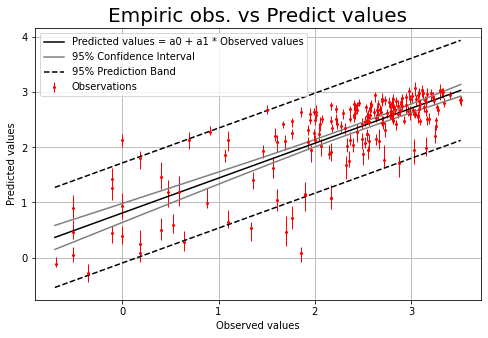

In [24]:
# Building linear a graph and calculation uncertainties

# retrieve parameter values
a0 = popt[0]
a1 = popt[1]

# compute r^2
r2 = 1.0-(sum((y_plot-f(x_plot, a0, a1)) ** 2)/((n - 1.0)*np.var(y_plot, ddof = 1)))
print(f'R^2: {r2:.3f}')

# calculate parameter confidence interval
a0, a1 = unc.correlated_values(popt, pcov)
index_a0 = str(a0).find('+/-')
index_a1 = str(a1).find('+/-')
am_a0 = str(a0)[0:index_a0]
ci_a0 = str(a0)[index_a0+3:]
am_a1 = str(a1)[0:index_a1]
ci_a1 = str(a1)[index_a1+3:]

print('Uncertainty')
print(f'a0: {am_a0}+/-{round(float(ci_a0)*(n_all_y/n_stat_y)**0.5, 3)}')
print(f'a1: {am_a1}+/-{round(float(ci_a1)*(n_all_y/n_stat_y)**0.5, 3)}')

# plot data
plt.figure(figsize =(8, 5))
plt.errorbar(stat_y[predictor]['mean'], stat_y[0]['50%'], yerr=[list(l_sd_y_pred), list(t_sd_y_pred)], c = 'red', fmt='o', lw=1, ms=2, label='Observations')
plt.yscale('linear')

# calculate regression confidence interval
px = np.linspace(-0.7, max(x_plot), 100)
py = a0 + a1 * px
nom = unp.nominal_values(py)
std = unp.std_devs(py)

# estimation uncertenlies intervals
def predband(x_plot, xd, yd, p, func, conf=0.95):
    # x_plot = requested points
    # xd = x data
    # yd = y data
    # p = parameters
    # func = function name
    alpha = 1.0 - conf    # significance
    N = xd.size          # data sample size
    var_n = len(p)  # number of parameters
    # Quantile of Student's t distribution for p=(1-alpha/2)
    q = stats.t.ppf(1.0 - alpha / 2.0, N - var_n)
    # Stdev of an individual measurement
    se = np.sqrt(1. / (N - var_n) * \
                 np.sum((yd - func(xd, *p)) ** 2))
    # Auxiliary definitions
    sx = (x_plot - xd.mean()) ** 2
    sxd = np.sum((xd - xd.mean()) ** 2)
    # Predicted values (best-fit model)
    yp = func(x_plot, *p)
    # Prediction band
    dy = q * se * np.sqrt(1.0+ (1.0/N) + (sx/sxd))
    # Upper & lower prediction bands.
    lpb, upb = yp - dy, yp + dy
    return lpb, upb

lpb, upb = predband(px, x_plot, y_plot, popt, f, conf=0.95)

# plot the regression
plt.plot(px, nom, c='black', label='Predicted values = a0 + a1 * Observed values')

# uncertainty lines (95% confidence)
plt.plot(px, nom - 1.96 * std * (n_all_y**0.5)/(n_stat_y**0.5), c='gray',\
         label='95% Confidence Interval')
plt.plot(px, nom + 1.96 * std * (n_all_y**0.5)/(n_stat_y**0.5), c='gray')

# prediction band (95% confidence)
plt.plot(px, lpb, 'k--',label='95% Prediction Band')
plt.plot(px, upb, 'k--')
plt.ylabel('Predicted values')
plt.xlabel('Observed values')
plt.grid(True)
plt.legend(loc='best')
plt.title('Empiric obs. vs Predict values', fontsize=20, color="black")
plt.show()

# Uncertainty parameters and confidence intervals

In [25]:
# Intermedia ratio for calculation CI
CIR = 2/((n_test + n_train)/n_test)**0.5

In [26]:
# Statistic for SHAP-values

number_iteration = len(aggr_Shap_values.groupby(['Feature']))
shap_list = aggr_Shap_values.groupby(['Feature'])


for i in range(number_iteration):
    itr_mean = round(np.mean(list(shap_list)[i][1].iloc[0:, 1]), 3)
    itr_Q50 = round(np.quantile(list(shap_list)[i][1].iloc[0:, 1], 0.50), 3)
    itr_Q16 = round(np.quantile(list(shap_list)[i][1].iloc[0:, 1], 0.16), 3)
    itr_Q84 = round(np.quantile(list(shap_list)[i][1].iloc[0:, 1], 0.84), 3)
    itr_l = (itr_Q50 - itr_Q16)*CIR
    l_CI = itr_Q50 - itr_l
    itr_t = (itr_Q84 - itr_Q50)*CIR
    t_CI = itr_Q50 + itr_t    
    print(f"SHAP-values for: {list(shap_list)[i][0]}: mean - {itr_mean}, median - {itr_Q50}, CI - [{round(l_CI, 3)}-{round(t_CI, 3)}]\n")        

SHAP-values for: r2019B01: mean - 0.211, median - 0.208, CI - [0.177-0.247]

SHAP-values for: r2019B04: mean - 0.079, median - 0.078, CI - [0.062-0.095]

SHAP-values for: r2019B06: mean - 0.23, median - 0.228, CI - [0.2-0.265]

SHAP-values for: r2019B10: mean - 0.077, median - 0.075, CI - [0.06-0.094]

SHAP-values for: r2019B11: mean - 0.153, median - 0.153, CI - [0.13-0.177]



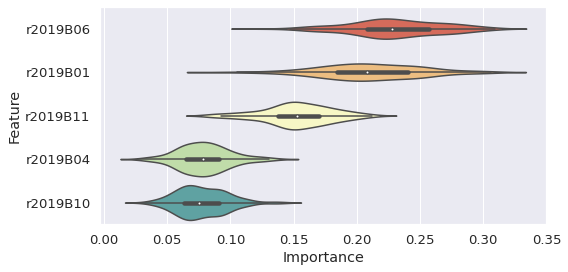

In [28]:
sns.set(font_scale=1.2)
sns.violinplot(x="Importance", y="Feature", data=aggr_Shap_values, inner="box", palette="Spectral", order=['r2019B06','r2019B01', 'r2019B11', 'r2019B04', 'r2019B10'])
sns.set(rc={'figure.figsize':(8,4)})
plt.show()

In [29]:
# Aggregate stat
# optimal number of iterations
aggr_optimal_n_mean = np.mean(aggr_optimal_n)
aggr_optimal_n_Q025 = np.quantile(aggr_optimal_n, 0.025)
aggr_optimal_n_Q16 = np.quantile(aggr_optimal_n, 0.16)
aggr_optimal_n_Q50 = np.quantile(aggr_optimal_n, 0.50)
aggr_optimal_n_Q84 = np.quantile(aggr_optimal_n, 0.84)
aggr_optimal_n_Q975 = np.quantile(aggr_optimal_n, 0.975)

# bias
aggr_bias_mean = np.mean(aggr_bias)
aggr_bias_Q025 = np.quantile(aggr_bias, 0.025)
aggr_bias_Q16 = np.quantile(aggr_bias, 0.16)
aggr_bias_Q50 = np.quantile(aggr_bias, 0.50)
aggr_bias_Q84 = np.quantile(aggr_bias, 0.84)
aggr_bias_Q975 = np.quantile(aggr_bias, 0.975)

aggr_rel_bias_mean = np.mean(aggr_rel_bias)
aggr_rel_bias_Q025 = np.quantile(aggr_rel_bias, 0.025)
aggr_rel_bias_Q16 = np.quantile(aggr_rel_bias, 0.16)
aggr_rel_bias_Q50 = np.quantile(aggr_rel_bias, 0.50)
aggr_rel_bias_Q84 = np.quantile(aggr_rel_bias, 0.84)
aggr_rel_bias_Q975 = np.quantile(aggr_rel_bias, 0.975)

# RMSE
aggr_rmse_mean = np.mean(aggr_rmse)
aggr_rmse_Q025 = np.quantile(aggr_rmse, 0.025)
aggr_rmse_Q16 = np.quantile(aggr_rmse, 0.16)
aggr_rmse_Q50 = np.quantile(aggr_rmse, 0.50)
aggr_rmse_Q84 = np.quantile(aggr_rmse, 0.84)
aggr_rmse_Q975 = np.quantile(aggr_rmse, 0.975)

aggr_rel_rmse_mean = np.mean(aggr_rel_rmse)
aggr_rel_rmse_Q025 = np.quantile(aggr_rel_rmse, 0.025)
aggr_rel_rmse_Q16 = np.quantile(aggr_rel_rmse, 0.16)
aggr_rel_rmse_Q50 = np.quantile(aggr_rel_rmse, 0.50)
aggr_rel_rmse_Q84 = np.quantile(aggr_rel_rmse, 0.84)
aggr_rel_rmse_Q975 = np.quantile(aggr_rel_rmse, 0.975)

# MSE
aggr_mse_mean = np.mean(aggr_mse)
aggr_mse_Q025 = np.quantile(aggr_mse, 0.025)
aggr_mse_Q16 = np.quantile(aggr_mse, 0.16)
aggr_mse_Q50 = np.quantile(aggr_mse, 0.50)
aggr_mse_Q84 = np.quantile(aggr_mse, 0.84)
aggr_mse_Q975 = np.quantile(aggr_mse, 0.975)

# R-square
aggr_R_square_mean = np.mean(aggr_R_square)
aggr_R_square_Q025 = np.quantile(aggr_R_square, 0.025)
aggr_R_square_Q16 = np.quantile(aggr_R_square, 0.16)
aggr_R_square_Q50 = np.quantile(aggr_R_square, 0.50)
aggr_R_square_Q84 = np.quantile(aggr_R_square, 0.84)
aggr_R_square_Q975 = np.quantile(aggr_R_square, 0.975)

# exp_bias
exp_aggr_bias_mean = np.mean(exp_aggr_bias)
exp_aggr_bias_Q025 = np.quantile(exp_aggr_bias, 0.025)
exp_aggr_bias_Q16 = np.quantile(exp_aggr_bias, 0.16)
exp_aggr_bias_Q50 = np.quantile(exp_aggr_bias, 0.50)
exp_aggr_bias_Q84 = np.quantile(exp_aggr_bias, 0.84)
exp_aggr_bias_Q975 = np.quantile(exp_aggr_bias, 0.975)

exp_aggr_rel_bias_mean = np.mean(exp_aggr_rel_bias)
exp_aggr_rel_bias_Q025 = np.quantile(exp_aggr_rel_bias, 0.025)
exp_aggr_rel_bias_Q16 = np.quantile(exp_aggr_rel_bias, 0.16)
exp_aggr_rel_bias_Q50 = np.quantile(exp_aggr_rel_bias, 0.50)
exp_aggr_rel_bias_Q84 = np.quantile(exp_aggr_rel_bias, 0.84)
exp_aggr_rel_bias_Q975 = np.quantile(exp_aggr_rel_bias, 0.975)

# exp_RMSE
exp_aggr_rmse_mean = np.mean(exp_aggr_rmse)
exp_aggr_rmse_Q025 = np.quantile(exp_aggr_rmse, 0.025)
exp_aggr_rmse_Q16 = np.quantile(exp_aggr_rmse, 0.16)
exp_aggr_rmse_Q50 = np.quantile(exp_aggr_rmse, 0.50)
exp_aggr_rmse_Q84 = np.quantile(exp_aggr_rmse, 0.84)
exp_aggr_rmse_Q975 = np.quantile(exp_aggr_rmse, 0.975)

exp_aggr_rel_rmse_mean = np.mean(exp_aggr_rel_rmse)
exp_aggr_rel_rmse_Q025 = np.quantile(exp_aggr_rel_rmse, 0.025)
exp_aggr_rel_rmse_Q16 = np.quantile(exp_aggr_rel_rmse, 0.16)
exp_aggr_rel_rmse_Q50 = np.quantile(exp_aggr_rel_rmse, 0.50)
exp_aggr_rel_rmse_Q84 = np.quantile(exp_aggr_rel_rmse, 0.84)
exp_aggr_rel_rmse_Q975 = np.quantile(exp_aggr_rel_rmse, 0.975)

# exp_MSE
exp_aggr_mse_mean = np.mean(exp_aggr_mse)
exp_aggr_mse_Q025 = np.quantile(exp_aggr_mse, 0.025)
exp_aggr_mse_Q16 = np.quantile(exp_aggr_mse, 0.16)
exp_aggr_mse_Q50 = np.quantile(exp_aggr_mse, 0.50)
exp_aggr_mse_Q84 = np.quantile(exp_aggr_mse, 0.84)
exp_aggr_mse_Q975 = np.quantile(exp_aggr_mse, 0.975)

# exp_R-square
exp_aggr_R_square_mean = np.mean(exp_aggr_R_square)
exp_aggr_R_square_Q025 = np.quantile(exp_aggr_R_square, 0.025)
exp_aggr_R_square_Q16 = np.quantile(exp_aggr_R_square, 0.16)
exp_aggr_R_square_Q50 = np.quantile(exp_aggr_R_square, 0.50)
exp_aggr_R_square_Q84 = np.quantile(exp_aggr_R_square, 0.84)
exp_aggr_R_square_Q975 = np.quantile(exp_aggr_R_square, 0.975)

In [30]:
# Output calculated stat
print("Logarithmically transformed predictive values:")
print(f"Aggregate optimal number of iterations statistic: \n mean: {round(aggr_optimal_n_mean, 3)}, median: {round(aggr_optimal_n_Q50, 3)},\n pred. interval (P(0.025)-P(0.975)): {round(aggr_optimal_n_Q025, 3)}-{round(aggr_optimal_n_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_optimal_n_Q50-((aggr_optimal_n_Q50-aggr_optimal_n_Q16)*CIR), 3)}-{round(aggr_optimal_n_Q50+((aggr_optimal_n_Q84-aggr_optimal_n_Q50)*CIR), 3)} \n***")
print(f"Aggregate bias statistic: \n mean: {round(aggr_bias_mean, 3)}, median: {round(aggr_bias_Q50, 3)},\n pred. interval (P(0.025)-P(0.975)): {round(aggr_bias_Q025, 3)}-{round(aggr_bias_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_bias_Q50-((aggr_bias_Q50-aggr_bias_Q16)*CIR), 3)}-{round(aggr_bias_Q50+((aggr_bias_Q84-aggr_bias_Q50)*CIR), 3)} \n***")
print(f"Aggregate RMSE statistic: \n mean: {round(aggr_rmse_mean, 3)}, median: {round(aggr_rmse_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_rmse_Q025, 3)}-{round(aggr_rmse_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_rmse_Q50-((aggr_rmse_Q50-aggr_rmse_Q16)*CIR), 3)}-{round(aggr_rmse_Q50+((aggr_rmse_Q84-aggr_rmse_Q50)*CIR), 3)} \n***")
print(f"Aggregate MSE statistic: \n mean: {round(aggr_mse_mean, 3)}, median: {round(aggr_mse_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_mse_Q025, 3)}-{round(aggr_mse_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_mse_Q50-((aggr_mse_Q50-aggr_mse_Q16)*CIR), 3)}-{round(aggr_mse_Q50+((aggr_mse_Q84-aggr_mse_Q50)*CIR), 3)} \n***")
print(f"Aggregate R^2 statistic: \n mean: {round(aggr_R_square_mean, 3)}, median: {round(aggr_R_square_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_R_square_Q025, 3)}-{round(aggr_R_square_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_R_square_Q50-((aggr_R_square_Q50-aggr_R_square_Q16)*CIR), 3)}-{round(aggr_R_square_Q50+((aggr_R_square_Q84-aggr_R_square_Q50)*CIR), 3)} \n***")
print(f"Aggregate bias(%) statistic: \n mean: {round(aggr_rel_bias_mean, 3)}, median: {round(aggr_rel_bias_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_rel_bias_Q025, 3)}-{round(aggr_rel_bias_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_rel_bias_Q50-((aggr_rel_bias_Q50-aggr_rel_bias_Q16)*CIR), 3)}-{round(aggr_rel_bias_Q50+((aggr_rel_bias_Q84-aggr_rel_bias_Q50)*CIR), 3)} \n***")
print(f"Aggregate RMSE(%) statistic: \n mean: {round(aggr_rel_rmse_mean, 3)}, median: {round(aggr_rel_rmse_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_rel_rmse_Q025, 3)}-{round(aggr_rel_rmse_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_rel_rmse_Q50-((aggr_rel_rmse_Q50-aggr_rel_rmse_Q16)*CIR), 3)}-{round(aggr_rel_rmse_Q50+((aggr_rel_rmse_Q84-aggr_rel_rmse_Q50)*CIR), 3)} \n***")

print("\nTransformed predictive values into the primary state:")
print(f"Aggregate bias statistic: \n mean: {round(exp_aggr_bias_mean, 3)}, median: {round(exp_aggr_bias_Q50, 3)},\n pred. interval (P(0.025)-P(0.975)): {round(exp_aggr_bias_Q025, 3)}-{round(exp_aggr_bias_Q975, 3)}, \n conf. interval (p-value=0.95): {round(exp_aggr_bias_Q50-((exp_aggr_bias_Q50-exp_aggr_bias_Q16)*CIR), 3)}-{round(exp_aggr_bias_Q50+((exp_aggr_bias_Q84-exp_aggr_bias_Q50)*CIR), 3)} \n***")
print(f"Aggregate RMSE statistic: \n mean: {round(exp_aggr_rmse_mean, 3)}, median: {round(exp_aggr_rmse_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(exp_aggr_rmse_Q025, 3)}-{round(exp_aggr_rmse_Q975, 3)}, \n conf. interval (p-value=0.95): {round(exp_aggr_rmse_Q50-((exp_aggr_rmse_Q50-exp_aggr_rmse_Q16)*CIR), 3)}-{round(exp_aggr_rmse_Q50+((exp_aggr_rmse_Q84-exp_aggr_rmse_Q50)*CIR), 3)} \n***")
print(f"Aggregate MSE statistic: \n mean: {round(exp_aggr_mse_mean, 3)}, median: {round(exp_aggr_mse_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(exp_aggr_mse_Q025, 3)}-{round(exp_aggr_mse_Q975, 3)}, \n conf. interval (p-value=0.95): {round(exp_aggr_mse_Q50-((exp_aggr_mse_Q50-exp_aggr_mse_Q16)*CIR), 3)}-{round(exp_aggr_mse_Q50+((exp_aggr_mse_Q84-exp_aggr_mse_Q50)*CIR), 3)} \n***")
print(f"Aggregate R^2 statistic: \n mean: {round(exp_aggr_R_square_mean, 3)}, median: {round(exp_aggr_R_square_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(exp_aggr_R_square_Q025, 3)}-{round(exp_aggr_R_square_Q975, 3)}, \n conf. interval (p-value=0.95): {round(exp_aggr_R_square_Q50-((exp_aggr_R_square_Q50-exp_aggr_R_square_Q16)*CIR), 3)}-{round(exp_aggr_R_square_Q50+((exp_aggr_R_square_Q84-exp_aggr_R_square_Q50)*CIR), 3)} \n***")
print(f"Aggregate bias(%) statistic: \n mean: {round(exp_aggr_rel_bias_mean, 3)}, median: {round(exp_aggr_rel_bias_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(exp_aggr_rel_bias_Q025, 3)}-{round(exp_aggr_rel_bias_Q975, 3)}, \n conf. interval (p-value=0.95): {round(exp_aggr_rel_bias_Q50-((exp_aggr_rel_bias_Q50-exp_aggr_rel_bias_Q16)*CIR), 3)}-{round(exp_aggr_rel_bias_Q50+((exp_aggr_rel_bias_Q84-exp_aggr_rel_bias_Q50)*CIR), 3)} \n***")
print(f"Aggregate RMSE(%) statistic: \n mean: {round(exp_aggr_rel_rmse_mean, 3)}, median: {round(exp_aggr_rel_rmse_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(exp_aggr_rel_rmse_Q025, 3)}-{round(exp_aggr_rel_rmse_Q975, 3)}, \n conf. interval (p-value=0.95): {round(exp_aggr_rel_rmse_Q50-((exp_aggr_rel_rmse_Q50-exp_aggr_rel_rmse_Q16)*CIR), 3)}-{round(exp_aggr_rel_rmse_Q50+((exp_aggr_rel_rmse_Q84-exp_aggr_rel_rmse_Q50)*CIR), 3)} \n***")

Logarithmically transformed predictive values:
Aggregate optimal number of iterations statistic: 
 mean: 69.925, median: 67.5,
 pred. interval (P(0.025)-P(0.975)): 33.975-118.025, 
 conf. interval (p-value=0.95): 49.164-92.097 
***
Aggregate bias statistic: 
 mean: -0.037, median: -0.027,
 pred. interval (P(0.025)-P(0.975)): -0.21-0.126, 
 conf. interval (p-value=0.95): -0.124-0.044 
***
Aggregate RMSE statistic: 
 mean: 0.566, median: 0.557, pred. interval (P(0.025)-P(0.975)): 0.426-0.729, 
 conf. interval (p-value=0.95): 0.483-0.646 
***
Aggregate MSE statistic: 
 mean: 0.327, median: 0.311, pred. interval (P(0.025)-P(0.975)): 0.182-0.531, 
 conf. interval (p-value=0.95): 0.234-0.419 
***
Aggregate R^2 statistic: 
 mean: 0.572, median: 0.606, pred. interval (P(0.025)-P(0.975)): 0.225-0.786, 
 conf. interval (p-value=0.95): 0.447-0.695 
***
Aggregate bias(%) statistic: 
 mean: -1.52, median: -1.214, pred. interval (P(0.025)-P(0.975)): -9.212-5.892, 
 conf. interval (p-value=0.95): -5.

# Analysis of residuals distributions dependents on empirical values of predicted parameter

Text(0.5, 1.0, 'In typical state')

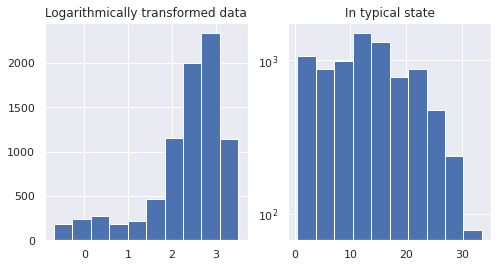

In [31]:
# Preprocessing
results_y['T_exp_empiric'] = np.exp(results_y[predictor])
results_y['T_exp_pred'] = np.exp(results_y[0])

results_y['ln_residuals'] = results_y[predictor] - results_y[0]
results_y['T_exp_residuals'] = results_y['T_exp_empiric'] - results_y['T_exp_pred']
results_y['ln_residuals_%'] =  results_y['ln_residuals'] / results_y[predictor] * 100
results_y['T_exp_residuals_%'] = results_y['T_exp_residuals'] / results_y['T_exp_empiric'] * 100

# plt.hist(results_y[predictor])
# plt.hist(results_y[predictor])
fig, axs = plt.subplots(1, 2)
axs[0].hist(results_y[predictor])
axs[0].set_title('Logarithmically transformed data')
axs[1].hist(results_y['T_exp_empiric'], log=True)
axs[1].set_title('In typical state')
# plt.show() 

In [32]:
# INPORTANT  - added your intervals
ln_intervals = pd.cut(results_y[predictor], [-1, 0, 1, 2, 3, 4])
T_exp_intervals = pd.cut(results_y['T_exp_empiric'], [0, 5, 10, 15, 20, 25, 30])

ln_grouped = results_y.groupby(ln_intervals)
T_exp_grouped = results_y.groupby(T_exp_intervals) 

max_obs_in_group = len(results_y)    
    
pre_ln = pd.DataFrame()
pre_T_exp = pd.DataFrame()
pre_rel_ln = pd.DataFrame()
pre_rel_T_exp = pd.DataFrame()

pre_ln = pre_ln.assign(row_number=range(max_obs_in_group))
pre_T_exp = pre_T_exp.assign(row_number=range(max_obs_in_group))
pre_rel_ln = pre_rel_ln.assign(row_number=range(max_obs_in_group))
pre_rel_T_exp = pre_rel_T_exp.assign(row_number=range(max_obs_in_group))

for i in range(len(list(ln_grouped))):
    pre_ln[list(ln_grouped)[i][0]] = pd.Series(list(ln_grouped)[i][1]['ln_residuals'])
    pre_rel_ln[list(ln_grouped)[i][0]] = pd.Series(list(ln_grouped)[i][1]['ln_residuals_%'])

for i in range(len(list(T_exp_grouped))):
    pre_T_exp[list(T_exp_grouped)[i][0]] = pd.Series(list(T_exp_grouped)[i][1]['T_exp_residuals'])
    pre_rel_T_exp[list(T_exp_grouped)[i][0]] = pd.Series(list(T_exp_grouped)[i][1]['T_exp_residuals_%'])

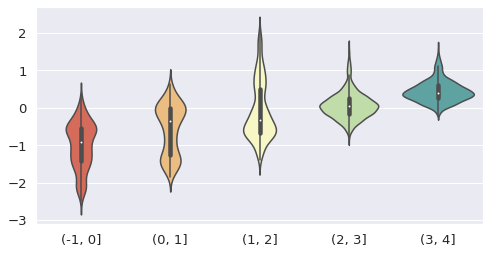

In [33]:
# Plots of residuals versus predicted values
sns.set(font_scale=1.2)
sns.violinplot(data=pre_ln[list(pre_ln.columns)[1:]], inner="box", palette="Spectral")
sns.set(rc={'figure.figsize':(8,4)})
plt.show()

In [ ]:
# Plots of relative residuals (in %) versus predicted values
sns.set(font_scale=1.2)
sns.violinplot(data=pre_rel_ln[(pre_rel_ln.columns)[1:]], inner="box", palette="Spectral")
sns.set(rc={'figure.figsize':(8,4)})
plt.show()

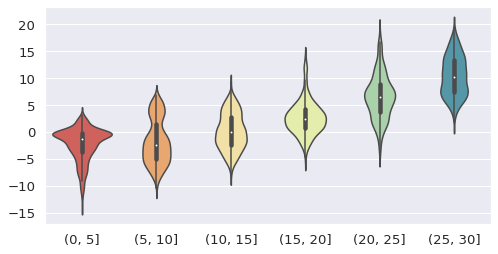

In [36]:
# Plots of residuals versus predicted values
sns.set(font_scale=1.2)
sns.violinplot(data=pre_T_exp[list(pre_T_exp.columns)[1:]], inner="box", palette="Spectral")
sns.set(rc={'figure.figsize':(8,4)})
plt.show()

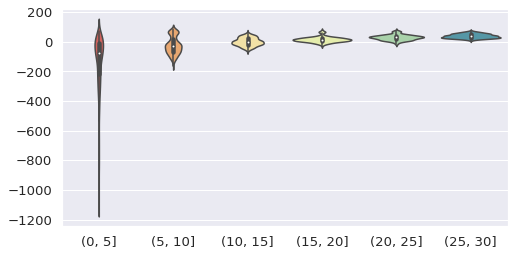

In [35]:
# Plots of relative residuals (in %) versus predicted values
sns.set(font_scale=1.2)
sns.violinplot(data=pre_rel_T_exp[(pre_rel_T_exp.columns)[1:]], inner="box", palette="Spectral")
sns.set(rc={'figure.figsize':(8,4)})
plt.show()

# ***Creating final XGBoost model using all obs. for its training***

In [37]:
# Generate test and training samples
f_X_train = X
f_y_train = y

In [38]:
# Implementation of the scikit-learn API for XGBoost regression
f_xgb_model = xgb.XGBRegressor(objective='reg:squarederror', colsample_bytree=p1, gamma=p2, learning_rate=p3, 
                          max_depth=p4, n_estimators=p5, subsample=p6, eval_metric=["rmse"])

In [39]:
# Fitting the model 
f_xgb_model.fit(f_X_train, f_y_train, early_stopping_rounds=20, eval_set=[(f_X_train, f_y_train)])
# learning dynamics
f_y_pred = f_xgb_model.predict(f_X_train, ntree_limit=f_xgb_model.best_ntree_limit)

[0]	validation_0-rmse:1.89328
[1]	validation_0-rmse:1.77727
[2]	validation_0-rmse:1.66775
[3]	validation_0-rmse:1.56738
[4]	validation_0-rmse:1.47336
[5]	validation_0-rmse:1.38929


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:1.31001
[7]	validation_0-rmse:1.24009
[8]	validation_0-rmse:1.17013
[9]	validation_0-rmse:1.10949
[10]	validation_0-rmse:1.05031
[11]	validation_0-rmse:0.99485
[12]	validation_0-rmse:0.94677
[13]	validation_0-rmse:0.90211
[14]	validation_0-rmse:0.86180
[15]	validation_0-rmse:0.82347
[16]	validation_0-rmse:0.79235
[17]	validation_0-rmse:0.75962
[18]	validation_0-rmse:0.73498
[19]	validation_0-rmse:0.70831
[20]	validation_0-rmse:0.68638
[21]	validation_0-rmse:0.66387
[22]	validation_0-rmse:0.64237
[23]	validation_0-rmse:0.62103
[24]	validation_0-rmse:0.60721
[25]	validation_0-rmse:0.59580
[26]	validation_0-rmse:0.58781
[27]	validation_0-rmse:0.57245
[28]	validation_0-rmse:0.55879
[29]	validation_0-rmse:0.54526
[30]	validation_0-rmse:0.53753
[31]	validation_0-rmse:0.52956
[32]	validation_0-rmse:0.52130
[33]	validation_0-rmse:0.51573
[34]	validation_0-rmse:0.50865
[35]	validation_0-rmse:0.50299
[36]	validation_0-rmse:0.49887
[37]	validation_0-rmse:0.49320
[38]	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


In [40]:
# Iteration with the best result
f_optimal_n = f_xgb_model.best_ntree_limit-1
print("The best iteration: " + str(f_optimal_n))    

The best iteration: 121


In [41]:
# Preparing data for building a learning graph
f_results = f_xgb_model.evals_result()

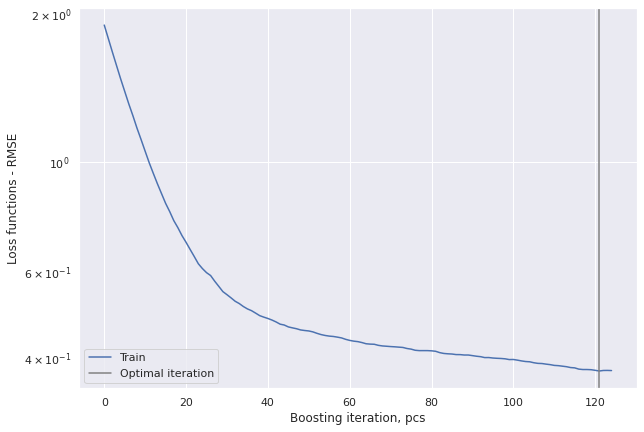

In [42]:
# Learning curves for the XGBoost model 
plt.figure(figsize=(10,7))
plt.yscale("log")
plt.plot(f_results['validation_0']['rmse'], label='Train')
plt.axvline(f_optimal_n, color="gray", label="Optimal iteration")
plt.xlabel("Boosting iteration, pcs")
plt.ylabel("Loss functions - RMSE")
plt.legend()

# Estimation of a final XGBoost model

In [43]:
# Convert data to 'array' type
f_conv_y_pred = pd.DataFrame(f_y_pred) # Double transformation
f_y_pred2 = f_conv_y_pred.values
f_y_train2 = f_y_train.values

# Intermediate results
f_n_sample = len(f_y_pred2)
f_main_sample = f_y_train.sum() / f_n_sample

# Calculation of bias
f_diff = f_y_pred2 - f_y_train2
f_bias = f_diff.sum()/f_n_sample
print('Bias: %.1f' % (f_bias))
print("Relative bias(%):", " %.2f" % (f_bias/f_main_sample*100))

# Calculation of RMSE
f_rmse = np.sqrt(mean_squared_error(f_y_train, f_y_pred))
print("RMSE: %.1f" % (f_rmse))
print("Relative RMSE(%):", " %.3f" % (f_rmse/f_main_sample*100))

# Calculation of MSE
f_mse = mean_squared_error(f_y_train, f_y_pred)
print("MSE: %.1f" % (f_mse))

# Calculation of Square R
f_R_square = r2_score(f_y_train, f_y_pred)
print("R square: %.1f%%" % (f_R_square * 100.0))

Bias: 0.0
Relative bias(%):  0.12
RMSE: 0.4
Relative RMSE(%):  16.391
MSE: 0.1
R square: 83.3%


In [44]:
# Convert input data
f_x_train_conv = np.array(f_y_train)
f_x_train_convert = np.array([None]*f_n_sample)
for i in range(f_n_sample):
    f_x_train_convert[i] = float(f_x_train_conv[i])

x_plot = f_x_train_convert
y_plot = f_y_pred
n = len(y_plot)

# Function for fitting a linear curve and estimating its parameters
def f(x_plot, a0, a1):
    return a0 + a1 * x_plot

popt, pcov = curve_fit(f, x_plot, y_plot)

R^2: 0.836
Uncertainty
a0: 0.49+/-0.06
a1: 0.786+/-0.024


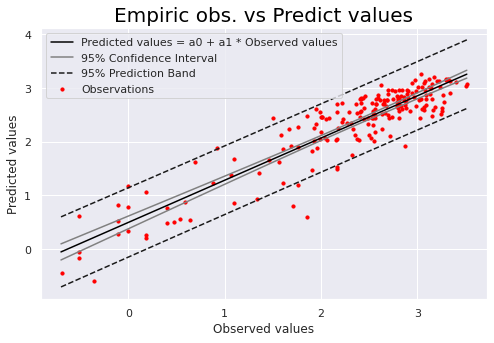

In [46]:
# Building linear a graph and calculation uncertainties

# retrieve parameter values
a0 = popt[0]
a1 = popt[1]

# compute r^2
r2 = 1.0-(sum((y_plot-f(x_plot, a0, a1)) ** 2)/((n - 1.0)*np.var(y_plot, ddof = 1)))
print(f'R^2: {r2:.3f}')

# calculate parameter confidence interval
a0, a1 = unc.correlated_values(popt, pcov)
print('Uncertainty')
print('a0: ' + str(a0))
print('a1: ' + str(a1))

# plot data
plt.figure(figsize =(8, 5))
plt.scatter(x_plot, y_plot, s = 10, c = 'red', label='Observations', marker = 'o')
plt.yscale('linear')

# estimation uncertenlies intervals
def predband(x_plot, xd, yd, p, func, conf=0.95):
    # x_plot = requested points
    # xd = x data
    # yd = y data
    # p = parameters
    # func = function name
    alpha = 1.0 - conf    # significance
    N = xd.size          # data sample size
    var_n = len(p)  # number of parameters
    # Quantile of Student's t distribution for p=(1-alpha/2)
    q = stats.t.ppf(1.0 - alpha / 2.0, N - var_n)
    # Stdev of an individual measurement
    se = np.sqrt(1. / (N - var_n) * \
                 np.sum((yd - func(xd, *p)) ** 2))
    # Auxiliary definitions
    sx = (x_plot - xd.mean()) ** 2
    sxd = np.sum((xd - xd.mean()) ** 2)
    # Predicted values (best-fit model)
    yp = func(x_plot, *p)
    # Prediction band
    dy = q * se * np.sqrt(1.0+ (1.0/N) + (sx/sxd))
    # Upper & lower prediction bands.
    lpb, upb = yp - dy, yp + dy
    return lpb, upb

# calculate regression confidence interval
px = np.linspace(-0.7, max(x_plot), 100)
py = a0 + a1 * px
nom = unp.nominal_values(py)
std = unp.std_devs(py)

lpb, upb = predband(px, x_plot, y_plot, popt, f, conf=0.95)

# plot the regression
plt.plot(px, nom, c='black', label='Predicted values = a0 + a1 * Observed values')

# uncertainty lines (95% confidence)
plt.plot(px, nom - 1.96 * std, c='gray',\
         label='95% Confidence Interval')
plt.plot(px, nom + 1.96 * std, c='gray')

# prediction band (95% confidence)
plt.plot(px, lpb, 'k--',label='95% Prediction Band')
plt.plot(px, upb, 'k--')
plt.ylabel('Predicted values')
plt.xlabel('Observed values')
plt.grid(True)
plt.legend(loc='best')
plt.title('Empiric obs. vs Predict values', fontsize=20, color="black")
plt.show()

# ***Analisys output final model***

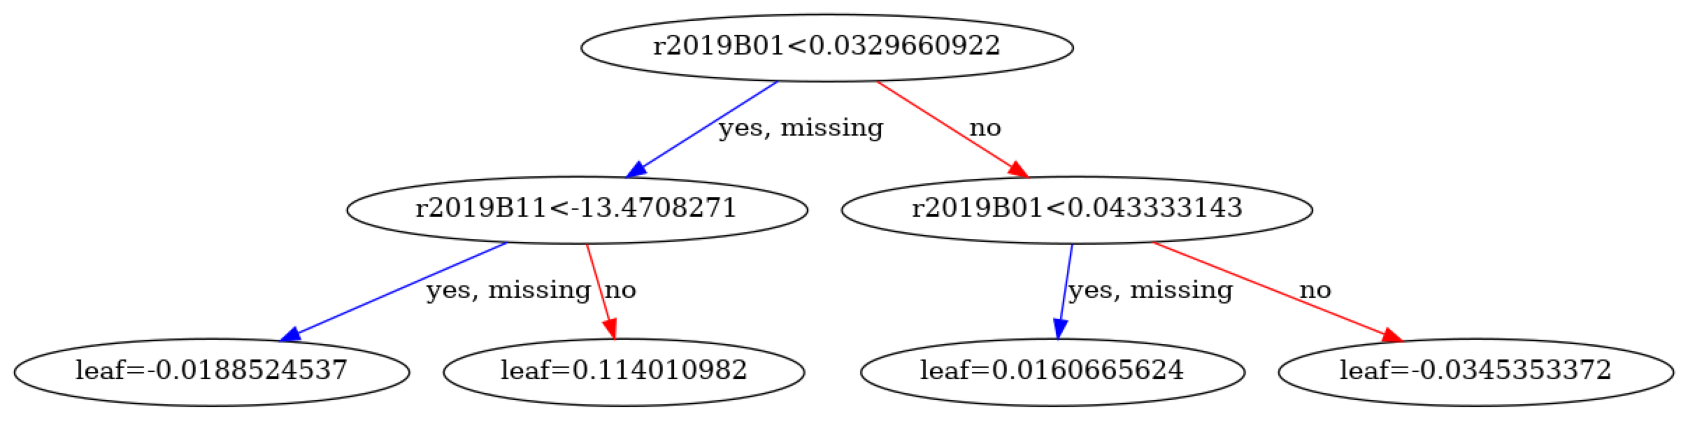

In [48]:
# Visualize the Decision tree (individual obs.)
xgb.plot_tree(f_xgb_model, num_trees=3) # "num_trees" is number of obs.
plt.rcParams['figure.figsize'] = [30, 45]
plt.show()

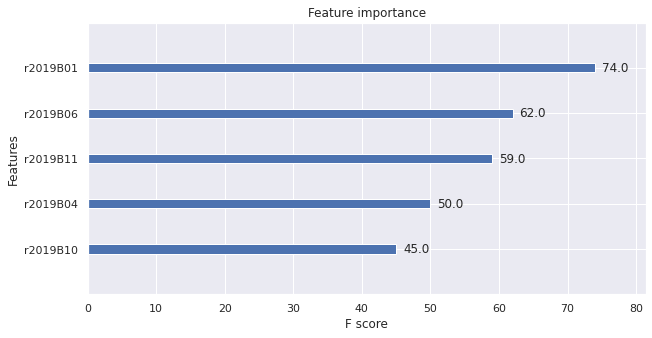

In [50]:
# Importance is calculated as: ”weight” is the number of times a feature appears in a trees
xgb.plot_importance(f_xgb_model, importance_type='weight')
plt.rcParams['figure.figsize'] = [10, 5]
plt.show()

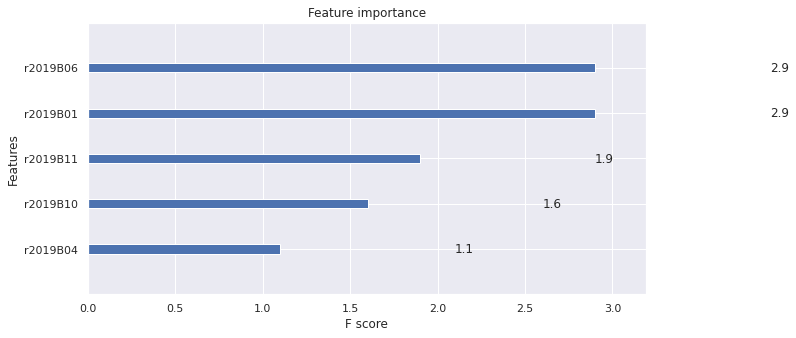

In [51]:
# Importance is calculated as: ”gain” is the average gain of splits which use the feature
# Get the booster from the xgbmodel
booster = f_xgb_model.get_booster()

# Get the importance dictionary (by gain) from the booster
importance = booster.get_score(importance_type="gain")

# make your changes
for key in importance.keys():
    importance[key] = round(importance[key], 1)

# provide the importance dictionary to the plotting function
ax = xgb.plot_importance(importance, importance_type='gain', show_values=True)

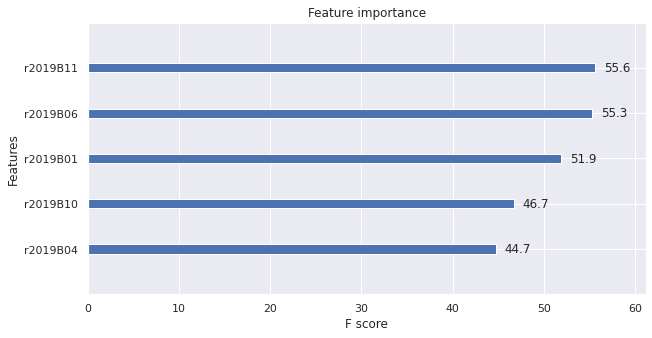

In [52]:
# Importance is calculated as: "cover” is the average coverage of splits which use the feature where coverage is defined as the number of samples affected by the split
# Get the booster from the xgbmodel
booster = f_xgb_model.get_booster()

# Get the importance dictionary (by gain) from the booster
importance = booster.get_score(importance_type="cover")

# make your changes
for key in importance.keys():
    importance[key] = round(importance[key],1)

# provide the importance dictionary to the plotting function
ax = xgb.plot_importance(importance, importance_type='cover', show_values=True)

# Est. of SHAP values for final models

In [53]:
# Сreate an уxplainer object
explainer = shap.TreeExplainer(f_xgb_model)
shap_values = explainer.shap_values(f_X_train)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


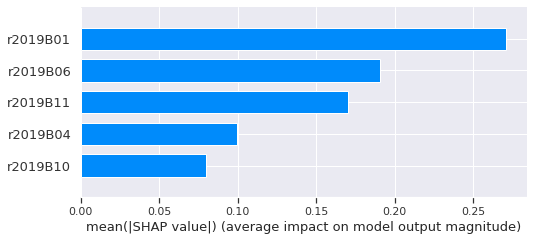

In [54]:
# Mean absolute value of the SHAP values for each feature 
shap.summary_plot(shap_values, f_X_train, plot_type="bar")

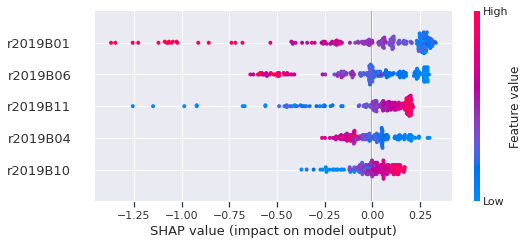

In [55]:
# Graph that summarises the effects of all the features
shap.summary_plot(shap_values, f_X_train)

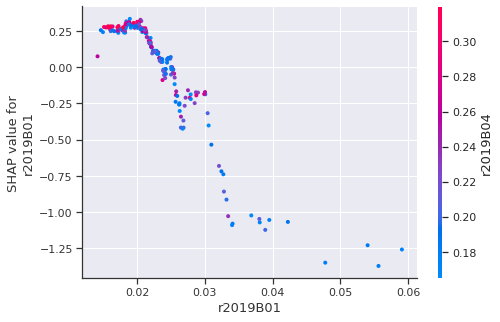

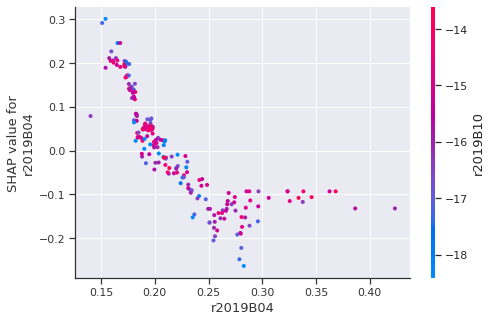

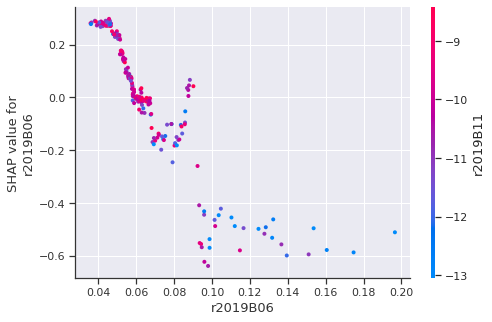

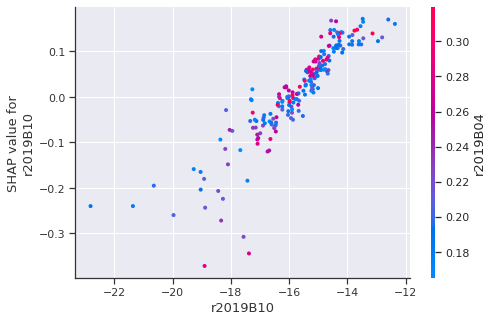

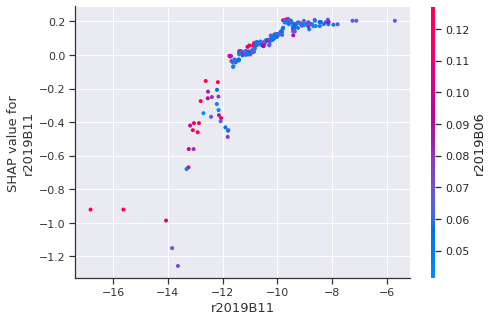

In [56]:
# Create a dependence scatter plot to show the effect of a single feature across the whole dataset
for name in X_train.columns:
    shap.dependence_plot(name, shap_values, f_X_train, color=shap_values)

# *Save XGBoost model*

In [57]:
# Save to JSON
f_xgb_model.save_model("../05_output_data/XGBoost_models/03_LN_M_AG_SENTINEL_2019_XGB_model.json")
# Save to text format
f_xgb_model.save_model("../05_output_data/XGBoost_models/03_LN_M_AG_SENTINEL_2019_XGB_model.txt")